# ANÁLISIS EXPLORATORIO DE DATOS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 500)
pd.set_option('display.float_format', '{:.2f}'.format)

## 1. Análisis Univariado

- Distribución del target y predictores (histogramas, boxplots, estadísticas descriptivas).
- Detección de outliers y evaluación de su impacto.
- Visualización de variables categóricas (gráficos de conteo).

## 2. Análisis Bivariado
- Relación predictores vs target (scatter, boxplots, correlaciones Pearson/Spearman).
- Correlación entre predictores (multicolinealidad, redundancias).
- Identificación de relaciones no lineales y tendencias temporales (si aplica).

## 3. Análisis Multivariado
- Visualizaciones multivariadas (2 numéricas + 1 categórica).
- Exploración de interacciones y efectos de moderación.
- Clusters o subgrupos naturales en los datos.
- Identificación preliminar de predictores relevantes (combinaciones y patrones).

## 0. CARGA DE DATOS

In [2]:
icfes = pd.read_parquet("icfes_limpio.parquet", engine="pyarrow")
icfes.sample(5)

,nacionalidad,genero,region,etnia_estudiante,edad,grupo_edad,presento_fuera_edad,num_personas_casa,num_cuartos_casa,estrato_casa,tiempo_internet,internet,tv,computador,lavadora,microndas,carro,moto,consola,situacion_economica_casa,num_libros,tiempo_lectura,freq_leche_derivados,freq_carne_pescado_similares,freq_cereales_frutos_legumbres,nivel_edu_padre,actividad_padre,nivel_edu_madre,actividad_madre,horas_trabajo_semanal,tipo_remuneracion,colegio_genero,colegio_naturaleza,colegio_calendario,colegio_caracter,colegio_area,colegio_jornada,colegio_mpio,colegio_dpto,puntaje_lectura,percentil_lectura,puntaje_matematicas,percentil_matematicas,nivel_matematicas,puntaje_naturales,percentil_naturales,nivel_naturales,puntaje_sociales,percentil_sociales,nivel_sociales,puntaje_ingles,percentil_ingles,nivel_ingles,puntaje_global,percentil_global,inse_estudiante,nse_estudiante,nse_colegio
137392,Colombia,Masculino,Andina,No,17,15-19,0,Más de 1 hogar,3.00,2.00,Poco,1,1,1,1,1,1,0,1,Peor,26-100,0-30 min,Aceptable,Óptimo,Aceptable,Bachiller,Sin Actividad Remunerada,Bachiller,Trabajadores Operativos,No Trabaja,No Aplica,Mixto,No Oficial,A,S,Urbano,Sabatina,Cajicá,Cundinamarca,52,49,55,63,3,49,56,2,38,30,1,51.00,61,A1,243,50,60.25,3.00,2.00
256553,Colombia,Femenino,Andina,No,17,15-19,0,Hogar tradicional,2.00,3.00,Promedio,1,1,1,1,1,1,1,1,Igual,26-100,30-60 min,Aceptable,Óptimo,Aceptable,Profesional,Profesionales,Profesional,Profesionales,No Trabaja,No Aplica,Mixto,No Oficial,A,S,Urbano,Completa,Mosquera,Cundinamarca,69,95,77,99,4,72,99,4,74,99,4,79.00,99,B+,367,100,72.42,4.00,4.00
406764,Colombia,Masculino,Andina,No,17,15-19,0,Más de 1 hogar,5.00,2.00,Promedio,1,1,1,1,1,0,1,0,Mejor,26-100,No lee,Aceptable,Aceptable,Aceptable,Bachiller,Sin Actividad Remunerada,Bachiller,Trabajador Independiente,Tiempo Parcial Reducido,Remuneración Monetaria,Mixto,Oficial,A,S,Urbano,Mañana,Segovia,Antioquia,52,49,52,54,3,38,19,1,38,28,1,49.00,54,A1,227,38,53.90,3.00,2.00
265995,Colombia,Femenino,Pacífica,No,17,15-19,0,Hogar tradicional,3.00,2.00,Mucho,1,1,1,1,0,0,0,0,Igual,26-100,1-2h,Aceptable,Aceptable,Aceptable,Bachiller,Microempresario,Bachiller Inc,Trabajador Independiente,No Trabaja,No Aplica,Femenino,Oficial,A,S,Urbano,Mañana,Pasto,Nariño,63,85,55,64,3,57,78,3,67,95,3,55.00,70,A1,300,84,54.02,3.00,3.00
216686,Colombia,Masculino,Caribe,Afro,17,15-19,0,Hogar grande,3.00,1.00,Poco,0,1,0,1,0,0,1,0,Igual,0-10,30-60 min,Insuficiente,Insuficiente,Insuficiente,Profesional,Sin Actividad Remunerada,Bachiller Inc,Sin Información,Trabajo Ocasional,Remuneración Monetaria,Mixto,No Oficial,A,S,Rural,Completa,Cartagena De Indias,Bolivar,54,58,62,82,3,60,85,3,62,88,3,52.00,63,A1,295,81,42.31,2.00,2.00


## 1. ANÁLISIS UNIVARIADO

### 1.1 ANÁLISIS DE DISTRIBUCIÓN VARIABLE OBJETIVO

In [3]:
icfes['puntaje_global'].describe()

count   506057.00
mean       247.57
std         51.11
min         75.00
25%        209.00
50%        245.00
75%        283.00
max        477.00
Name: puntaje_global, dtype: float64

In [4]:
from scipy.stats import skew, kurtosis

# Variable
x = icfes['puntaje_global'].dropna()  # por si hay nulos

# Sesgo
print("Sesgo:", skew(x).round(2), " (positivo = cola a la derecha)")

# Curtosis
print("Curtosis:", kurtosis(x).round(2))

Sesgo: 0.26  (positivo = cola a la derecha)
Curtosis: -0.47


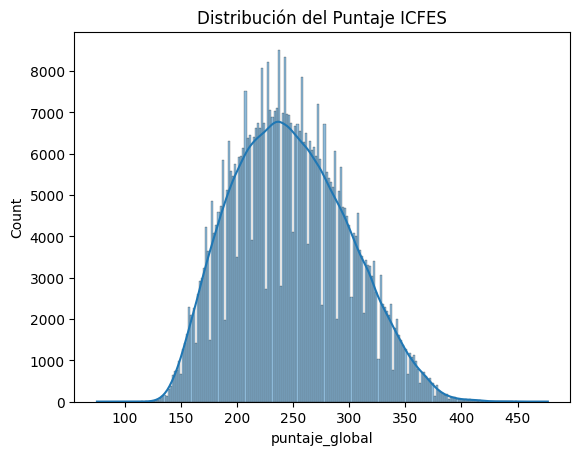

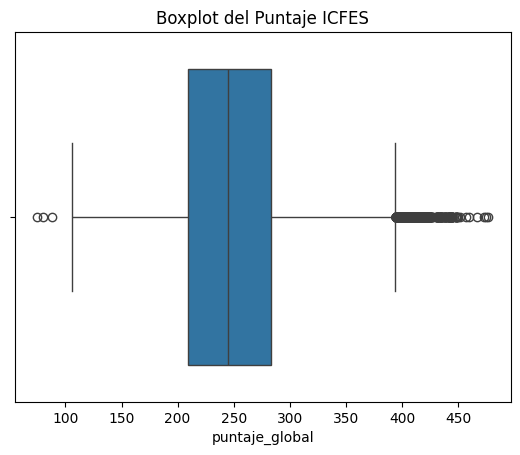

In [5]:
# Histograma con curva KDE
sns.histplot(x, kde=True)
plt.title("Distribución del Puntaje ICFES")
plt.show()

# Boxplot para ver asimetría
sns.boxplot(x=x)
plt.title("Boxplot del Puntaje ICFES")
plt.show()

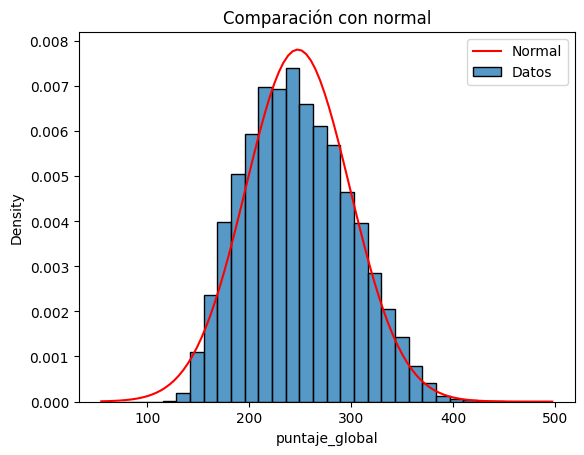

In [6]:
from scipy.stats import norm

# Ajuste normal
mu, sigma = x.mean(), x.std()
sns.histplot(x, kde=False, stat="density", bins=30, label="Datos")
xmin, xmax = plt.xlim()
xx = np.linspace(xmin, xmax, 100)
plt.plot(xx, norm.pdf(xx, mu, sigma), 'r', label="Normal")
plt.legend()
plt.title("Comparación con normal")
plt.show()

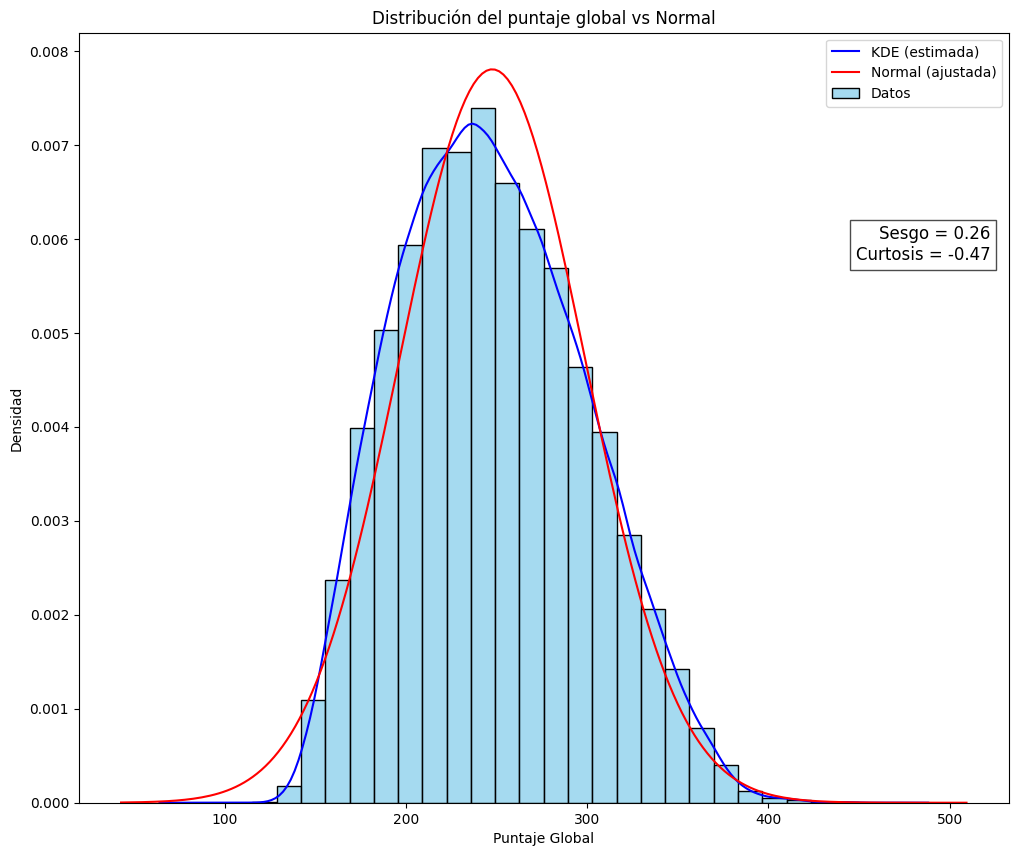

In [7]:
from scipy.stats import norm, skew, kurtosis

# Tomar variable y eliminar nulos
x = icfes['puntaje_global'].dropna()

# Calcular estadísticos
mu, sigma = x.mean(), x.std()
sesgo, curt = skew(x), kurtosis(x)

# --- Histograma con curva KDE y normal ---
plt.figure(figsize=(12,10))

# Histograma real
sns.histplot(x, bins=30, kde=False, stat="density", color="skyblue", edgecolor="black", label="Datos")

# Curva KDE (estimada a partir de los datos)
sns.kdeplot(x, color="blue", label="KDE (estimada)")

# Curva normal teórica
xmin, xmax = plt.xlim()
xx = np.linspace(xmin, xmax, 200)
plt.plot(xx, norm.pdf(xx, mu, sigma), 'r', label="Normal (ajustada)")

# Título y leyenda
plt.title("Distribución del puntaje global vs Normal")
plt.xlabel("Puntaje Global")
plt.ylabel("Densidad")
plt.legend()

# Anotación con sesgo y curtosis
plt.annotate(f"Sesgo = {sesgo:.2f}\nCurtosis = {curt:.2f}",
             xy=(0.98, 0.75), xycoords='axes fraction',  # (x, y) en proporción
             ha='right', va='top',
             fontsize=12, bbox=dict(facecolor="white", alpha=0.7))

plt.show()

#### CONCLUSIONES

La variable a predecir, el puntaje del ICFES, presenta una distribución cercana a la normal.

- Sesgo = 0.26 (ligeramente positivo) → La distribución es casi simétrica, pero con una cola un poco más larga hacia la derecha. Es decir, hay algunos estudiantes con puntajes algo más altos que el promedio, que estiran la distribución hacia arriba.

- Curtosis = –0.47 → Este valor indica que la distribución tiene una forma platicúrtica, es decir, algo más achatada o plana que la normal, con colas ligeramente más ligeras, lo que sugiere que no hay concentración de valores extremos.

### 1.2 ANÁLISIS DE DISTRIBUCIÓN DE VARIABLES PREDICTORAS

In [8]:
icfes.head(6)

,nacionalidad,genero,region,etnia_estudiante,edad,grupo_edad,presento_fuera_edad,num_personas_casa,num_cuartos_casa,estrato_casa,tiempo_internet,internet,tv,computador,lavadora,microndas,carro,moto,consola,situacion_economica_casa,num_libros,tiempo_lectura,freq_leche_derivados,freq_carne_pescado_similares,freq_cereales_frutos_legumbres,nivel_edu_padre,actividad_padre,nivel_edu_madre,actividad_madre,horas_trabajo_semanal,tipo_remuneracion,colegio_genero,colegio_naturaleza,colegio_calendario,colegio_caracter,colegio_area,colegio_jornada,colegio_mpio,colegio_dpto,puntaje_lectura,percentil_lectura,puntaje_matematicas,percentil_matematicas,nivel_matematicas,puntaje_naturales,percentil_naturales,nivel_naturales,puntaje_sociales,percentil_sociales,nivel_sociales,puntaje_ingles,percentil_ingles,nivel_ingles,puntaje_global,percentil_global,inse_estudiante,nse_estudiante,nse_colegio
0,Colombia,Masculino,Caribe,No,17,15-19,0,Hogar grande,5.00,3.00,Moderado,1,1,0,1,1,0,0,0,Peor,>100,30-60 min,Insuficiente,Aceptable,Muy Insuficiente,Profesional,Sin Actividad Remunerada,Bachiller,No Aplica,Trabajo Ocasional,Remuneración Monetaria,Mixto,Oficial,A,S,Urbano,Mañana,Santa Ana,Magdalena,47,33,48,42,2,37,15,1,30,8,1,54.00,67,A1,208,25,50.94,2.00,2.00
1,Colombia,Masculino,Andina,No,16,15-19,0,Más de 1 hogar,3.00,3.00,Moderado,1,1,1,1,1,1,0,0,Mejor,>100,30-60 min,Óptimo,Aceptable,Insuficiente,Tecnico/Tecnologo,Microempresario,Tecnico/Tecnologo,Trabajador Independiente,Trabajo Ocasional,Remuneración Monetaria,Mixto,No Oficial,A,S,Urbano,Completa,Bogotá D.C.,Bogotá,60,76,65,88,3,54,71,2,59,83,3,63.00,88,A2,299,83,59.76,3.00,4.00
2,Colombia,Masculino,Caribe,No,18,15-19,0,Hogar grande,2.00,1.00,Mucho,0,1,0,1,0,0,0,0,Igual,26-100,30-60 min,Óptimo,Óptimo,Aceptable,Bachiller,Trabajadores Operativos,Bachiller,Trabajadores Operativos,No Trabaja,No Aplica,Mixto,Oficial,A,S,Urbano,Mañana,Cartagena De Indias,Bolivar,66,91,57,70,3,41,29,2,74,99,4,64.00,89,A2,299,84,50.76,2.00,3.00
3,Colombia,Masculino,Andina,No,17,15-19,0,Hogar tradicional,2.00,3.00,Moderado,0,0,1,0,0,0,0,0,Igual,11-25,0-30 min,Óptimo,Óptimo,Aceptable,Primaria Inc,Microempresario,Bachiller,No Aplica,Tiempo Completo,Remuneración Monetaria,Mixto,Oficial,A,S,Urbano,Mañana,Bogotá D.C.,Bogotá,62,81,54,60,3,61,87,3,73,99,4,53.00,67,A1,309,88,45.77,2.00,3.00
4,Colombia,Masculino,Andina,No,17,15-19,0,Hogar tradicional,4.00,3.00,Mucho,1,1,1,1,1,0,0,0,Mejor,26-100,No lee,Óptimo,Muy Insuficiente,Óptimo,Bachiller,Sin Actividad Remunerada,Bachiller Inc,Sin Actividad Remunerada,Tiempo Completo,Sin Remuneración,Mixto,Oficial,A,S,Urbano,Mañana,Bogotá D.C.,Bogotá,63,85,57,70,3,55,74,2,57,79,3,52.00,63,A1,288,78,52.91,3.00,3.00
5,Colombia,Masculino,Pacífica,Afro,17,15-19,0,Hogar tradicional,3.00,4.00,Moderado,1,1,1,1,1,1,0,0,Mejor,>100,0-30 min,Aceptable,Óptimo,Aceptable,Tecnico/Tecnologo,Profesionales,Postgrado,Sin Actividad Remunerada,No Trabaja,No Aplica,Mixto,No Oficial,A,S,Urbano,Mañana,Cali,Valle,76,100,70,96,3,70,98,3,68,96,3,72.00,96,B1,355,99,66.39,4.00,3.00


In [9]:
num_vars = icfes[['edad', 'puntaje_lectura', 'puntaje_matematicas', 'puntaje_naturales',
                  'puntaje_sociales', 'puntaje_ingles', 'puntaje_global', 'inse_estudiante']]

cat_vars = icfes.select_dtypes(include=['object']).columns.tolist()

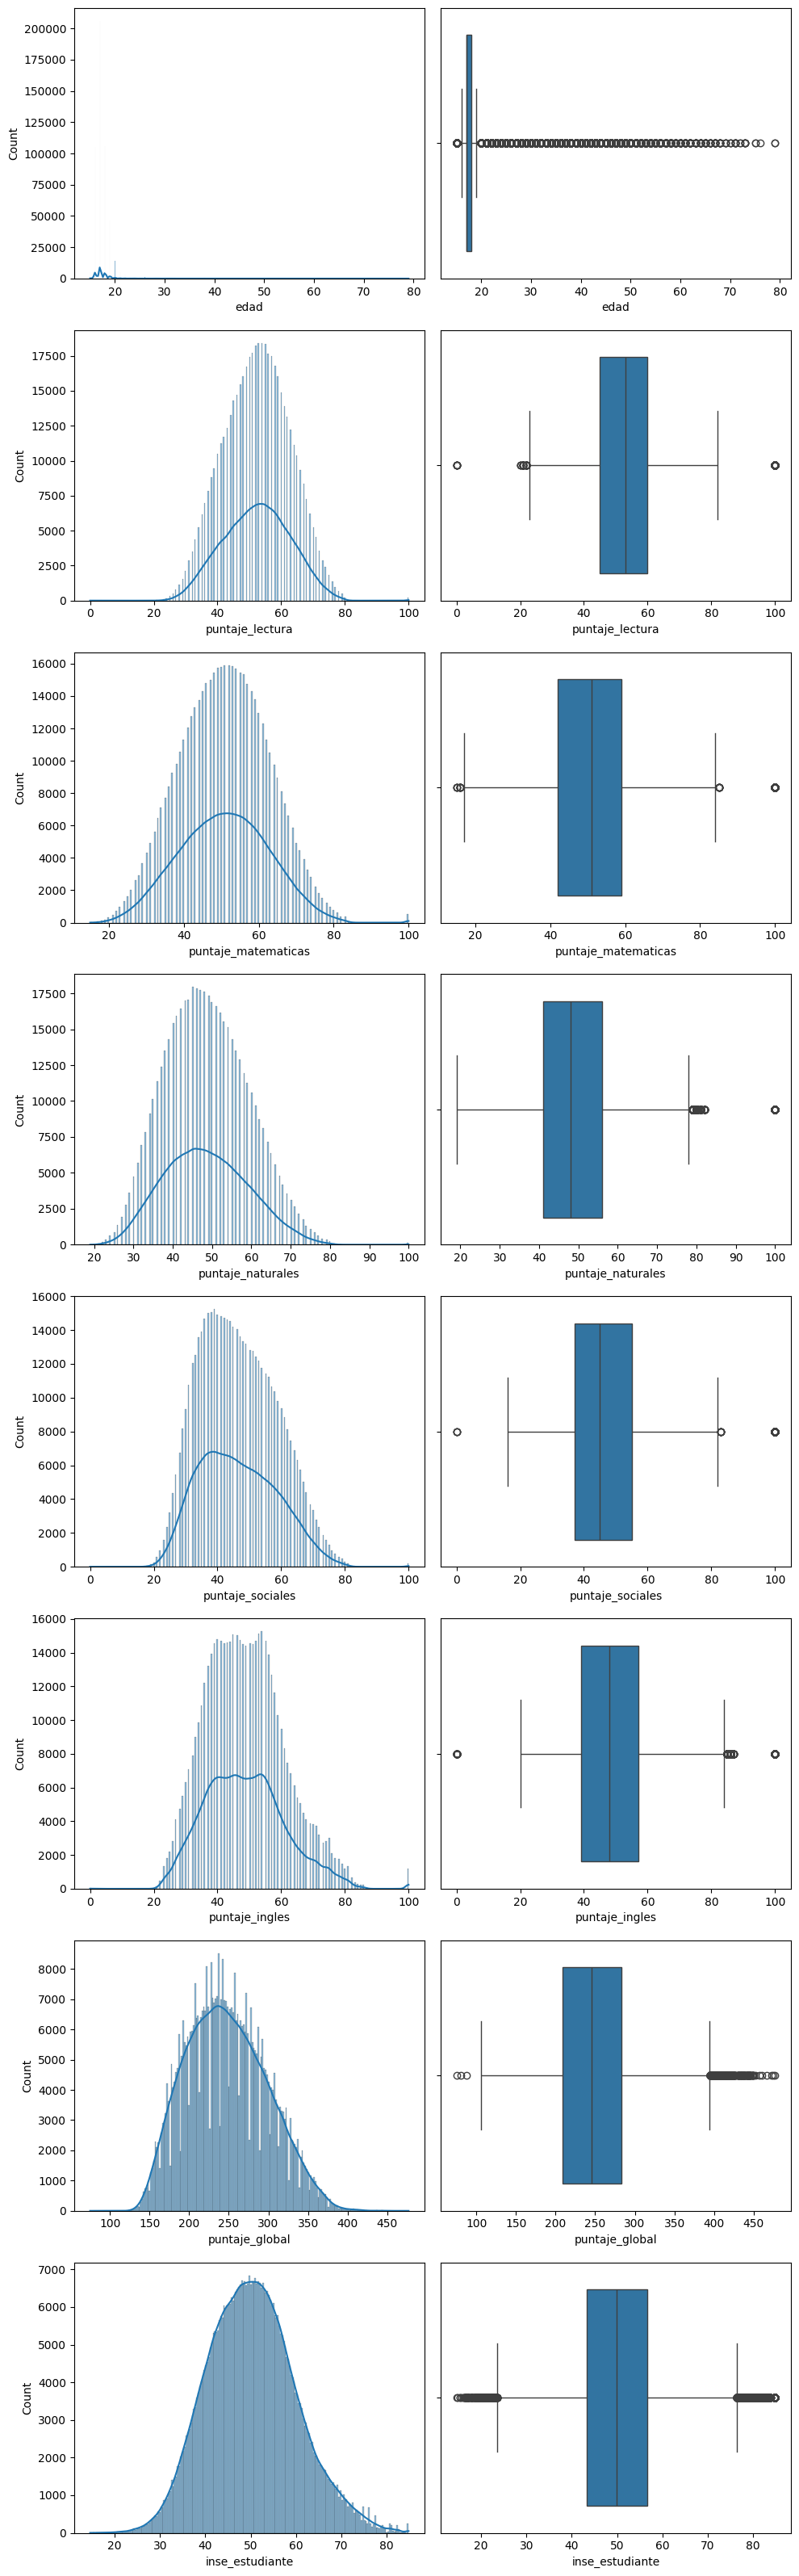

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = num_vars.select_dtypes(include='number').columns
n = len(num_cols)
fig, axes = plt.subplots(n, 2, figsize=(10, 4*n))

for i, col in enumerate(num_cols):
    sns.histplot(num_vars[col], kde=True, ax=axes[i,0])
    sns.boxplot(x=num_vars[col], ax=axes[i,1])

plt.tight_layout()
plt.show()


In [11]:
from scipy.stats import skew, kurtosis
import pandas as pd

def sesgo_curtosis(df):
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            x = df[col].dropna()
            if len(x) == 0:
                continue
            ses = round(skew(x), 2)
            curt = round(kurtosis(x), 2)
            # Interpretaciones...
            if ses > 1:
                interp_sesgo = "Asimetría alta, cola a la derecha"
            elif ses < -1:
                interp_sesgo = "Asimetría alta, cola a la izquierda"
            else:
                interp_sesgo = "Asimetría baja o moderada"
            if curt > 1:
                interp_curtosis = "Distribución más picuda que la normal"
            elif curt < -1:
                interp_curtosis = "Distribución más plana que la normal"
            else:
                interp_curtosis = "Distribución similar a la normal"

            print(f"{col}:")
            print(f"  Sesgo: {ses} ({interp_sesgo})")
            print(f"  Curtosis: {curt} ({interp_curtosis})\n")



In [12]:
sesgo_curtosis(num_vars)

edad:
  Sesgo: 7.05 (Asimetría alta, cola a la derecha)
  Curtosis: 68.08 (Distribución más picuda que la normal)

puntaje_lectura:
  Sesgo: -0.01 (Asimetría baja o moderada)
  Curtosis: -0.36 (Distribución similar a la normal)

puntaje_matematicas:
  Sesgo: 0.06 (Asimetría baja o moderada)
  Curtosis: -0.23 (Distribución similar a la normal)

puntaje_naturales:
  Sesgo: 0.23 (Asimetría baja o moderada)
  Curtosis: -0.32 (Distribución similar a la normal)

puntaje_sociales:
  Sesgo: 0.31 (Asimetría baja o moderada)
  Curtosis: -0.51 (Distribución similar a la normal)

puntaje_ingles:
  Sesgo: 0.45 (Asimetría baja o moderada)
  Curtosis: 0.17 (Distribución similar a la normal)

puntaje_global:
  Sesgo: 0.26 (Asimetría baja o moderada)
  Curtosis: -0.47 (Distribución similar a la normal)

inse_estudiante:
  Sesgo: 0.25 (Asimetría baja o moderada)
  Curtosis: 0.0 (Distribución similar a la normal)



#### CONCLUSIONES

Las variables numéricas predictoras presentan distribuciones acordes a lo esperado. La única que podría resultar conflictiva es edad, que muestra un sesgo positivo (asimetría a la derecha), es decir, concentra la mayoría de los valores alrededor de la media/mediana pero con algunos valores altos alejados de ellas.

Sin embargo, esto se explica por la naturaleza de la variable: aunque la edad típica para presentar el examen ICFES ronda los 17 años, también participan personas con edades mayores, lo que genera esa cola hacia la derecha. Por lo tanto, su sesgo y curtosis son comprensibles y no requieren transformación.

El resto de las variables numéricas no presentan inconvenientes: todas muestran una asimetría baja, y varias de ellas tienen distribuciones cercanas a la normal sin necesidad de transformaciones adicionales.

### 1.3 DETECCIÓN OUTLIERS EN VARIABLE OBJETIVO

Número de outliers: 537


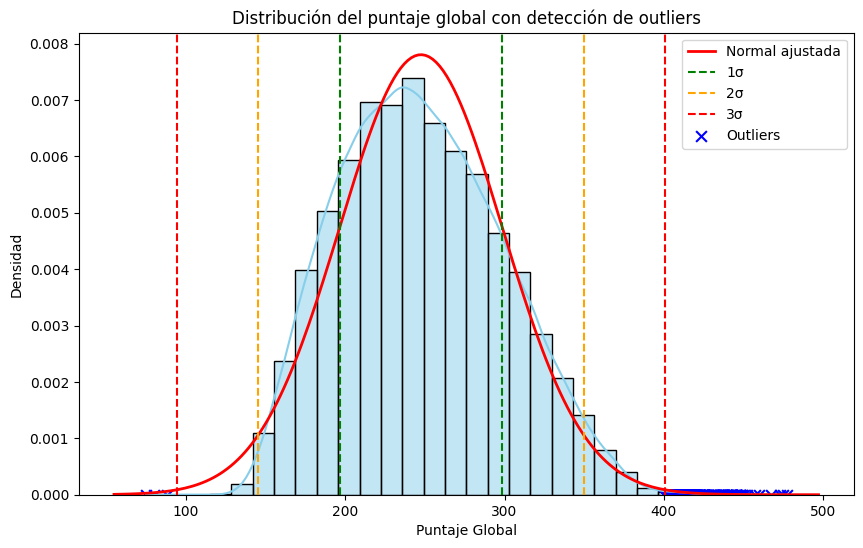

In [13]:

# Extraer variable
y = icfes['puntaje_global'].dropna()

# Normalización (Z-score)
mu, sigma = y.mean(), y.std()
z_scores = (y - mu) / sigma

# Índices de los outliers
outlier_idx = y.index[abs(z_scores) > 3]

# Guardar como lista de tuplas (índice, valor, z-score)
outliers = [(i, y.loc[i], z_scores.loc[i]) for i in outlier_idx]

print("Número de outliers:", len(outliers))

from scipy.stats import norm

plt.figure(figsize=(10,6))

# Histograma con KDE
sns.histplot(y, kde=True, stat="density", bins=30, color="skyblue", edgecolor="black")

# Curva normal teórica
xmin, xmax = plt.xlim()
xx = np.linspace(xmin, xmax, 200)
plt.plot(xx, norm.pdf(xx, mu, sigma), 'r', lw=2, label="Normal ajustada")

# Líneas verticales de 1σ, 2σ, 3σ
for k, col in zip([1,2,3], ["g","orange","red"]):
    plt.axvline(mu + k*sigma, color=col, linestyle="--")
    plt.axvline(mu - k*sigma, color=col, linestyle="--", label=f"{k}σ")

# Graficar puntos outliers
plt.scatter(y.loc[outlier_idx], [0]*len(outlier_idx), 
            color="blue", marker="x", s=60, label="Outliers")

plt.title("Distribución del puntaje global con detección de outliers")
plt.xlabel("Puntaje Global")
plt.ylabel("Densidad")
plt.legend()
plt.show()

#### 2.1.1 CONOCER LOS PUNTAJES ATÍPICOS PARA LOS MÁS BAJOS Y MÁS ALTOS

In [14]:
# Extraer variable
y = icfes['puntaje_global'].dropna()

# Calcular media y desviación estándar
mu, sigma = y.mean(), y.std()

# Calcular límites para outliers (3 desviaciones estándar)
limite_inferior = mu - 3 * sigma
limite_superior = mu + 3 * sigma

print(f"Límite inferior (empiezan los más bajos): {limite_inferior:.2f}")
print(f"Límite superior (empiezan los más altos): {limite_superior:.2f}")

Límite inferior (empiezan los más bajos): 94.24
Límite superior (empiezan los más altos): 400.90


#### 2.1.2  EXAMINAR SI LOS VALORES ATÍPICOS BAJOS SON ERRORES O NO

In [15]:
icfes_min_100 = icfes[icfes['puntaje_global'] <= 95]
icfes_min_100.shape

(3, 58)

In [16]:
icfes_min_100.head(20)

,nacionalidad,genero,region,etnia_estudiante,edad,grupo_edad,presento_fuera_edad,num_personas_casa,num_cuartos_casa,estrato_casa,tiempo_internet,internet,tv,computador,lavadora,microndas,carro,moto,consola,situacion_economica_casa,num_libros,tiempo_lectura,freq_leche_derivados,freq_carne_pescado_similares,freq_cereales_frutos_legumbres,nivel_edu_padre,actividad_padre,nivel_edu_madre,actividad_madre,horas_trabajo_semanal,tipo_remuneracion,colegio_genero,colegio_naturaleza,colegio_calendario,colegio_caracter,colegio_area,colegio_jornada,colegio_mpio,colegio_dpto,puntaje_lectura,percentil_lectura,puntaje_matematicas,percentil_matematicas,nivel_matematicas,puntaje_naturales,percentil_naturales,nivel_naturales,puntaje_sociales,percentil_sociales,nivel_sociales,puntaje_ingles,percentil_ingles,nivel_ingles,puntaje_global,percentil_global,inse_estudiante,nse_estudiante,nse_colegio
211153,Colombia,Femenino,Pacífica,No,31,30-34,1,Hogar tradicional,2.00,2.00,Poco,0,0,0,0,0,0,0,0,Igual,0-10,No lee,Aceptable,Óptimo,None,Primaria Inc,Trabajadores Operativos,Bachiller Inc,Trabajador Independiente,Tiempo Parcial Reducido,Remuneración Monetaria,Mixto,Oficial,A,S,Urbano,Sabatina,Cali,Valle,0,1,20,1,1,22,1,1,21,1,1,41.00,31,A-,88,1,46.59,2.00,2.00
227524,Colombia,Masculino,Andina,No,28,25-29,1,Más de 1 hogar,5.00,3.00,Poco,0,1,0,1,1,1,0,1,Igual,None,30-60 min,None,Insuficiente,Aceptable,Primaria Inc,Trabajadores Operativos,Primaria Inc,Microempresario,Tiempo Completo,Sin Remuneración,Mixto,Oficial,A,S,Urbano,Noche,Bogotá D.C.,Bogotá,0,1,16,1,1,21,1,1,20,1,1,25.00,1,A-,75,1,47.73,2.00,3.00
335764,Colombia,Masculino,Andina,No,64,60-64,1,None,NaN,4.00,Ninguno,0,1,0,0,0,0,0,1,Peor,0-10,No lee,Muy Insuficiente,Insuficiente,Insuficiente,Ninguna,Profesionales,Ninguna,Microempresario,Tiempo Completo,Remuneración Mixta,Mixto,No Oficial,A,S,Urbano,Sabatina,Medellín,Antioquia,22,1,17,1,1,22,1,1,0,1,1,26.00,2,A-,80,1,37.33,1.00,2.00


#### 2.1.3 SE ELIMINA UN POSIBLE ERROR DE TIPEO

In [17]:
icfes = icfes.drop(index=134084)

#### 2.1.4 EXAMINAR SI LOS VALORES ATÍPICOS ALTOS SON ERRORES O NO

In [18]:
icfes_max_400 = icfes[icfes['puntaje_global'] >= 400]
icfes_max_400.shape

(568, 58)

In [19]:
icfes_max_400.head(10)

,nacionalidad,genero,region,etnia_estudiante,edad,grupo_edad,presento_fuera_edad,num_personas_casa,num_cuartos_casa,estrato_casa,tiempo_internet,internet,tv,computador,lavadora,microndas,carro,moto,consola,situacion_economica_casa,num_libros,tiempo_lectura,freq_leche_derivados,freq_carne_pescado_similares,freq_cereales_frutos_legumbres,nivel_edu_padre,actividad_padre,nivel_edu_madre,actividad_madre,horas_trabajo_semanal,tipo_remuneracion,colegio_genero,colegio_naturaleza,colegio_calendario,colegio_caracter,colegio_area,colegio_jornada,colegio_mpio,colegio_dpto,puntaje_lectura,percentil_lectura,puntaje_matematicas,percentil_matematicas,nivel_matematicas,puntaje_naturales,percentil_naturales,nivel_naturales,puntaje_sociales,percentil_sociales,nivel_sociales,puntaje_ingles,percentil_ingles,nivel_ingles,puntaje_global,percentil_global,inse_estudiante,nse_estudiante,nse_colegio
3344,Colombia,Masculino,Andina,No,16,15-19,0,Hogar tradicional,2.00,2.00,Moderado,1,0,1,1,1,0,1,0,Igual,11-25,>2h,Óptimo,Aceptable,Aceptable,Bachiller,Sin Actividad Remunerada,Bachiller,Trabajador Independiente,No Trabaja,No Aplica,Mixto,Oficial,A,S,Urbano,Completa,Caucasia,Antioquia,100,100,80,100,4,74,100,4,70,97,3,76.00,98,B1,403,100,53.83,3.00,2.00
4590,Colombia,Masculino,Caribe,No,17,15-19,0,Hogar tradicional,3.00,3.00,Promedio,1,1,1,1,1,0,0,1,Mejor,11-25,0-30 min,Óptimo,Óptimo,Insuficiente,Postgrado,Directivos,Postgrado,Directivos,No Trabaja,No Aplica,Mixto,No Oficial,A,S,Urbano,Completa,Barranquilla,Atlantico,75,100,100,100,4,76,100,4,76,100,4,100.00,100,B+,416,100,71.16,4.00,4.00
5864,Colombia,Femenino,Andina,No,17,15-19,0,Hogar tradicional,3.00,3.00,Promedio,1,1,1,1,1,0,0,0,Igual,26-100,30-60 min,Óptimo,Óptimo,Aceptable,Tecnico/Tecnologo,Profesionales,Postgrado,Microempresario,No Trabaja,No Aplica,Mixto,No Oficial,A,S,Urbano,Completa,Bogotá D.C.,Bogotá,72,98,100,100,4,77,100,4,74,99,4,100.00,100,B+,411,100,66.58,4.00,4.00
6677,Colombia,Masculino,Andina,No,17,15-19,0,Hogar tradicional,3.00,5.00,Promedio,1,1,1,1,1,1,0,1,Mejor,>100,1-2h,Óptimo,Óptimo,Óptimo,Postgrado,Profesionales,Postgrado,Profesionales,No Trabaja,No Aplica,Masculino,No Oficial,A,S,Rural,Completa,Piedecuesta,Santander,75,100,100,100,4,77,100,4,100,100,4,100.00,100,B+,445,100,84.83,4.00,4.00
6910,Colombia,Masculino,Andina,No,17,15-19,0,Hogar tradicional,3.00,2.00,Promedio,1,1,1,1,1,1,0,1,Mejor,11-25,0-30 min,Óptimo,Aceptable,Insuficiente,Profesional,Profesionales,Postgrado,Profesionales,No Trabaja,No Aplica,Mixto,No Oficial,A,S,Urbano,Completa,Envigado,Antioquia,75,99,77,100,4,100,100,4,78,100,4,78.00,99,B1,411,100,72.06,4.00,4.00
7145,Colombia,Masculino,Andina,No,16,15-19,0,Hogar tradicional,3.00,4.00,Promedio,1,1,1,1,1,1,0,0,Igual,26-100,0-30 min,Óptimo,Óptimo,Aceptable,Postgrado,Directivos,Postgrado,Profesionales,No Trabaja,No Aplica,Mixto,No Oficial,A,S,Urbano,Completa,Bogotá D.C.,Bogotá,74,99,100,100,4,80,100,4,73,99,4,83.00,100,B+,409,100,75.53,4.00,4.00
7275,Colombia,Masculino,Andina,No,17,15-19,0,Hogar tradicional,3.00,4.00,Mucho,1,1,1,1,1,1,0,1,Igual,>100,0-30 min,Aceptable,Óptimo,Aceptable,Profesional,Trabajador Independiente,Profesional,Profesionales,No Trabaja,No Aplica,Mixto,No Oficial,A,S,Urbano,Completa,Bogotá D.C.,Bogotá,81,100,100,100,4,100,100,4,75,100,4,100.00,100,B+,449,100,70.76,4.00,4.00
7281,Colombia,Masculino,Andina,No,16,15-19,0,Hogar tradicional,3.00,3.00,Promedio,1,1,1,1,0,1,1,1,Igual,11-25,30-60 min,Muy Insuficiente,Óptimo,Aceptable,Postgrado,Trabajador Independiente,Profesional,Microempresario,Trabajo Ocasional,Remuneración Monetaria,Mixto,No Oficial,A,S,Urbano,Mañana,Bucaramanga,Santander,100,100,82,100,4,80,100,4,78,100,4,67.00,92,A2,418,100,62.37,3.00,3.00
7291,Colombia,Masculino,Orinoquía,No,16,15-19,0,Hogar tradicional,2.00,2.00,Moderado,1,1,1,1,1,0,1,0,Peor,>100,1-2h,Óptimo,Óptimo,Aceptable,Bachiller,Microempresario,Bachiller,Trabajadores Operativos,No Trabaja,No Aplica,Mixto,Oficial,A,S,Urbano,Mañana,Villavicencio,Meta,75,100,77,99,4,100,100,4,75,100

#### CONCLUSIONES

Los puntajes atípicamente bajos se observaron principalmente en personas que presentaron el examen fuera de la edad típica. Esto podría estar relacionado con un menor tiempo de estudio o con trayectorias académicas más irregulares, lo cual podría haber afectado su desempeño. Sin embargo, estos casos son muy pocos: solo 4 entre más de 30.000 participantes.

Por otro lado, los puntajes atípicamente altos (superiores a los 400 puntos) corresponden en su mayoría a estudiantes con un nivel socioeconómico (NSE) alto, tanto a nivel individual como institucional (colegio), lo cual sugiere que el contexto socioeconómico podría favorecer un mejor rendimiento.

### 1.3 DETECCIÓN DE OUTLIERS DE OTRAS VARIABLES NUMÉRICAS

In [20]:
icfes.sample(20)

,nacionalidad,genero,region,etnia_estudiante,edad,grupo_edad,presento_fuera_edad,num_personas_casa,num_cuartos_casa,estrato_casa,tiempo_internet,internet,tv,computador,lavadora,microndas,carro,moto,consola,situacion_economica_casa,num_libros,tiempo_lectura,freq_leche_derivados,freq_carne_pescado_similares,freq_cereales_frutos_legumbres,nivel_edu_padre,actividad_padre,nivel_edu_madre,actividad_madre,horas_trabajo_semanal,tipo_remuneracion,colegio_genero,colegio_naturaleza,colegio_calendario,colegio_caracter,colegio_area,colegio_jornada,colegio_mpio,colegio_dpto,puntaje_lectura,percentil_lectura,puntaje_matematicas,percentil_matematicas,nivel_matematicas,puntaje_naturales,percentil_naturales,nivel_naturales,puntaje_sociales,percentil_sociales,nivel_sociales,puntaje_ingles,percentil_ingles,nivel_ingles,puntaje_global,percentil_global,inse_estudiante,nse_estudiante,nse_colegio
437207,Colombia,Masculino,Andina,No,16,15-19,0,Hogar tradicional,2.00,3.00,Poco,1,1,1,1,1,1,0,1,Igual,26-100,30-60 min,Insuficiente,Aceptable,Muy Insuficiente,Tecnico/Tecnologo Inc,Profesionales,Profesional,Profesionales,No Trabaja,No Aplica,Mixto,No Oficial,A,S,Urbano,Completa,Bogotá D.C.,Bogotá,64,86,63,85,3,61,87,3,68,96,3,69.00,94,B1,322,92,66.23,4.00,3.00
106454,Colombia,Masculino,Pacífica,No,17,15-19,0,Hogar tradicional,3.00,2.00,Moderado,1,0,1,0,0,0,1,0,Igual,>100,>2h,Insuficiente,Insuficiente,Aceptable,Profesional,Sin Actividad Remunerada,Tecnico/Tecnologo,Profesionales,Trabajo Ocasional,Sin Remuneración,Mixto,No Oficial,A,S,Urbano,Mañana,Tuluá,Valle,74,99,71,96,4,76,100,4,67,95,3,60.00,83,A2,355,99,52.42,3.00,3.00
107115,Colombia,Femenino,Pacífica,Afro,17,15-19,0,Hogar tradicional,3.00,1.00,Poco,0,1,0,1,0,0,0,0,Peor,11-25,30-60 min,Óptimo,Aceptable,Insuficiente,Bachiller,Microempresario,Bachiller,Trabajador Independiente,No Trabaja,No Aplica,Mixto,Oficial,A,S,Urbano,Mañana,Buenaventura,Valle,53,54,37,15,2,46,45,2,43,43,2,36.00,17,A-,220,34,49.21,2.00,3.00
206027,Colombia,Femenino,Andina,No,17,15-19,0,Hogar grande,3.00,2.00,Poco,0,1,0,1,0,0,1,0,Peor,0-10,30-60 min,Aceptable,Insuficiente,Insuficiente,Bachiller Inc,Sin Actividad Remunerada,Tecnico/Tecnologo Inc,Trabajador Independiente,No Trabaja,No Aplica,Mixto,Oficial,A,S,Urbano,Unica,Armenia,Quindio,60,75,65,88,3,71,98,4,63,91,3,56.00,74,A1,320,92,45.42,2.00,2.00
478487,Colombia,Masculino,Pacífica,Afro,17,15-19,0,Más de 1 hogar,4.00,NaN,Promedio,0,1,0,1,0,0,1,0,Igual,11-25,30-60 min,Aceptable,Insuficiente,Insuficiente,Primaria,Sin Actividad Remunerada,Primaria,Sector Primario,Medio Tiempo,Sin Remuneración,Mixto,Oficial,A,S,Rural,Mañana,San Andrés De Tumaco,Nariño,58,69,54,60,3,41,26,2,46,51,2,46.00,45,A-,247,53,40.70,1.00,2.00
227412,Colombia,Masculino,Pacífica,No,16,15-19,0,Más de 1 hogar,5.00,3.00,Promedio,1,1,1,1,1,0,0,0,Igual,0-10,0-30 min,Insuficiente,Óptimo,Insuficiente,No aplica,Profesionales,Profesional,No Aplica,No Trabaja,No Aplica,Mixto,Oficial,A,S,Urbano,Tarde,Cali,Valle,56,62,66,89,3,61,87,3,52,69,2,65.00,91,A2,296,82,58.96,3.00,3.00
26992,Colombia,Masculino,Andina,No,17,15-19,0,Hogar tradicional,4.00,2.00,Promedio,0,1,1,1,0,0,1,1,Igual,0-10,0-30 min,Insuficiente,Aceptable,Insuficiente,Primaria Inc,Trabajadores Operativos,Bachiller Inc,Trabajadores Operativos,No Trabaja,No Aplica,Mixto,No Oficial,A,S,Urbano,Completa,Bogotá D.C.,Bogotá,53,51,51,51,3,53,66,2,52,69,2,49.00,55,A1,260,61,45.05,2.00,3.00
336765,Colombia,Femenino,Andina,No,16,15-19,0,Hogar tradicional,5.00,3.00,Mucho,1,1,1,1,1,1,1,1,Mejor,26-100,>2h,Óptimo,Óptimo,Óptimo,Profesional,Profesionales,Postgrado,Directivos,No Trabaja,No Aplica,Mixto,No Oficial,A,S,Urbano,Mañana,La Mesa,Cundinamarca,66,90,61,81,3,67,96,3,50,64,2,57.00,76,A1,303,85,76.59,4.00,3.00
389411,Colombia,Femenino,Andina,No,16,15-19,0,Hogar tradicional,2.00,4.00,Promedio,1,1,1,1,1,1,0,0,Mejor,11-25,30-60 min,Óptimo,Óptimo,Aceptable,Profesional,Trabajadores Operativos,Profesional,Directivos,No Trabaja,No Aplica,Mixto,No Oficial,A,S,Urbano,Completa,Bogotá D.C.,Bo

In [21]:
num_vars

,edad,puntaje_lectura,puntaje_matematicas,puntaje_naturales,puntaje_sociales,puntaje_ingles,puntaje_global,inse_estudiante
0,17,47,48,37,30,54.00,208,50.94
1,16,60,65,54,59,63.00,299,59.76
2,18,66,57,41,74,64.00,299,50.76
3,17,62,54,61,73,53.00,309,45.77
4,17,63,57,55,57,52.00,288,52.91
...,...,...,...,...,...,...,...,...
506052,20,76,78,65,74,58.00,360,47.58
506053,17,75,73,72,67,74.00,360,57.40
506054,17,72,83,71,77,72.00,377,71.22
506055,17,59,61,54,52,46.00,278,38.13


In [22]:
def valores_z (df):
    for col in df.columns:
        media, desviacion = df[col].mean(), df[col].std()
        z_scores = (df[col] - media) / desviacion
        outlier_idx = df.index[abs(z_scores) > 3]
        print(f"{col}: {len(outlier_idx)} outliers")

In [23]:
valores_z(num_vars)

edad: 9162 outliers
puntaje_lectura: 219 outliers
puntaje_matematicas: 514 outliers
puntaje_naturales: 269 outliers
puntaje_sociales: 230 outliers
puntaje_ingles: 1265 outliers
puntaje_global: 537 outliers
inse_estudiante: 1503 outliers


In [24]:
import pandas as pd

def limites_outliers(df):
    """
    Calcula límites de outliers (basados en ± 3 desviaciones estándar)
    para todas las variables numéricas del DataFrame.

    Retorna un diccionario con los límites inferior y superior por variable.
    """
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            x = df[col].dropna()
            if len(x) == 0:
                continue

            mu, sigma = x.mean(), x.std()
            limite_inferior = mu - 3 * sigma
            limite_superior = mu + 3 * sigma

            print(f"{col}:")
            print(f"  Media: {mu:.2f}")
            print(f"  Desviación estándar: {sigma:.2f}")
            print(f"  Límite inferior (empiezan los más bajos): {limite_inferior:.2f}")
            print(f"  Límite superior (empiezan los más altos): {limite_superior:.2f}\n")


In [25]:
limites_outliers(num_vars)

edad:
  Media: 17.75
  Desviación estándar: 3.05
  Límite inferior (empiezan los más bajos): 8.59
  Límite superior (empiezan los más altos): 26.90

puntaje_lectura:
  Media: 52.37
  Desviación estándar: 10.47
  Límite inferior (empiezan los más bajos): 20.97
  Límite superior (empiezan los más altos): 83.76

puntaje_matematicas:
  Media: 50.92
  Desviación estándar: 11.92
  Límite inferior (empiezan los más bajos): 15.17
  Límite superior (empiezan los más altos): 86.67

puntaje_naturales:
  Media: 48.59
  Desviación estándar: 10.66
  Límite inferior (empiezan los más bajos): 16.60
  Límite superior (empiezan los más altos): 80.57

puntaje_sociales:
  Media: 46.45
  Desviación estándar: 12.14
  Límite inferior (empiezan los más bajos): 10.04
  Límite superior (empiezan los más altos): 82.87

puntaje_ingles:
  Media: 48.71
  Desviación estándar: 12.51
  Límite inferior (empiezan los más bajos): 11.18
  Límite superior (empiezan los más altos): 86.24

puntaje_global:
  Media: 247.57
  D

#### CONCLUSIONES

Aunque el análisis con valores Z identificó cientos de valores extremos en algunas variables y miles en otras, al revisar más a fondo se encontró que dichos valores corresponden a resultados plausibles dentro del contexto del examen ICFES (Saber 11).

Por lo tanto, no se considera necesario aplicar un tratamiento o transformación a estas variables, ya que los valores identificados como extremos no representan errores ni datos atípicos no válidos, sino variabilidad normal en el desempeño de los estudiantes. 

### 1.4 IDENTIFICAR VARIABLES CON ALTA VARIABILIDAD

In [26]:
def resumen_variabilidad(df, num_vars=None):
    if num_vars is None:
        num_vars = df.select_dtypes(include=np.number).columns.tolist()

    resumen = []

    for col in num_vars:
        x = df[col].dropna()

        media = x.mean()
        std = x.std()
        var = x.var()
        rango = x.max() - x.min()
        iqr = x.quantile(0.75) - x.quantile(0.25)
        mad = (x - x.median()).abs().mean()
        cv = std / media if media != 0 else np.nan

        # Diagnóstico básico
        diagnostico = []
        if cv < 0.1:
            diagnostico.append("Baja variabilidad (CV<0.1)")
        elif cv > 1:
            diagnostico.append("Alta variabilidad relativa (CV>1)")
        if rango > 10 * iqr:
            diagnostico.append("Posibles outliers (rango muy amplio)")
        if mad > iqr:
            diagnostico.append("Alta dispersión alrededor de la mediana")

        resumen.append({
            "variable": col,
            "media": round(media, 2),
            "std": round(std, 2),
            "varianza": round(var, 2),
            "rango": round(rango, 2),
            "IQR": round(iqr, 2),
            "MAD": round(mad, 2),
            "CV": round(cv, 2) if not np.isnan(cv) else "NA",
            "diagnóstico": ", ".join(diagnostico) if diagnostico else "Sin problemas relevantes"
        })

    return pd.DataFrame(resumen)

In [27]:
resumen_variabilidad(num_vars)

,variable,media,std,varianza,rango,IQR,MAD,CV,diagnóstico
0,edad,17.75,3.05,9.31,64.00,1.00,1.20,0.17,"Posibles outliers (rango muy amplio), Alta dis..."
1,puntaje_lectura,52.37,10.47,109.52,100.00,15.00,8.52,0.20,Sin problemas relevantes
2,puntaje_matematicas,50.92,11.92,142.01,85.00,17.00,9.67,0.23,Sin problemas relevantes
3,puntaje_naturales,48.59,10.66,113.67,81.00,15.00,8.68,0.22,Sin problemas relevantes
4,puntaje_sociales,46.45,12.14,147.32,100.00,18.00,10.06,0.26,Sin problemas relevantes
5,puntaje_ingles,48.71,12.51,156.50,100.00,18.00,10.05,0.26,Sin problemas relevantes
6,puntaje_global,247.57,51.11,2612.30,402.00,74.00,41.90,0.21,Sin problemas relevantes
7,inse_estudiante,50.30,9.76,95.23,70.24,13.20,7.79,0.19,Sin problemas relevantes


### 1.5 GRÁFICOS DE CONTEO

In [28]:
icfes.sample(8)

,nacionalidad,genero,region,etnia_estudiante,edad,grupo_edad,presento_fuera_edad,num_personas_casa,num_cuartos_casa,estrato_casa,tiempo_internet,internet,tv,computador,lavadora,microndas,carro,moto,consola,situacion_economica_casa,num_libros,tiempo_lectura,freq_leche_derivados,freq_carne_pescado_similares,freq_cereales_frutos_legumbres,nivel_edu_padre,actividad_padre,nivel_edu_madre,actividad_madre,horas_trabajo_semanal,tipo_remuneracion,colegio_genero,colegio_naturaleza,colegio_calendario,colegio_caracter,colegio_area,colegio_jornada,colegio_mpio,colegio_dpto,puntaje_lectura,percentil_lectura,puntaje_matematicas,percentil_matematicas,nivel_matematicas,puntaje_naturales,percentil_naturales,nivel_naturales,puntaje_sociales,percentil_sociales,nivel_sociales,puntaje_ingles,percentil_ingles,nivel_ingles,puntaje_global,percentil_global,inse_estudiante,nse_estudiante,nse_colegio
452836,Colombia,Femenino,Andina,No,17,15-19,0,Hogar tradicional,3.00,2.00,Poco,1,1,1,1,1,0,1,0,Mejor,0-10,0-30 min,Aceptable,Óptimo,Aceptable,Primaria Inc,Sin Actividad Remunerada,Primaria Inc,Trabajadores Operativos,No Trabaja,No Aplica,Mixto,Oficial,A,S,Urbano,Completa,Nuevo Colón,Boyaca,50,43,37,14,2,49,54,2,39,33,1,49.00,53,A1,221,34,51.16,2.00,2.00
3317,Colombia,Masculino,Andina,Otra,18,15-19,0,Más de 1 hogar,5.00,2.00,Poco,0,1,0,0,0,0,1,0,Igual,0-10,1-2h,Muy Insuficiente,Insuficiente,Muy Insuficiente,No aplica,Sector Primario,Primaria,No Aplica,Tiempo Parcial Reducido,Remuneración Monetaria,Mixto,Oficial,A,N,Rural,Completa,Pitalito,Huila,53,51,45,34,2,41,27,2,39,33,1,40.00,27,A-,221,34,28.98,1.00,1.00
395134,Colombia,Femenino,Andina,No,18,15-19,0,Hogar tradicional,2.00,2.00,Mucho,1,1,1,1,0,0,0,0,Igual,>100,1-2h,Aceptable,Óptimo,Insuficiente,Profesional,Sin Actividad Remunerada,Bachiller,Profesionales,No Trabaja,No Aplica,Mixto,Oficial,A,S,Urbano,Tarde,Bogotá D.C.,Bogotá,35,5,26,2,1,36,13,1,27,4,1,29.00,5,A-,154,2,57.88,3.00,3.00
264242,Colombia,Femenino,Andina,No,17,15-19,0,Hogar tradicional,3.00,2.00,Mucho,1,1,1,1,1,0,0,0,Igual,0-10,No lee,Óptimo,Óptimo,Aceptable,Bachiller,No Aplica,Bachiller,Trabajadores Operativos,No Trabaja,No Aplica,Mixto,Oficial,A,S,Urbano,Mañana,Tunja,Boyaca,65,88,45,32,2,54,70,2,61,87,3,51.00,58,A1,279,73,55.42,3.00,2.00
251983,Colombia,Masculino,Andina,No,19,15-19,0,Hogar grande,3.00,2.00,Promedio,1,1,1,1,0,0,0,0,Mejor,0-10,30-60 min,Aceptable,Aceptable,Aceptable,Primaria,Trabajadores Operativos,Primaria,Trabajadores Operativos,No Trabaja,No Aplica,Mixto,Oficial,A,S,Urbano,Mañana,Bogotá D.C.,Bogotá,58,70,59,74,3,53,67,2,55,75,2,48.00,51,A1,278,73,46.69,2.00,3.00
279160,Colombia,Masculino,Andina,No,17,15-19,0,Hogar tradicional,2.00,2.00,Promedio,0,1,1,1,0,0,0,0,Igual,11-25,30-60 min,Óptimo,Óptimo,Aceptable,Bachiller,Sin Información,Bachiller,Sin Información,Trabajo Ocasional,Remuneración Monetaria,Mixto,Oficial,A,N,Urbano,Mañana,Ráquira,Boyaca,55,60,68,93,3,60,84,3,56,76,3,43.00,36,A-,292,80,51.25,3.00,2.00
441007,Colombia,Masculino,Andina,No,17,15-19,0,Hogar tradicional,3.00,2.00,Mucho,1,1,0,1,1,0,0,0,Igual,0-10,0-30 min,Muy Insuficiente,Óptimo,Aceptable,Bachiller,Sector Primario,Bachiller,No Aplica,No Trabaja,No Aplica,Mixto,No Oficial,A,S,Urbano,Completa,Funza,Cundinamarca,39,12,46,36,2,37,17,1,34,17,1,38.00,23,A-,195,17,49.55,2.00,3.00
92458,Colombia,Masculino,Orinoquía,No,16,15-19,0,Hogar grande,4.00,2.00,Promedio,1,0,1,1,1,1,1,0,Mejor,26-100,No lee,Óptimo,Aceptable,Óptimo,Profesional,Sin Actividad Remunerada,Primaria,Profesionales,No Trabaja,No Aplica,Mixto,Oficial,A,S,Urbano,Mañana,Lejanías,Meta,53,54,55,63,3,53,68,2,48,58,2,46.00,45,A-,259,61,60.47,3.00,2.00


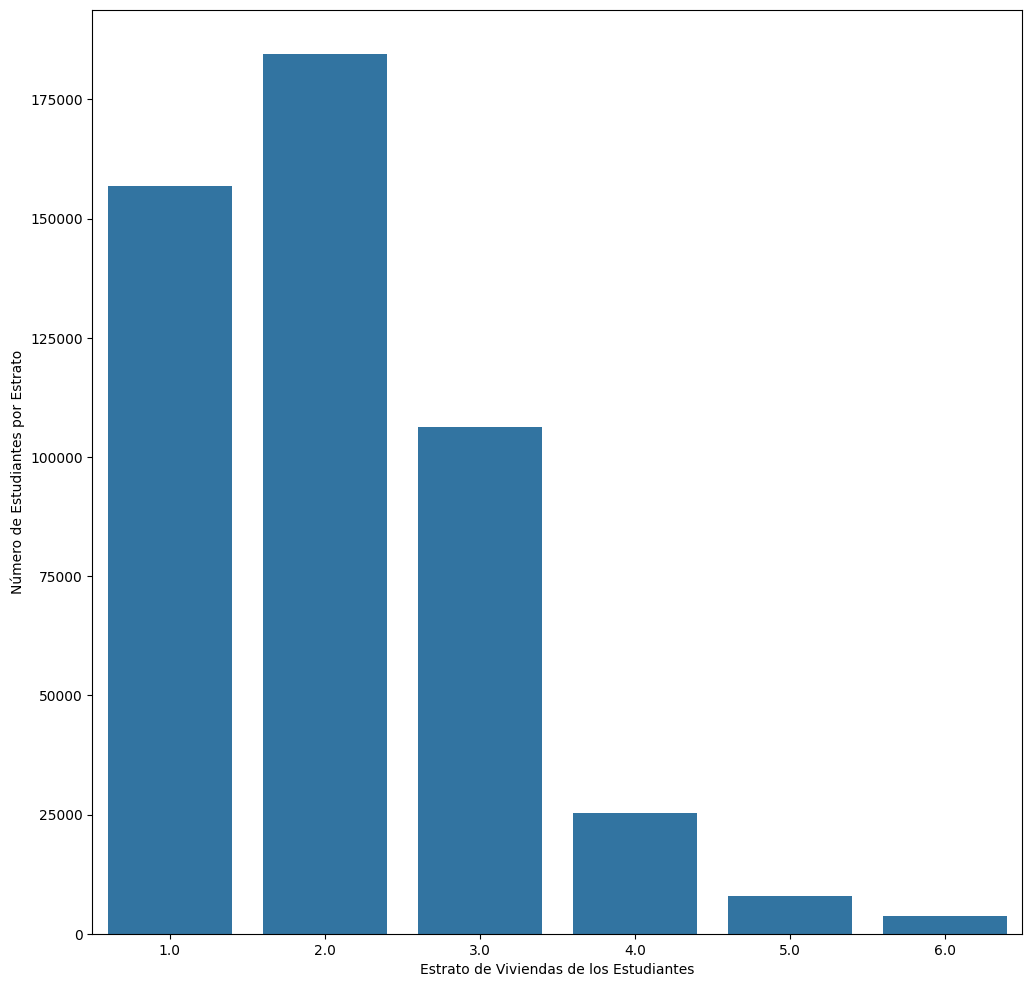

In [29]:
### NÚMERO DE ESTUDIANTES POR ESTRATO SOCIOECONÓMICO

estrato_conteo = icfes['estrato_casa'].dropna()

plt.figure(figsize=(12, 12))
sns.countplot(x=estrato_conteo)

plt.ylabel('Número de Estudiantes por Estrato')
plt.xlabel('Estrato de Viviendas de los Estudiantes')
plt.show()

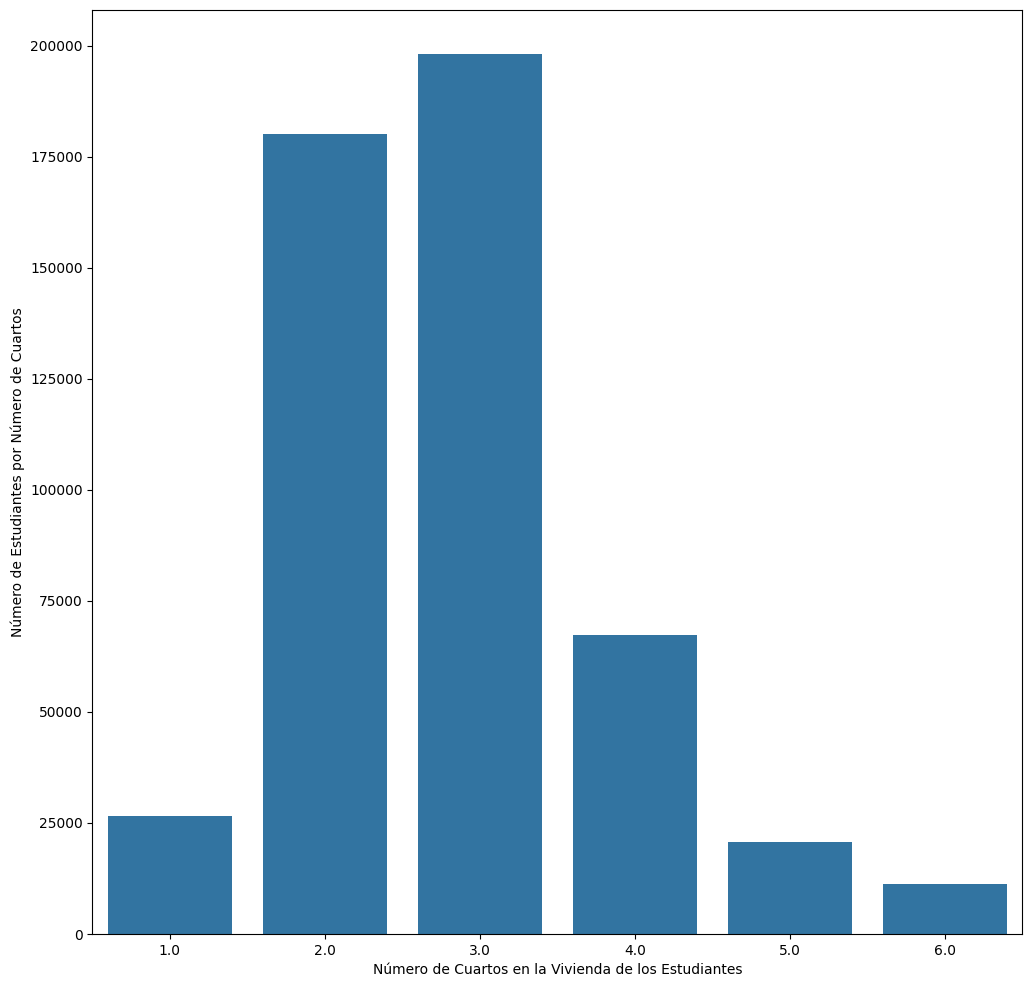

In [30]:
cuartos_casa_conteo = icfes['num_cuartos_casa'].dropna()

plt.figure(figsize=(12, 12))
sns.countplot(x=cuartos_casa_conteo)

plt.ylabel('Número de Estudiantes por Número de Cuartos')
plt.xlabel('Número de Cuartos en la Vivienda de los Estudiantes')
plt.show()

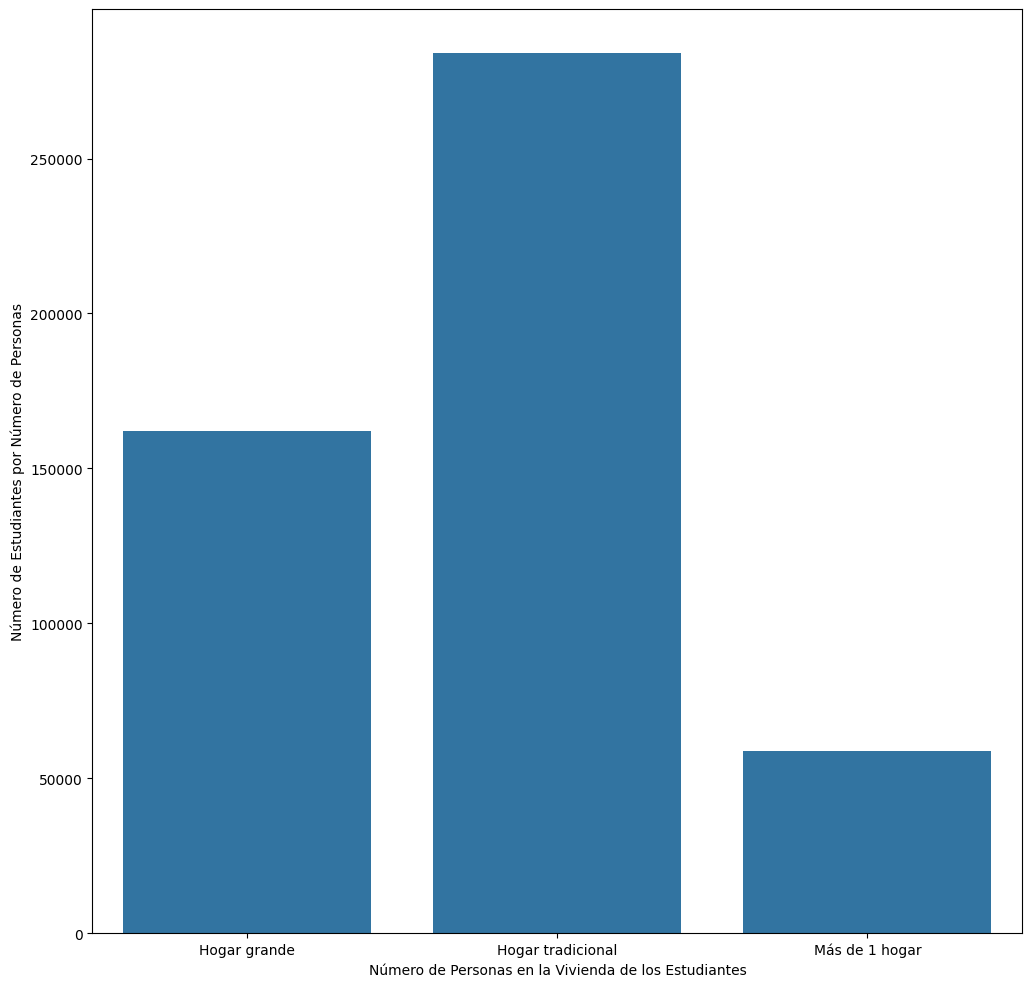

In [31]:
plt.figure(figsize=(12,12))
sns.countplot(x = 'num_personas_casa', data = icfes, order = sorted(icfes['num_personas_casa'].dropna().unique()))
plt.ylabel('Número de Estudiantes por Número de Personas')
plt.xlabel('Número de Personas en la Vivienda de los Estudiantes')
plt.show()

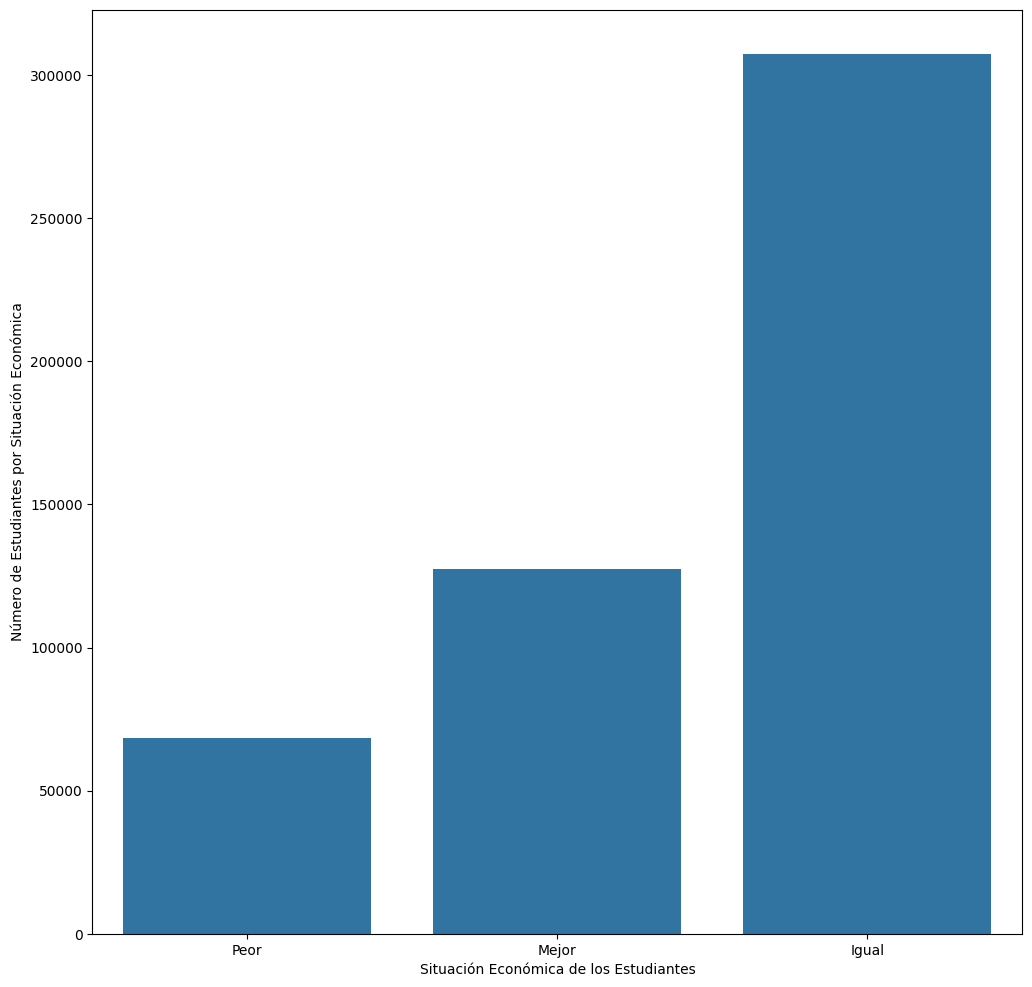

In [32]:
situacion_economica_conteo = icfes['situacion_economica_casa'].dropna()

plt.figure(figsize=(12, 12))
sns.countplot(x=situacion_economica_conteo)

plt.ylabel('Número de Estudiantes por Situación Económica')
plt.xlabel('Situación Económica de los Estudiantes')
plt.show()

In [33]:
def plot_categorical_distribution(df, column, title, xlabel, ylabel):
    plt.figure(figsize=(12, 8))
    sns.countplot(x=df[column].dropna(), order=df[column].value_counts().index)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.show()

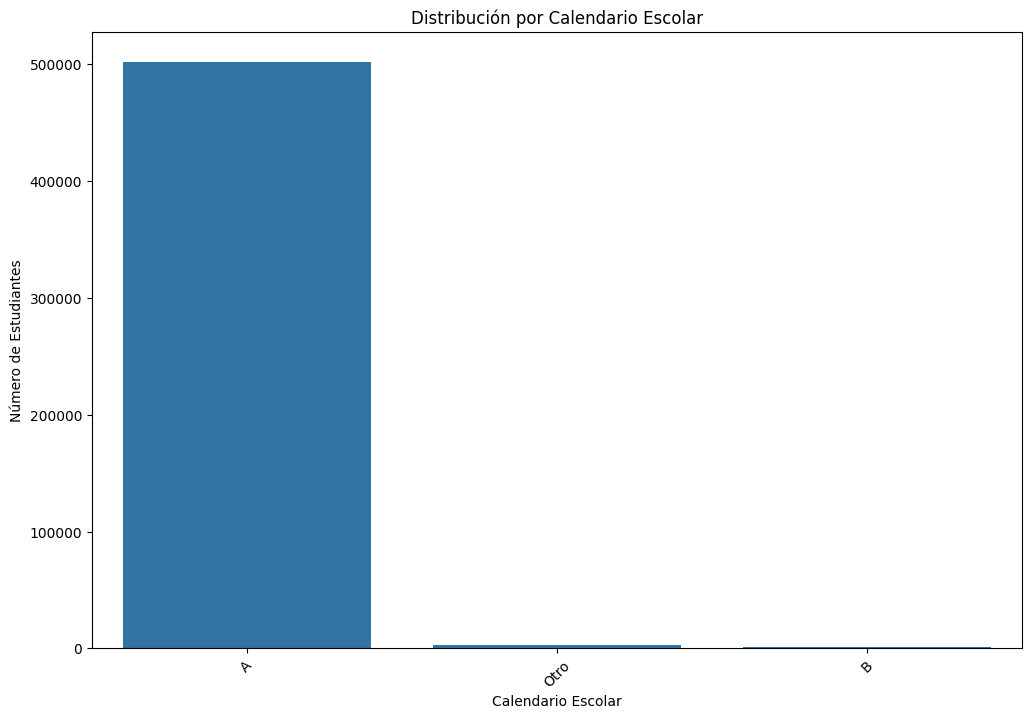

In [34]:
plot_categorical_distribution(icfes, 'colegio_calendario', 'Distribución por Calendario Escolar', 'Calendario Escolar', 'Número de Estudiantes')

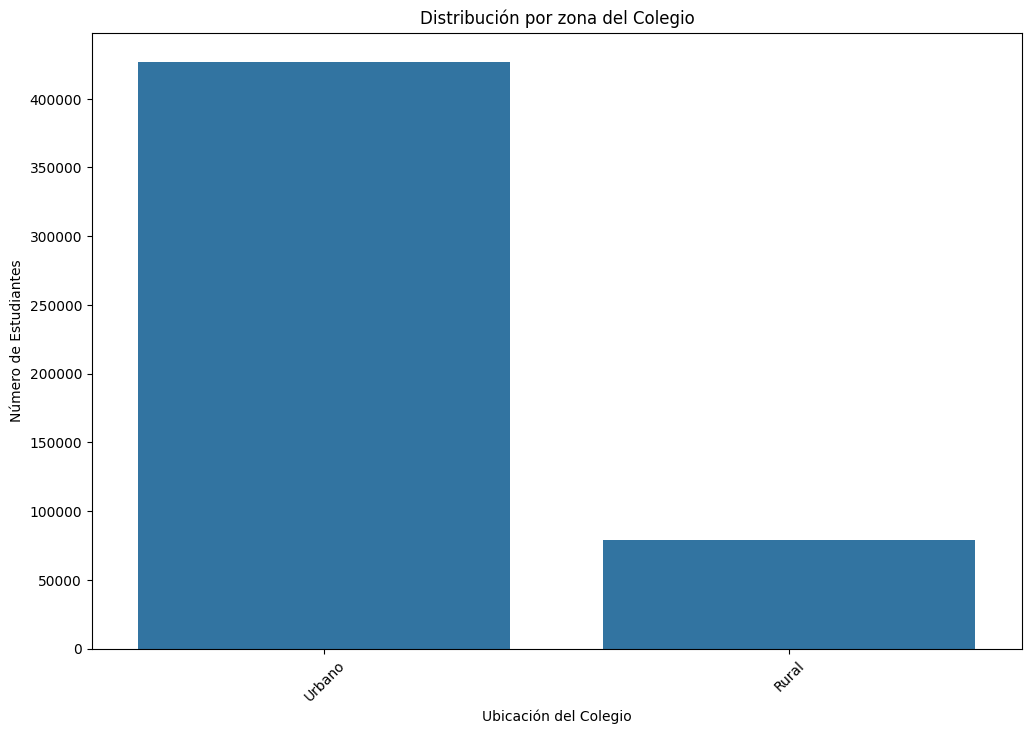

In [35]:
plot_categorical_distribution(icfes, 'colegio_area', 'Distribución por zona del Colegio', 'Ubicación del Colegio', 'Número de Estudiantes')

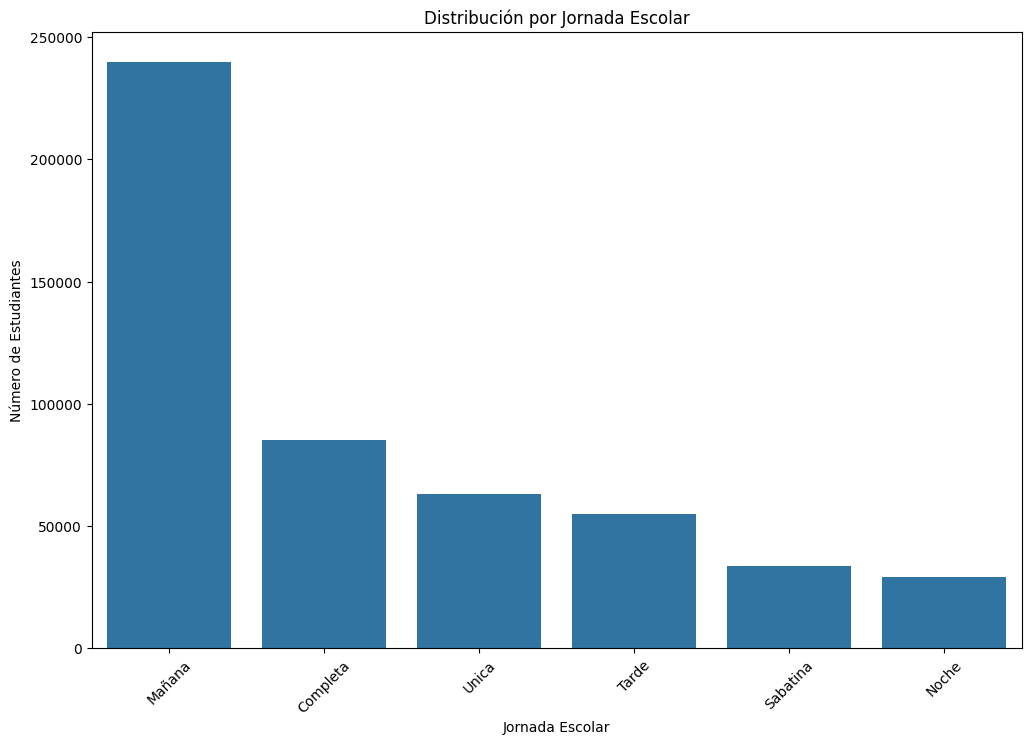

In [36]:
plot_categorical_distribution(icfes, 'colegio_jornada', 'Distribución por Jornada Escolar', 'Jornada Escolar', 'Número de Estudiantes')

## 2. ANÁLISIS BIVARIADO

### 2.1 ANÁLISIS DE CORRELACIÓN LINEAL

In [37]:
from scipy.stats import spearmanr

def analisis_correlacion(df, target, num_vars=None):
    if num_vars is None:
        # Detectar solo numéricas
        num_vars = df.select_dtypes(include=np.number).columns.tolist()
    
    # Quitar el target de la lista si está ahí
    num_vars = [v for v in num_vars if v != target]

    resultados = []

    for var in num_vars:
        x = df[var]
        y = df[target]

        # Correlación de Pearson
        pearson = x.corr(y, method='pearson')

        # Correlación de Spearman
        # spearmanr devuelve r, p_value
        spear_r, spear_p = spearmanr(x, y, nan_policy='omit')

        # Interpretación de fuerza (Pearson)
        fuerza = ""
        if abs(pearson) < 0.1:
            fuerza = "Muy débil"
        elif abs(pearson) < 0.3:
            fuerza = "Débil"
        elif abs(pearson) < 0.5:
            fuerza = "Moderada"
        elif abs(pearson) < 0.7:
            fuerza = "Fuerte"
        else:
            fuerza = "Muy fuerte"

        direccion = "Positiva" if pearson > 0 else "Negativa" if pearson < 0 else "Nula"

        resultados.append({
            "Variable": var,
            "Pearson": round(pearson, 3),
            "Spearman": round(spear_r, 3),
            "Fuerza (Pearson)": fuerza,
            "Dirección (Pearson)": direccion
        })

    return pd.DataFrame(resultados).sort_values(by="Pearson", ascending=False)


In [38]:
# Crear máscara para las columnas a eliminar
mask = (icfes.columns.str.startswith('puntaje_') & (icfes.columns != 'puntaje_global')) | icfes.columns.str.startswith('percentil_') | icfes.columns.str.startswith('nivel_')

# Drop solo de esas columnas, pero dejando el target
correlaciones = icfes.drop(icfes.columns[mask], axis=1)

# Ahora sí, el target sigue estando disponible
analisis_correlacion(correlaciones, target='puntaje_global')

,Variable,Pearson,Spearman,Fuerza (Pearson),Dirección (Pearson)
12,inse_estudiante,0.45,0.43,Moderada,Positiva
14,nse_colegio,0.44,0.42,Moderada,Positiva
13,nse_estudiante,0.41,0.40,Moderada,Positiva
6,computador,0.29,0.29,Débil,Positiva
4,internet,0.29,0.29,Débil,Positiva
9,carro,0.20,0.19,Débil,Positiva
3,estrato_casa,0.20,0.20,Débil,Positiva
8,microndas,0.17,0.17,Débil,Positiva
11,consola,0.17,0.16,Débil,Positiva
7,lavadora,0.16,0.16,Débil,Positiva


### 2.2 VISUALIZACIONES DE RELACIONES BIVARIADAS

#### 2.2.1 PUNTAJE Y ESTRATO ECONÓMICO

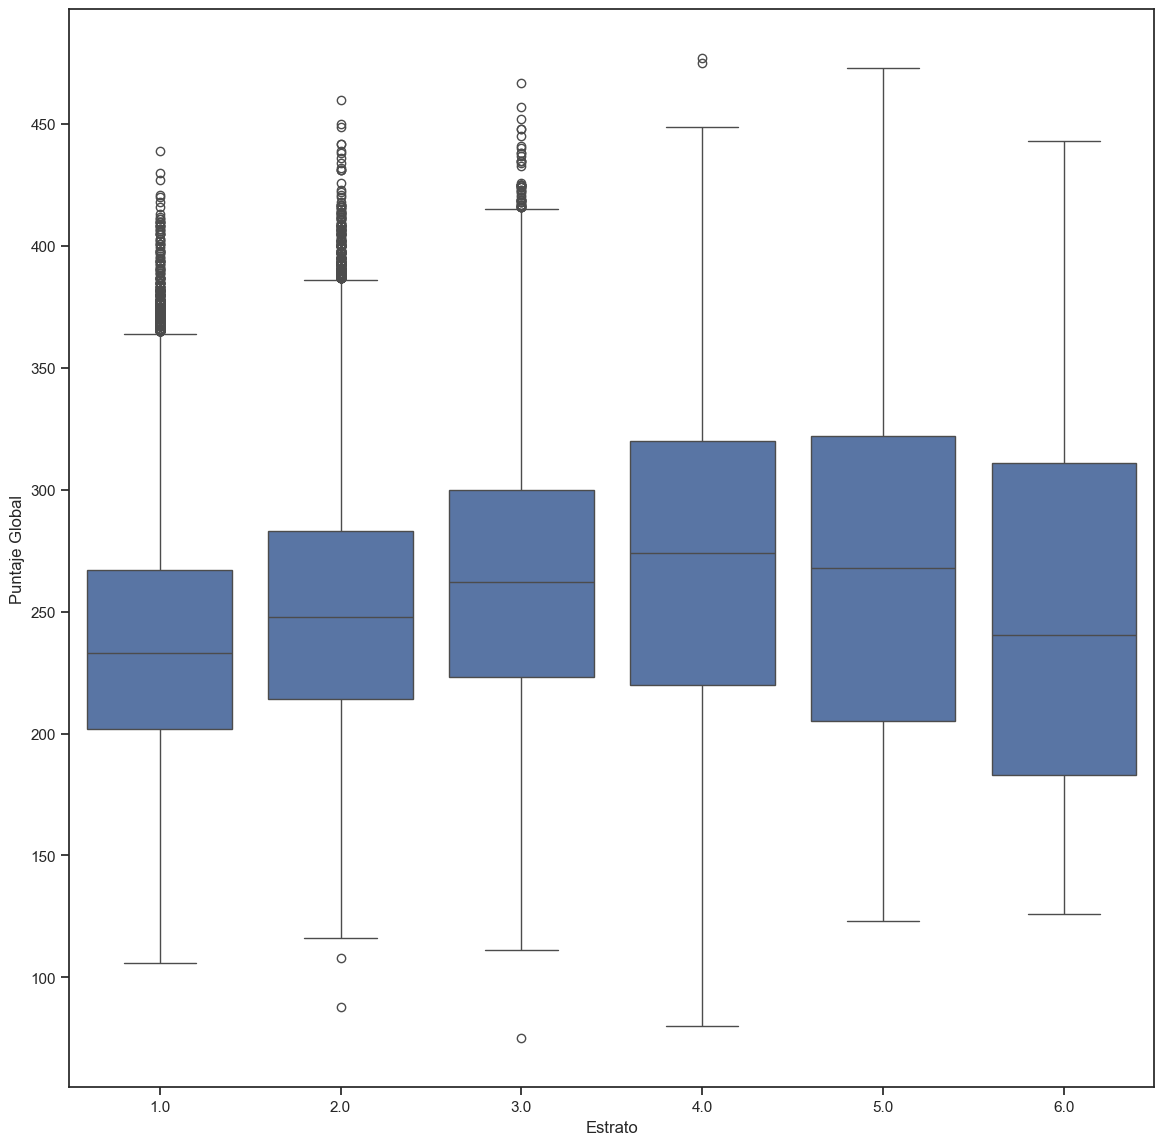

In [39]:
## Puntaje del ICFES en función del estrato de la vivienda del estudiante

plt.figure(figsize = (14,14))
sns.set_theme(style="ticks")

sns.boxplot(x = "estrato_casa", y = "puntaje_global",
            data = icfes)

plt.xlabel('Estrato')
plt.ylabel('Puntaje Global')
plt.show()

In [40]:
icfes['estrato_casa'] = icfes['estrato_casa'].astype('category')

In [41]:
icfes['estrato_casa'].value_counts(dropna=False).sort_index(ascending=True)

estrato_casa
1.00    156890
2.00    184575
3.00    106361
4.00     25241
5.00      7821
6.00      3618
NaN      21550
Name: count, dtype: int64

In [42]:
icfes.sample(5)

,nacionalidad,genero,region,etnia_estudiante,edad,grupo_edad,presento_fuera_edad,num_personas_casa,num_cuartos_casa,estrato_casa,tiempo_internet,internet,tv,computador,lavadora,microndas,carro,moto,consola,situacion_economica_casa,num_libros,tiempo_lectura,freq_leche_derivados,freq_carne_pescado_similares,freq_cereales_frutos_legumbres,nivel_edu_padre,actividad_padre,nivel_edu_madre,actividad_madre,horas_trabajo_semanal,tipo_remuneracion,colegio_genero,colegio_naturaleza,colegio_calendario,colegio_caracter,colegio_area,colegio_jornada,colegio_mpio,colegio_dpto,puntaje_lectura,percentil_lectura,puntaje_matematicas,percentil_matematicas,nivel_matematicas,puntaje_naturales,percentil_naturales,nivel_naturales,puntaje_sociales,percentil_sociales,nivel_sociales,puntaje_ingles,percentil_ingles,nivel_ingles,puntaje_global,percentil_global,inse_estudiante,nse_estudiante,nse_colegio
193630,Colombia,Masculino,Andina,No,17,15-19,0,Hogar grande,3.00,3.00,Moderado,0,1,0,1,0,0,1,0,Mejor,0-10,0-30 min,Óptimo,Aceptable,Óptimo,Primaria,Sin Actividad Remunerada,Bachiller Inc,Sector Primario,Trabajo Ocasional,Remuneración Monetaria,Mixto,Oficial,A,S,Rural,Completa,Salazar,Norte Santander,44,22,56,65,3,38,18,1,38,30,1,32.00,8,A-,215,30,42.69,2.00,2.00
274489,Colombia,Femenino,Caribe,No,17,15-19,0,Hogar grande,1.00,1.00,Promedio,0,1,0,1,0,1,1,0,Igual,11-25,30-60 min,Insuficiente,Aceptable,Muy Insuficiente,Bachiller Inc,Sin Actividad Remunerada,Bachiller Inc,Trabajadores Operativos,Tiempo Parcial Reducido,Sin Remuneración,Mixto,Oficial,A,S,Urbano,Tarde,Cereté,Cordoba,39,12,45,33,2,39,22,1,36,22,1,53.00,66,A1,204,23,45.35,2.00,2.00
137602,Colombia,Masculino,Andina,No,18,15-19,0,Hogar tradicional,3.00,3.00,Promedio,1,1,0,1,0,0,0,0,Igual,26-100,1-2h,Insuficiente,Aceptable,Insuficiente,Primaria Inc,Sin Actividad Remunerada,Primaria Inc,Trabajador Independiente,No Trabaja,No Aplica,Mixto,No Oficial,A,S,Urbano,Completa,Medellín,Antioquia,62,82,41,23,2,45,39,2,51,65,2,43.00,37,A-,246,52,45.09,2.00,3.00
17704,Colombia,Femenino,Andina,No,16,15-19,0,Hogar tradicional,3.00,2.00,Promedio,1,1,1,1,0,0,1,0,Igual,11-25,>2h,Insuficiente,Óptimo,Aceptable,Bachiller,Microempresario,Primaria Inc,Sin Información,Tiempo Parcial Reducido,Sin Remuneración,Mixto,Oficial,A,S,Urbano,Mañana,Puerto Berrío,Antioquia,43,21,38,16,2,44,36,2,35,21,1,30.00,5,A-,196,18,51.85,3.00,3.00
368520,Colombia,Masculino,Andina,No,19,15-19,0,Hogar tradicional,1.00,3.00,Promedio,0,1,1,1,0,0,0,0,Mejor,0-10,No lee,Insuficiente,Aceptable,Insuficiente,Bachiller,Trabajadores Operativos,Tecnico/Tecnologo Inc,Directivos,Trabajo Ocasional,Remuneración Monetaria,Mixto,Oficial,A,S,Urbano,Sabatina,Rionegro,Antioquia,54,57,55,63,3,64,92,3,48,57,2,66.00,91,A2,280,74,49.43,2.00,2.00


In [43]:
icfes['estrato_cat'] = icfes['estrato_casa'].replace({
    1: 'Bajo',
    2: 'Bajo',
    3: 'Medio',
    4: 'Medio',
    5: 'Alto',
    6: 'Alto'
})

In [44]:
# Ejemplo de análisis cruzado
pd.crosstab(icfes['estrato_cat'], icfes['colegio_naturaleza'], normalize='index', margins=True).style.format("{:.2f}")

colegio_naturaleza,No Oficial,Oficial
estrato_cat,,
Bajo,0.16,0.84
Medio,0.43,0.57
Alto,0.58,0.42
All,0.24,0.76


<Axes: xlabel='estrato_cat', ylabel='puntaje_global'>

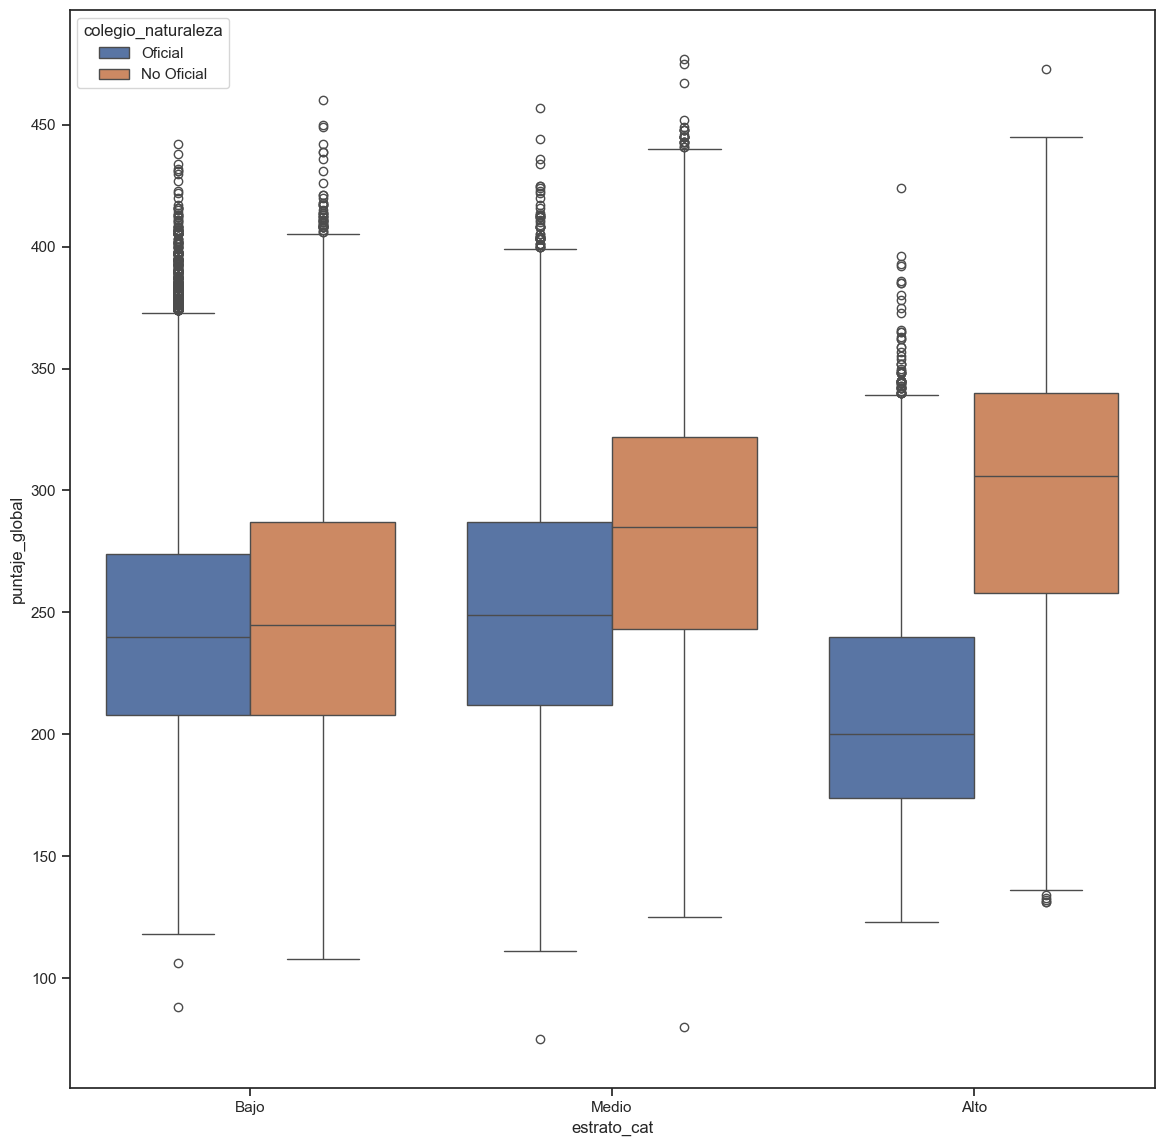

In [45]:
plt.figure(figsize = (14,14))
sns.boxplot(data=icfes, x='estrato_cat', y='puntaje_global', hue='colegio_naturaleza')

<Axes: xlabel='estrato_cat', ylabel='puntaje_global'>

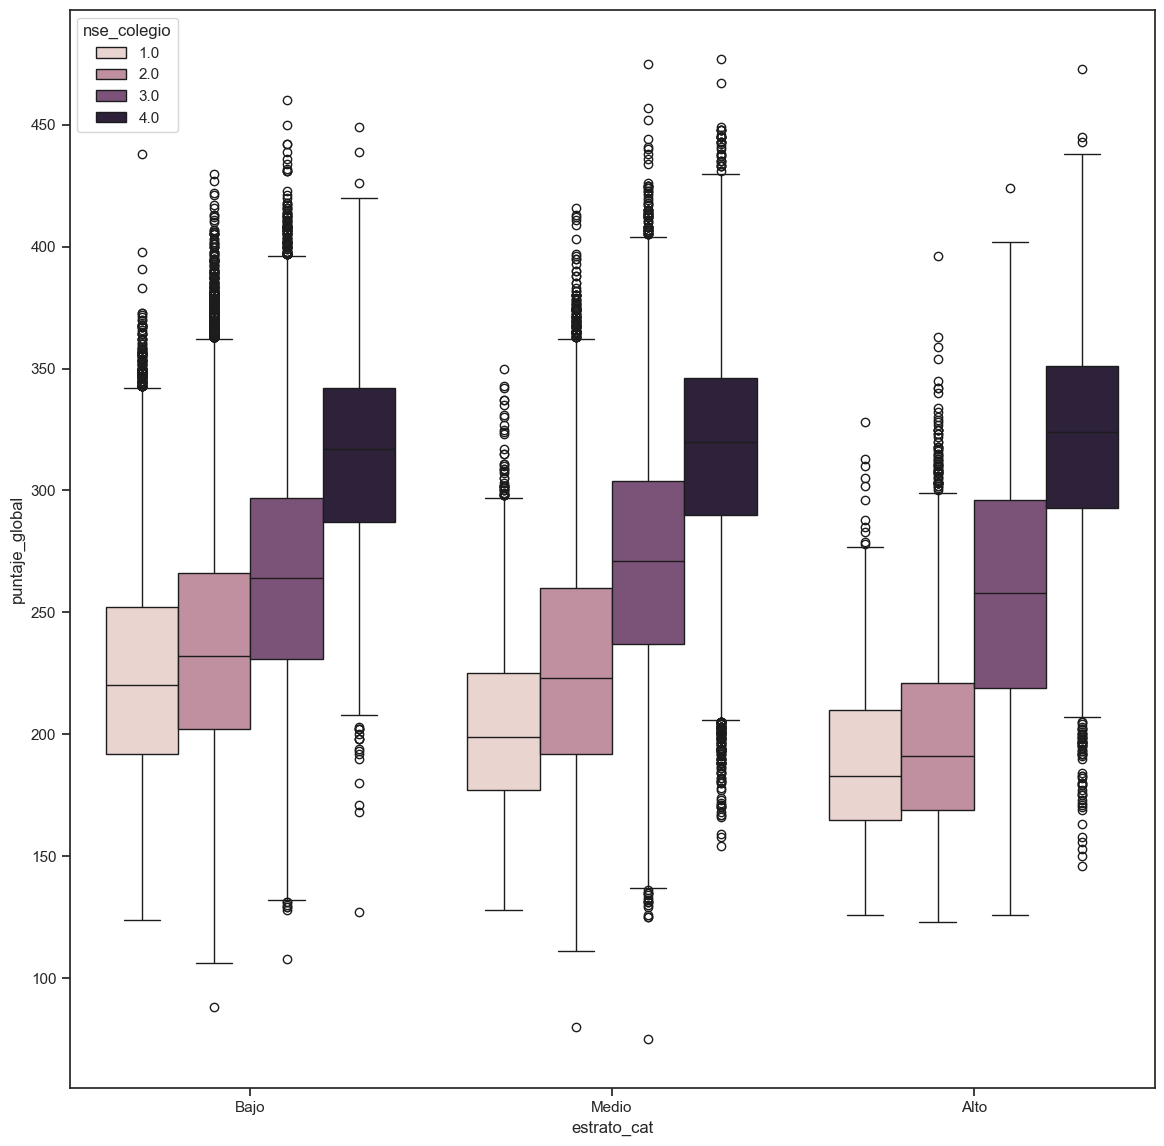

In [46]:
plt.figure(figsize = (14,14))
sns.boxplot(data=icfes, x='estrato_cat', y='puntaje_global', hue='nse_colegio')

In [47]:
pd.crosstab(icfes['nse_colegio'], icfes['colegio_naturaleza'], normalize='index', margins=True).style.format("{:.2f}")

colegio_naturaleza,No Oficial,Oficial
nse_colegio,,
1.000000,0.03,0.97
2.000000,0.10,0.90
3.000000,0.37,0.63
4.000000,1.00,0.00
All,0.24,0.76


In [48]:
estrato_casa_nse_colegio = icfes.groupby(["estrato_casa", "nse_colegio"]).size().unstack()

print(estrato_casa_nse_colegio)

nse_colegio    1.00    2.00   3.00  4.00
estrato_casa                            
1.00          19498  114450  22730   212
2.00           7305   96884  78599  1787
3.00           2214   29911  64637  9599
4.00            818    5932  10051  8440
5.00            390    2205   1967  3259
6.00            299    1377    653  1289


In [49]:
icfes_temp = icfes[(icfes['estrato_casa'] == 6) & (icfes['nse_colegio'] == 1)]

print(icfes_temp.shape)
icfes_temp.sample(7)

(299, 59)


,nacionalidad,genero,region,etnia_estudiante,edad,grupo_edad,presento_fuera_edad,num_personas_casa,num_cuartos_casa,estrato_casa,tiempo_internet,internet,tv,computador,lavadora,microndas,carro,moto,consola,situacion_economica_casa,num_libros,tiempo_lectura,freq_leche_derivados,freq_carne_pescado_similares,freq_cereales_frutos_legumbres,nivel_edu_padre,actividad_padre,nivel_edu_madre,actividad_madre,horas_trabajo_semanal,tipo_remuneracion,colegio_genero,colegio_naturaleza,colegio_calendario,colegio_caracter,colegio_area,colegio_jornada,colegio_mpio,colegio_dpto,puntaje_lectura,percentil_lectura,puntaje_matematicas,percentil_matematicas,nivel_matematicas,puntaje_naturales,percentil_naturales,nivel_naturales,puntaje_sociales,percentil_sociales,nivel_sociales,puntaje_ingles,percentil_ingles,nivel_ingles,puntaje_global,percentil_global,inse_estudiante,nse_estudiante,nse_colegio,estrato_cat
326652,Colombia,Femenino,Caribe,Zenú,17,15-19,0,Hogar grande,3.00,6.00,Ninguno,1,1,0,0,0,0,1,0,Igual,26-100,0-30 min,Óptimo,Insuficiente,Aceptable,Bachiller Inc,Sin Actividad Remunerada,Bachiller Inc,Sector Primario,Trabajo Ocasional,Sin Remuneración,Mixto,Oficial,A,S,Urbano,Mañana,San Andrés De Sotavento,Cordoba,40,14,35,11,1,40,25,1,23,1,1,31.00,8,A-,171,6,45.21,2.00,1.00,Alto
103928,Colombia,Masculino,Andina,No,18,15-19,0,Más de 1 hogar,3.00,6.00,Ninguno,0,0,0,1,0,0,0,0,Mejor,11-25,0-30 min,Muy Insuficiente,Insuficiente,Insuficiente,Bachiller Inc,Sector Primario,Bachiller Inc,Sector Primario,Trabajo Ocasional,Remuneración No Monetaria,Mixto,Oficial,A,S,Rural,Completa,San Pedro De Urabá,Antioquia,34,5,36,13,2,36,14,1,31,10,1,30.00,6,A-,170,6,35.40,1.00,1.00,Alto
491470,Colombia,Femenino,Pacífica,Otra,18,15-19,0,Más de 1 hogar,6.00,6.00,Ninguno,0,1,0,1,0,0,1,0,Mejor,11-25,30-60 min,Aceptable,Óptimo,Óptimo,Bachiller,Trabajadores Operativos,Bachiller,Sector Primario,Tiempo Completo,Remuneración Monetaria,Mixto,Oficial,A,N,Rural,Mañana,Totoró,Cauca,38,9,30,4,1,33,8,1,27,4,1,28.00,4,A-,158,3,45.84,2.00,1.00,Alto
131112,Colombia,Masculino,Pacífica,Afro,18,15-19,0,Hogar tradicional,2.00,6.00,Poco,1,1,0,0,1,0,0,1,Igual,26-100,30-60 min,Óptimo,Insuficiente,Muy Insuficiente,Ninguna,Sin Actividad Remunerada,Tecnico/Tecnologo,Microempresario,No Trabaja,No Aplica,Mixto,Oficial,A,S,Urbano,Mañana,Guapí,Cauca,44,24,50,47,2,39,20,1,35,20,1,24.00,1,A-,203,22,51.03,2.00,1.00,Alto
366840,Colombia,Femenino,Caribe,No,17,15-19,0,Hogar grande,2.00,6.00,Poco,1,1,0,1,1,0,0,0,Igual,11-25,30-60 min,Óptimo,Óptimo,Aceptable,Primaria Inc,Microempresario,Bachiller Inc,Sector Primario,No Trabaja,No Aplica,Mixto,Oficial,A,S,Rural,Mañana,San Onofre,Sucre,27,1,31,5,1,34,9,1,32,13,1,34.00,12,A-,156,2,50.49,2.00,1.00,Alto
487643,Colombia,Femenino,Caribe,Zenú,18,15-19,0,Más de 1 hogar,6.00,6.00,Promedio,0,1,0,0,0,0,0,0,Mejor,0-10,30-60 min,Insuficiente,Insuficiente,Insuficiente,Bachiller,Sin Información,Primaria,Sin Actividad Remunerada,Tiempo Parcial Reducido,Sin Remuneración,Mixto,Oficial,A,S,Rural,Mañana,San Andrés De Sotavento,Cordoba,34,4,24,1,1,33,8,1,34,17,1,23.00,1,A-,153,2,38.16,1.00,1.00,Alto
38568,Colombia,Femenino,Caribe,No,18,15-19,0,Hogar grande,3.00,6.00,Promedio,0,0,0,1,1,0,1,0,Igual,0-10,30-60 min,Insuficiente,Óptimo,Óptimo,Primaria,Sector Primario,Profesional,Sector Primario,None,Sin Remuneración,Mixto,Oficial,A,S,Rural,Unica,Lorica,Cordoba,41,17,36,11,2,41,26,2,36,24,1,31.00,8,A-,190,15,43.12,2.00,1.00,Alto


In [50]:
icfes_temp['colegio_area'].value_counts()

colegio_area
Rural     253
Urbano     46
Name: count, dtype: int64

In [51]:
# Analizar la distribución rural/urbana por estrato
pd.crosstab(icfes['estrato_casa'], icfes['colegio_area'], normalize='index', margins=True).style.format("{:.2f}")

colegio_area,Rural,Urbano
estrato_casa,,
1.000000,0.23,0.77
2.000000,0.12,0.88
3.000000,0.08,0.92
4.000000,0.12,0.88
5.000000,0.17,0.83
6.000000,0.21,0.79
All,0.15,0.85


In [52]:
pd.crosstab(icfes['nse_colegio'], icfes['colegio_area'], normalize='index', margins=True).style.format("{:.2f}")

colegio_area,Rural,Urbano
nse_colegio,,
1.000000,0.78,0.22
2.000000,0.17,0.83
3.000000,0.02,0.98
4.000000,0.10,0.90
All,0.16,0.84


In [53]:
icfes = icfes.astype({
    'nse_estudiante': 'category',
    'nse_colegio': 'category'
})

In [54]:
del icfes_temp

In [55]:
# Definir los bins manualmente con un cierre cerrado en 100
bins = [0, 100, 200, 300, 400, 500]

# Crear etiquetas para los rangos
labels = ["0-100", "101-200", "201-300", "301-400", "401-500"]

# Crear la nueva variable rango_puntaje
icfes['rango_puntaje'] = pd.cut(icfes['puntaje_global'], bins=bins, labels=labels, right=True, include_lowest=True)

In [56]:
puntajes_estrato = icfes.groupby(["estrato_casa", "rango_puntaje"]).size().unstack()

# Eliminar la fila correspondiente a "Ns/Nr"
puntajes_estrato = puntajes_estrato.dropna()

# Imprimir la tabla resultante
print(puntajes_estrato)

rango_puntaje  0-100  101-200  201-300  301-400  401-500
estrato_casa                                            
1.00               0    38025   104388    14442       35
2.00               1    30494   124977    29009       94
3.00               1    14327    65708    26166      159
4.00               1     4341    11928     8810      161
5.00               0     1811     3243     2716       51
6.00               0     1250     1328     1013       27


In [57]:
# Calcula la suma de cada fila (estrato-rango puntaje)
suma_puntajes_estrato = puntajes_estrato.sum(axis=1)

# Divide cada valor por la suma de su fila correspondiente
puntajes_normalizados = puntajes_estrato.div(suma_puntajes_estrato, axis=0)

# Multiplicamos por 100 para obtener porcentajes entre 0 y 100
puntajes_normalizados_porcentaje = puntajes_normalizados * 100

print(puntajes_normalizados_porcentaje)

rango_puntaje  0-100  101-200  201-300  301-400  401-500
estrato_casa                                            
1.00            0.00    24.24    66.54     9.21     0.02
2.00            0.00    16.52    67.71    15.72     0.05
3.00            0.00    13.47    61.78    24.60     0.15
4.00            0.00    17.20    47.26    34.90     0.64
5.00            0.00    23.16    41.47    34.73     0.65
6.00            0.00    34.55    36.71    28.00     0.75


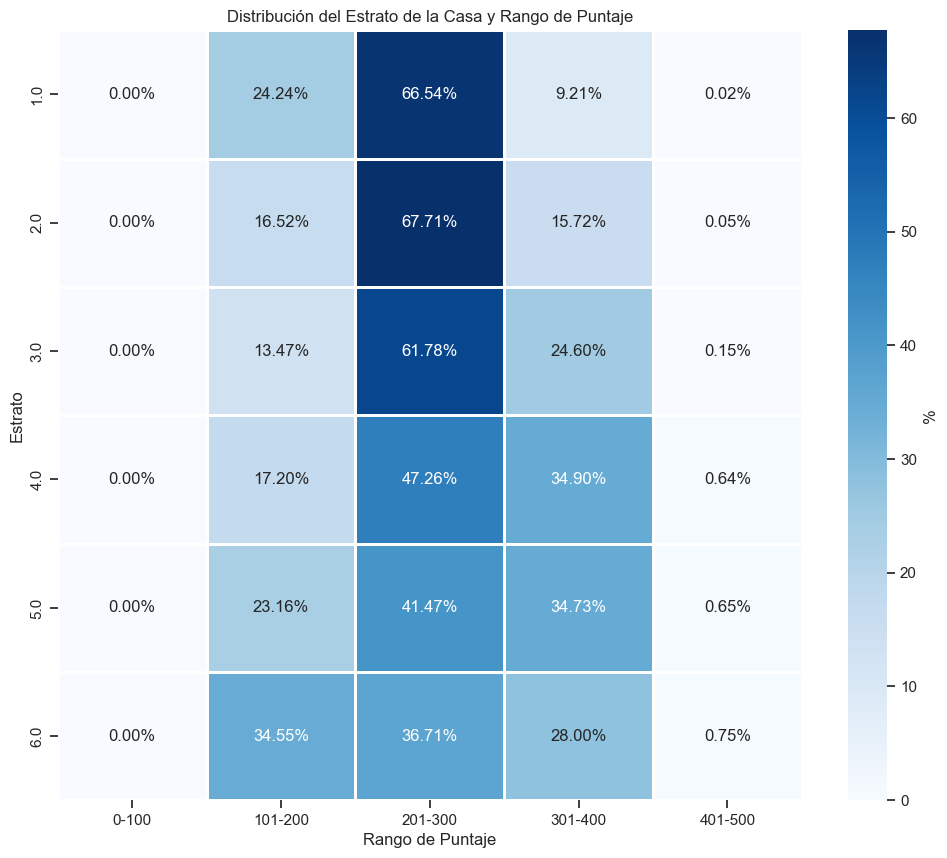

In [58]:
# Configura el tamaño de la figura
plt.figure(figsize=(12, 10))

# Crea el heatmap con Seaborn
heatmap = sns.heatmap(puntajes_normalizados_porcentaje, cmap='Blues', annot=True, 
                      fmt=".2f", linewidths=.9, cbar_kws={'label': '%'})

# Añade el símbolo '%' al lado de los valores en el heatmap
for text in heatmap.texts:
    text.set_text(text.get_text() + '%')

# Añade un título al gráfico
plt.title('Distribución del Estrato de la Casa y Rango de Puntaje')

# Añade etiquetas a los ejes x e y
plt.xlabel('Rango de Puntaje')
plt.ylabel('Estrato')

# Muestra el heatmap
plt.show()

##### CONCLUSIONES

- El análisis exploratorio reveló patrones complejos y no lineales en las variables socioeconómicas que afectan el rendimiento en las pruebas ICFES.

- Efecto del estrato socioeconómico: Se identificó una relación no lineal entre el estrato de la vivienda y el puntaje global del ICFES. Contrario a una progresión lineal esperada, el estrato 4 mostró el mejor rendimiento mediano, mientras que los estratos 5 y 6 presentaron desempeños inferiores con mayor variabilidad. Este hallazgo sugiere la existencia de un "efecto plateau" donde factores adicionales al nivel socioeconómico influyen en el rendimiento académico a partir de cierto umbral.

- Efecto del tipo de colegio: Los colegios no oficiales (privados) demostraron consistentemente mejor rendimiento que los oficiales (públicos). Sin embargo, esta diferencia varía significativamente según el estrato socioeconómico del estudiante, evidenciando una interacción importante entre ambas variables.

- Nivel socioeconómico del colegio (NSE): Se observó una relación positiva y casi lineal entre el NSE del colegio y el puntaje ICFES across todos los estratos. Los estudiantes de estratos bajos mostraron los mayores beneficios relativos al asistir a colegios con NSE alto, aunque el efecto fue positivo en todos los segmentos socioeconómicos.

- Factores geográficos: Un hallazgo notable fue la identificación de estudiantes de estratos altos (5-6) en colegios de NSE bajo (1-2), explicado principalmente por su ubicación en zonas rurales donde la oferta educativa está limitada geográficamente, independientemente de la capacidad económica familiar.

- Recomendaciones para el modelo: Basado en estos hallazgos, se propone la creación de variables de interacción que capturen las relaciones complejas entre: (1) estrato socioeconómico recodificado, (2) naturaleza del colegio, (3) NSE del colegio, y (4) zona geográfica, para maximizar el poder predictivo del modelo Random Forest.

#### 2.2.2 EDUCACIÓN EN EL HOGAR

In [59]:
icfes.head(5)

,nacionalidad,genero,region,etnia_estudiante,edad,grupo_edad,presento_fuera_edad,num_personas_casa,num_cuartos_casa,estrato_casa,tiempo_internet,internet,tv,computador,lavadora,microndas,carro,moto,consola,situacion_economica_casa,num_libros,tiempo_lectura,freq_leche_derivados,freq_carne_pescado_similares,freq_cereales_frutos_legumbres,nivel_edu_padre,actividad_padre,nivel_edu_madre,actividad_madre,horas_trabajo_semanal,tipo_remuneracion,colegio_genero,colegio_naturaleza,colegio_calendario,colegio_caracter,colegio_area,colegio_jornada,colegio_mpio,colegio_dpto,puntaje_lectura,percentil_lectura,puntaje_matematicas,percentil_matematicas,nivel_matematicas,puntaje_naturales,percentil_naturales,nivel_naturales,puntaje_sociales,percentil_sociales,nivel_sociales,puntaje_ingles,percentil_ingles,nivel_ingles,puntaje_global,percentil_global,inse_estudiante,nse_estudiante,nse_colegio,estrato_cat,rango_puntaje
0,Colombia,Masculino,Caribe,No,17,15-19,0,Hogar grande,5.00,3.00,Moderado,1,1,0,1,1,0,0,0,Peor,>100,30-60 min,Insuficiente,Aceptable,Muy Insuficiente,Profesional,Sin Actividad Remunerada,Bachiller,No Aplica,Trabajo Ocasional,Remuneración Monetaria,Mixto,Oficial,A,S,Urbano,Mañana,Santa Ana,Magdalena,47,33,48,42,2,37,15,1,30,8,1,54.00,67,A1,208,25,50.94,2.00,2.00,Medio,201-300
1,Colombia,Masculino,Andina,No,16,15-19,0,Más de 1 hogar,3.00,3.00,Moderado,1,1,1,1,1,1,0,0,Mejor,>100,30-60 min,Óptimo,Aceptable,Insuficiente,Tecnico/Tecnologo,Microempresario,Tecnico/Tecnologo,Trabajador Independiente,Trabajo Ocasional,Remuneración Monetaria,Mixto,No Oficial,A,S,Urbano,Completa,Bogotá D.C.,Bogotá,60,76,65,88,3,54,71,2,59,83,3,63.00,88,A2,299,83,59.76,3.00,4.00,Medio,201-300
2,Colombia,Masculino,Caribe,No,18,15-19,0,Hogar grande,2.00,1.00,Mucho,0,1,0,1,0,0,0,0,Igual,26-100,30-60 min,Óptimo,Óptimo,Aceptable,Bachiller,Trabajadores Operativos,Bachiller,Trabajadores Operativos,No Trabaja,No Aplica,Mixto,Oficial,A,S,Urbano,Mañana,Cartagena De Indias,Bolivar,66,91,57,70,3,41,29,2,74,99,4,64.00,89,A2,299,84,50.76,2.00,3.00,Bajo,201-300
3,Colombia,Masculino,Andina,No,17,15-19,0,Hogar tradicional,2.00,3.00,Moderado,0,0,1,0,0,0,0,0,Igual,11-25,0-30 min,Óptimo,Óptimo,Aceptable,Primaria Inc,Microempresario,Bachiller,No Aplica,Tiempo Completo,Remuneración Monetaria,Mixto,Oficial,A,S,Urbano,Mañana,Bogotá D.C.,Bogotá,62,81,54,60,3,61,87,3,73,99,4,53.00,67,A1,309,88,45.77,2.00,3.00,Medio,301-400
4,Colombia,Masculino,Andina,No,17,15-19,0,Hogar tradicional,4.00,3.00,Mucho,1,1,1,1,1,0,0,0,Mejor,26-100,No lee,Óptimo,Muy Insuficiente,Óptimo,Bachiller,Sin Actividad Remunerada,Bachiller Inc,Sin Actividad Remunerada,Tiempo Completo,Sin Remuneración,Mixto,Oficial,A,S,Urbano,Mañana,Bogotá D.C.,Bogotá,63,85,57,70,3,55,74,2,57,79,3,52.00,63,A1,288,78,52.91,3.00,3.00,Medio,201-300


In [60]:
## Educación Conjunta en el Hogar
# Crear la lista de condiciones
condiciones = [
    # Sin información
    (icfes['nivel_edu_madre'].isna()) & (icfes['nivel_edu_padre'].isna()),
    
    # No aplica
    (icfes['nivel_edu_madre'] == 'No aplica') | (icfes['nivel_edu_padre'] == 'No aplica'),
    
    # Educación Superior
    (icfes['nivel_edu_madre'].isin(['Profesional', 'Postgrado'])) | 
    (icfes['nivel_edu_padre'].isin(['Profesional', 'Postgrado'])),
    
    # Educación Técnica
    (icfes['nivel_edu_madre'] == 'Tecnico/Tecnologo') | 
    (icfes['nivel_edu_padre'] == 'Tecnico/Tecnologo'),
    
    # Bachillerato Completo
    (icfes['nivel_edu_madre'] == 'Bachiller') & 
    (icfes['nivel_edu_padre'] == 'Bachiller'),
    
    # Al Menos Un Bachiller
    (icfes['nivel_edu_madre'] == 'Bachiller') | 
    (icfes['nivel_edu_padre'] == 'Bachiller'),
    
    # Educación Primaria
    (icfes['nivel_edu_madre'] == 'Primaria') | 
    (icfes['nivel_edu_padre'] == 'Primaria'),
    
    # Educación Primaria Incompleta
    (icfes['nivel_edu_madre'] == 'Primaria Inc') |
    (icfes['nivel_edu_padre'] == 'Primaria Inc'),
    
    # Educación Secundaria Incompleta
    (icfes['nivel_edu_madre'] == 'Bachiller Inc') |
    (icfes['nivel_edu_padre'] == 'Bachiller Inc'),
    
    # Educación Superior Incompleta
    (icfes['nivel_edu_madre'].isin(['Tecnico/Tecnologo Inc', 'Profesional Inc'])) |
    (icfes['nivel_edu_padre'].isin(['Tecnico/Tecnologo Inc', 'Profesional Inc'])),
    
    # Sin Educación Formal
    (icfes['nivel_edu_madre'] == 'Ninguna') | 
    (icfes['nivel_edu_padre'] == 'Ninguna')
]

# Crear la lista de valores correspondientes
valores = [
    'Sin Información',
    'No Aplica',
    'Educación Superior',
    'Educación Técnica',
    'Bachillerato Completo',
    'Al Menos Un Bachiller',
    'Educación Primaria',
    'Educación Primaria Incompleta',
    'Educación Secundaria Incompleta',
    'Educación Superior Incompleta',
    'Sin Educación Formal'
]

# Crear la nueva variable usando np.select
icfes['educacion_padres'] = np.select(condiciones, valores, default='Otros Casos')

# Ver la distribución y estadísticas
print("\nDistribución de categorías:")
print(icfes['educacion_padres'].value_counts())


Distribución de categorías:
educacion_padres
Al Menos Un Bachiller              96992
Educación Superior                 87039
Educación Primaria Incompleta      81323
Educación Primaria                 62683
Educación Técnica                  59702
Bachillerato Completo              55136
Educación Secundaria Incompleta    36186
Educación Superior Incompleta       7462
No Aplica                           7409
Sin Educación Formal                6438
Sin Información                     5686
Name: count, dtype: int64


In [61]:
print(icfes.groupby('educacion_padres')['puntaje_global'].agg(['count', 'mean', 'std']).round(2))

                                 count   mean   std
educacion_padres                                   
Al Menos Un Bachiller            96992 243.96 46.52
Bachillerato Completo            55136 246.97 47.68
Educación Primaria               62683 230.53 44.63
Educación Primaria Incompleta    81323 226.29 43.01
Educación Secundaria Incompleta  36186 236.22 45.95
Educación Superior               87039 278.88 54.27
Educación Superior Incompleta     7462 263.70 51.67
Educación Técnica                59702 264.69 47.01
No Aplica                         7409 251.82 51.89
Sin Educación Formal              6438 203.82 39.98
Sin Información                   5686 243.34 56.81


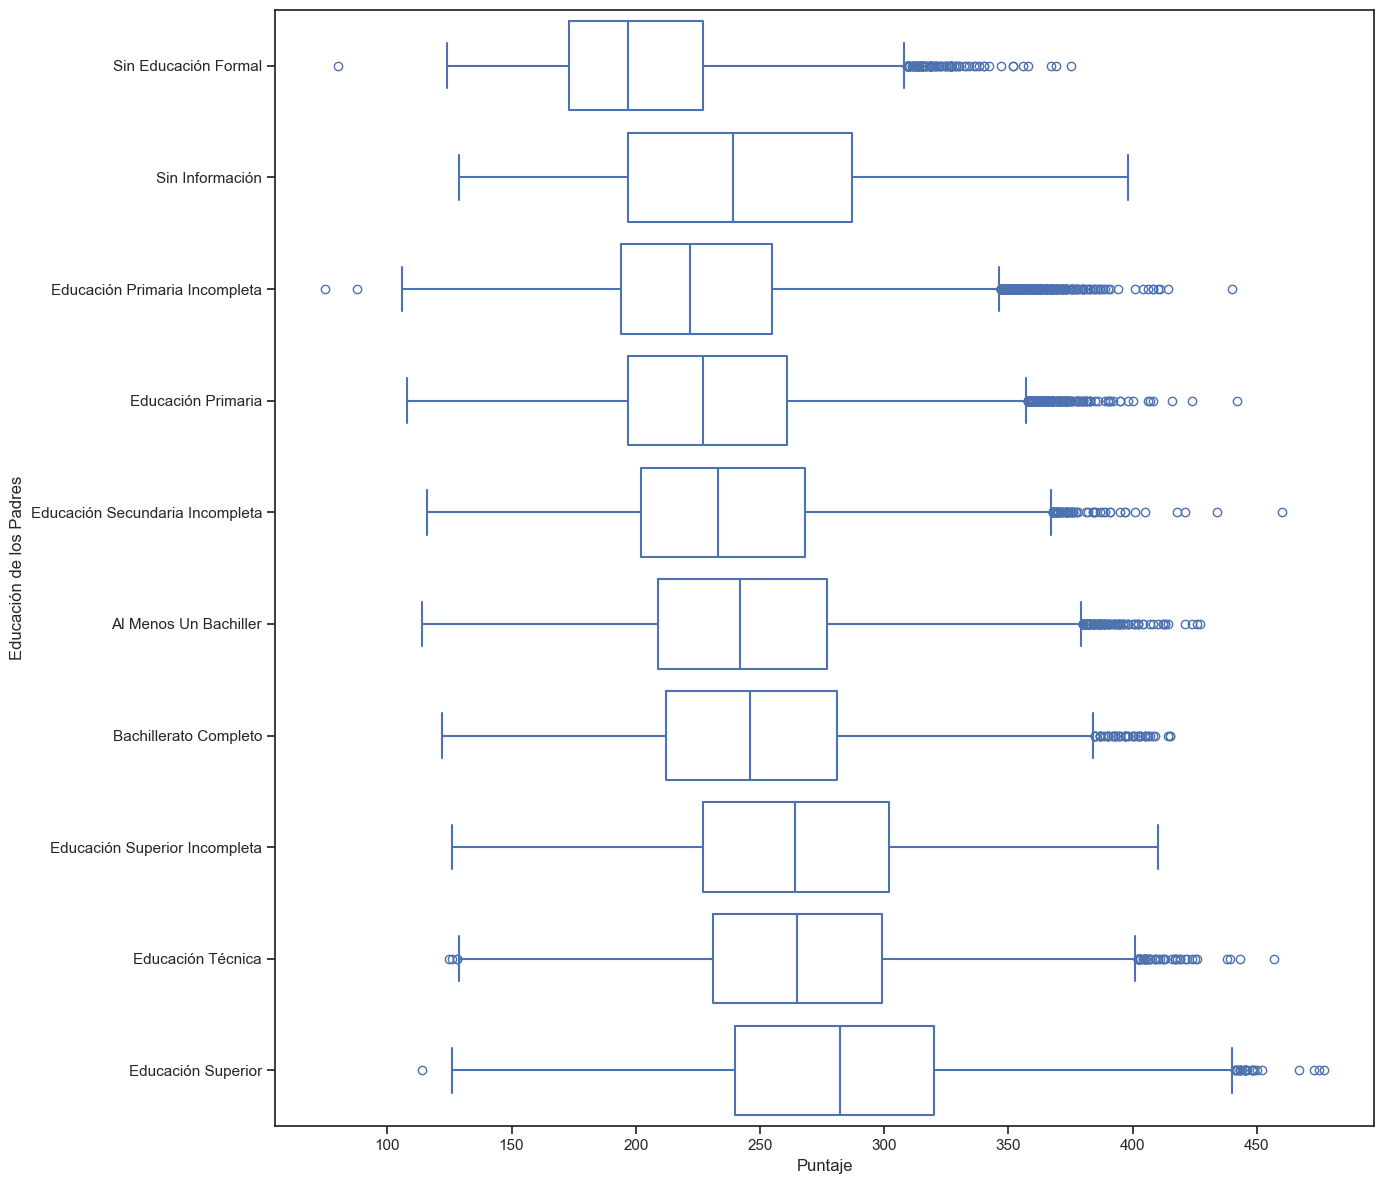

In [62]:
orden_educativo = ['Sin Educación Formal', 'Sin Información', 'Educación Primaria Incompleta', 'Educación Primaria', 
                  'Educación Secundaria Incompleta', 'Al Menos Un Bachiller', 'Bachillerato Completo', 
                  'Educación Superior Incompleta', 'Educación Técnica', 'Educación Superior']

plt.figure(figsize=(14, 12))  # Ajustado el tamaño para mejor visualización horizontal
sns.set_theme(style="ticks")  # Aplicar un tema
sns.color_palette("husl", 9)

# Cambiar x por y para hacer el gráfico horizontal
sns.boxplot(y = 'educacion_padres', x = 'puntaje_global', data = icfes, order = orden_educativo, fill = False)

plt.ylabel('Educación de los Padres')  # Ahora es ylabel en lugar de xlabel
plt.xlabel('Puntaje')  # Ahora es xlabel en lugar de ylabel

# Ajustar el layout para asegurar que todas las etiquetas sean visibles
plt.tight_layout()

plt.show()

In [63]:
icfes.shape

(506056, 61)

In [64]:
icfes.sample(7)

,nacionalidad,genero,region,etnia_estudiante,edad,grupo_edad,presento_fuera_edad,num_personas_casa,num_cuartos_casa,estrato_casa,tiempo_internet,internet,tv,computador,lavadora,microndas,carro,moto,consola,situacion_economica_casa,num_libros,tiempo_lectura,freq_leche_derivados,freq_carne_pescado_similares,freq_cereales_frutos_legumbres,nivel_edu_padre,actividad_padre,nivel_edu_madre,actividad_madre,horas_trabajo_semanal,tipo_remuneracion,colegio_genero,colegio_naturaleza,colegio_calendario,colegio_caracter,colegio_area,colegio_jornada,colegio_mpio,colegio_dpto,puntaje_lectura,percentil_lectura,puntaje_matematicas,percentil_matematicas,nivel_matematicas,puntaje_naturales,percentil_naturales,nivel_naturales,puntaje_sociales,percentil_sociales,nivel_sociales,puntaje_ingles,percentil_ingles,nivel_ingles,puntaje_global,percentil_global,inse_estudiante,nse_estudiante,nse_colegio,estrato_cat,rango_puntaje,educacion_padres
20137,Colombia,Femenino,Caribe,No,17,15-19,0,Hogar tradicional,1.00,1.00,Moderado,0,0,0,0,0,0,1,0,Peor,0-10,30-60 min,Insuficiente,Aceptable,Muy Insuficiente,Bachiller,Sin Actividad Remunerada,Bachiller,No Aplica,No Trabaja,No Aplica,Mixto,Oficial,A,N,Urbano,Mañana,San Pedro,Sucre,73,99,70,96,3,60,85,3,63,91,3,62.00,86,A2,331,94,38.86,1.00,2.00,Bajo,301-400,Bachillerato Completo
347919,Venezuela,Femenino,Andina,No,19,15-19,0,Hogar grande,2.00,1.00,Moderado,0,0,0,0,0,0,1,0,Igual,0-10,0-30 min,Insuficiente,Óptimo,Aceptable,Primaria Inc,Sin Actividad Remunerada,Bachiller,Trabajadores Operativos,No Trabaja,No Aplica,Mixto,Oficial,A,S,Urbano,Unica,Toledo,Norte Santander,37,9,42,25,2,48,51,2,30,8,1,34.00,13,A-,194,17,40.42,1.00,2.00,Bajo,101-200,Al Menos Un Bachiller
308317,Colombia,Femenino,Pacífica,No,16,15-19,0,Hogar tradicional,3.00,1.00,Poco,0,1,0,0,0,0,0,0,Igual,26-100,30-60 min,Óptimo,Insuficiente,Óptimo,Primaria Inc,Sin Actividad Remunerada,Primaria Inc,Sector Primario,No Trabaja,No Aplica,Mixto,Oficial,A,S,Rural,Tarde,Piendamó - Tunía,Cauca,67,92,53,58,3,58,81,3,69,97,3,54.00,68,A1,306,86,39.17,1.00,2.00,Bajo,301-400,Educación Primaria Incompleta
445681,Colombia,Femenino,Caribe,No,17,15-19,0,Más de 1 hogar,3.00,1.00,Mucho,0,1,0,1,0,0,0,0,Igual,0-10,30-60 min,Aceptable,Óptimo,Insuficiente,Primaria Inc,Trabajadores Operativos,Primaria Inc,Sector Primario,No Trabaja,No Aplica,Mixto,Oficial,A,S,Urbano,Mañana,Barranquilla,Atlantico,39,12,49,45,2,35,12,1,26,3,1,45.00,41,A-,189,14,41.05,1.00,2.00,Bajo,101-200,Educación Primaria Incompleta
373597,Colombia,Femenino,Pacífica,No,17,15-19,0,Hogar tradicional,3.00,3.00,Poco,1,1,1,1,1,1,1,0,Igual,0-10,No lee,Insuficiente,Óptimo,Aceptable,Profesional,Profesionales,Profesional,Profesionales,No Trabaja,No Aplica,Mixto,Oficial,A,S,Urbano,Mañana,Cali,Valle,48,36,51,52,3,49,55,2,42,40,2,52.00,63,A1,239,47,67.41,4.00,3.00,Medio,201-300,Educación Superior
333676,Colombia,Femenino,Andina,No,21,20-24,1,Hogar tradicional,3.00,3.00,Moderado,0,1,0,1,0,0,1,0,Igual,>100,No lee,Aceptable,Óptimo,Óptimo,Bachiller Inc,Trabajadores Operativos,Tecnico/Tecnologo,No Aplica,No Trabaja,No Aplica,Mixto,Oficial,A,N,Urbano,Noche,Marinilla,Antioquia,43,21,48,41,2,37,17,1,46,52,2,30.00,6,A-,212,28,50.67,2.00,2.00,Medio,201-300,Educación Técnica
168149,Colombia,Masculino,Caribe,No,16,15-19,0,Hogar tradicional,2.00,3.00,Promedio,0,1,0,1,1,0,1,0,Igual,11-25,1-2h,Óptimo,Aceptable,Aceptable,Bachiller Inc,Sin Actividad Remunerada,Bachiller Inc,Sector Primario,Medio Tiempo,Remuneración Monetaria,Mixto,Oficial,A,S,Rural,Tarde,Puerto Escondido,Cordoba,63,84,58,73,3,64,92,3,51,65,2,52.00,64,A1,292,80,45.25,2.00,1.00,Medio,201-300,Educación Secundaria Incompleta


#### 2.2.3 HÁBITOS DEL ESTUDIANTE

In [65]:
icfes.sample(6)

,nacionalidad,genero,region,etnia_estudiante,edad,grupo_edad,presento_fuera_edad,num_personas_casa,num_cuartos_casa,estrato_casa,tiempo_internet,internet,tv,computador,lavadora,microndas,carro,moto,consola,situacion_economica_casa,num_libros,tiempo_lectura,freq_leche_derivados,freq_carne_pescado_similares,freq_cereales_frutos_legumbres,nivel_edu_padre,actividad_padre,nivel_edu_madre,actividad_madre,horas_trabajo_semanal,tipo_remuneracion,colegio_genero,colegio_naturaleza,colegio_calendario,colegio_caracter,colegio_area,colegio_jornada,colegio_mpio,colegio_dpto,puntaje_lectura,percentil_lectura,puntaje_matematicas,percentil_matematicas,nivel_matematicas,puntaje_naturales,percentil_naturales,nivel_naturales,puntaje_sociales,percentil_sociales,nivel_sociales,puntaje_ingles,percentil_ingles,nivel_ingles,puntaje_global,percentil_global,inse_estudiante,nse_estudiante,nse_colegio,estrato_cat,rango_puntaje,educacion_padres
276351,Colombia,Femenino,Pacífica,No,18,15-19,0,Hogar tradicional,3.00,3.00,Poco,1,1,1,1,1,1,0,0,Igual,0-10,0-30 min,Aceptable,Óptimo,Insuficiente,Bachiller Inc,Trabajadores Operativos,Bachiller Inc,Trabajadores Operativos,No Trabaja,No Aplica,Mixto,Oficial,A,S,Urbano,Tarde,Cali,Valle,41,17,43,28,2,44,36,2,40,36,1,39.00,25,A-,209,26,53.86,3.00,3.00,Medio,201-300,Educación Secundaria Incompleta
483530,Colombia,Masculino,Pacífica,No,20,20-24,1,Hogar grande,3.00,3.00,Moderado,0,0,1,1,1,0,1,0,Igual,0-10,0-30 min,Insuficiente,Insuficiente,Óptimo,Primaria,Sector Primario,Bachiller,Sector Primario,Trabajo Ocasional,Remuneración Monetaria,Mixto,Oficial,A,N,Rural,Unica,Taminango,Nariño,72,98,72,97,4,55,73,2,50,63,2,50.00,58,A1,307,87,42.65,2.00,2.00,Medio,301-400,Al Menos Un Bachiller
347649,Colombia,Femenino,Pacífica,No,18,15-19,0,Más de 1 hogar,3.00,1.00,Promedio,0,0,0,1,0,0,0,0,Peor,11-25,1-2h,Insuficiente,Insuficiente,Insuficiente,Tecnico/Tecnologo,Sin Actividad Remunerada,Bachiller,Trabajadores Operativos,No Trabaja,No Aplica,Mixto,Oficial,A,S,Urbano,Mañana,Quibdó,Choco,58,69,57,70,3,44,37,2,46,54,2,45.00,43,A-,254,57,43.07,2.00,2.00,Bajo,201-300,Educación Técnica
462492,Colombia,Femenino,Caribe,No,16,15-19,0,Hogar tradicional,2.00,2.00,Promedio,1,0,1,1,0,0,1,0,Igual,11-25,30-60 min,Insuficiente,Aceptable,Muy Insuficiente,Tecnico/Tecnologo,Trabajadores Operativos,Tecnico/Tecnologo,Trabajadores Operativos,Tiempo Parcial Reducido,Sin Remuneración,Mixto,No Oficial,A,S,Urbano,Completa,Valledupar,Cesar,67,93,61,80,3,71,99,4,62,89,3,74.00,97,B1,330,94,52.62,3.00,3.00,Bajo,301-400,Educación Técnica
167975,Colombia,Masculino,Andina,No,16,15-19,0,Hogar tradicional,2.00,2.00,Promedio,0,1,1,1,1,0,0,0,Igual,11-25,1-2h,Óptimo,Aceptable,Óptimo,Tecnico/Tecnologo,Trabajadores Operativos,Bachiller,Sin Actividad Remunerada,No Trabaja,No Aplica,Mixto,Oficial,A,S,Urbano,Unica,Cúcuta,Norte Santander,71,97,83,100,4,74,100,4,74,100,4,100.00,100,B+,387,100,54.24,3.00,2.00,Bajo,301-400,Educación Técnica
89520,Colombia,Masculino,Andina,No,17,15-19,0,Hogar grande,5.00,2.00,Poco,1,1,1,1,1,0,1,0,Igual,0-10,0-30 min,Óptimo,Óptimo,Aceptable,Primaria Inc,Sin Actividad Remunerada,Primaria Inc,Trabajadores Operativos,No Trabaja,No Aplica,Mixto,Oficial,A,S,Urbano,Mañana,Ibagué,Tolima,49,39,38,16,2,42,30,2,37,27,1,42.00,34,A-,208,25,52.53,3.00,2.00,Bajo,201-300,Educación Primaria Incompleta


In [66]:
icfes.groupby(['num_libros', 'tiempo_lectura'])['puntaje_global'].agg(['count', 'mean', 'std']).round(0).sort_values(by = 'mean', ascending=True)

count   mean   std
num_libros tiempo_lectura                    
0-10       No lee          46438 228.00 44.00
           0-30 min        90193 229.00 44.00
           1-2h            15668 235.00 48.00
           30-60 min       46233 238.00 46.00
           >2h              4828 242.00 51.00
11-25      0-30 min        60196 245.00 48.00
           No lee          22609 245.00 49.00
           1-2h            16404 254.00 51.00
           30-60 min       46267 255.00 49.00
>100       No lee           4273 260.00 57.00
26-100     No lee          13700 261.00 51.00
11-25      >2h              5288 263.00 51.00
26-100     0-30 min        32033 265.00 50.00
>100       0-30 min         8752 270.00 57.00
26-100     30-60 min       36464 274.00 49.00
           1-2h            15474 276.00 50.00
           >2h              5916 281.00 49.00
>100       1-2h             6530 282.00 56.00
           >2h              3492 283.00 57.00
           30-60 min       10708 284.00 55.00

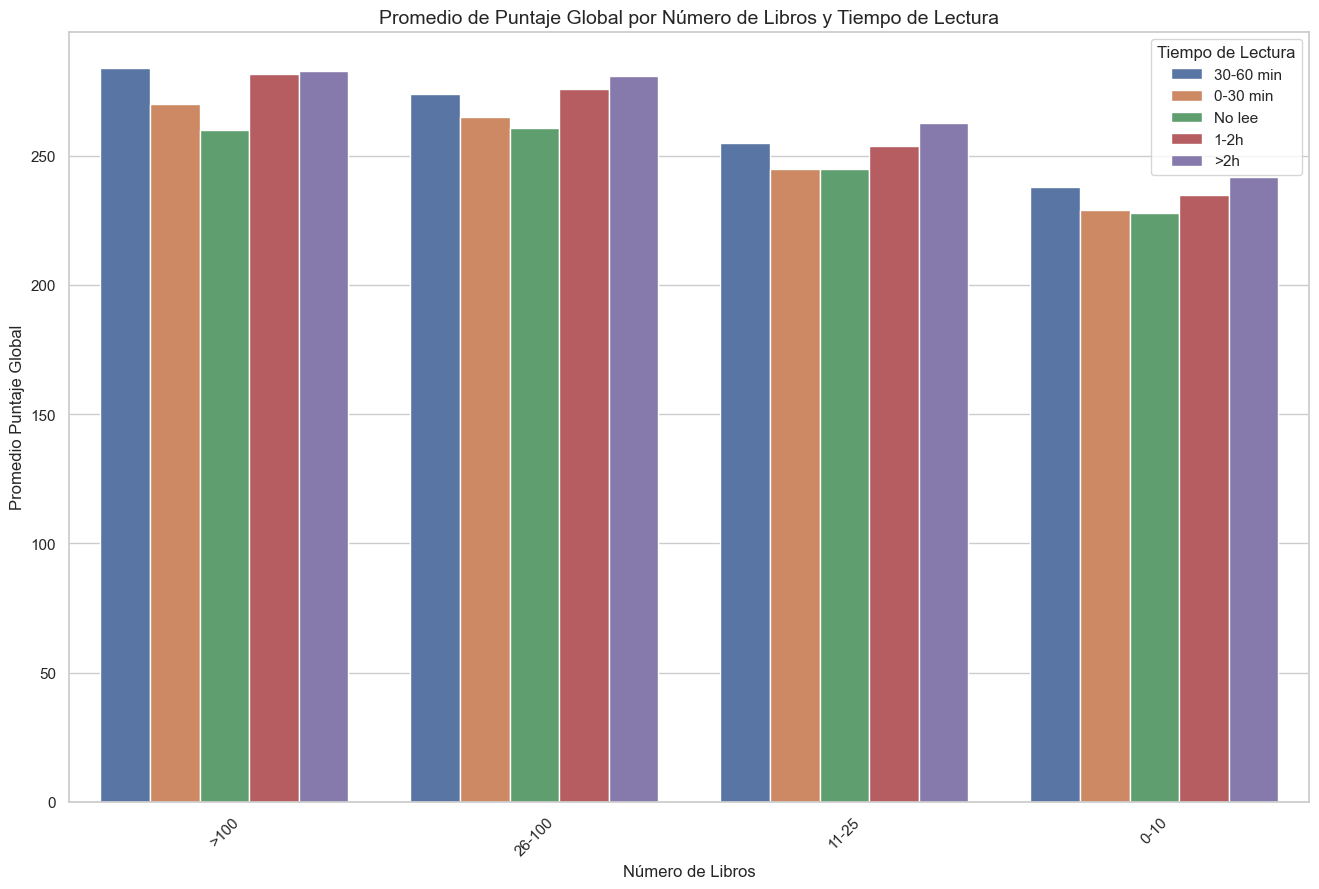

In [67]:
# Configurar el estilo
sns.set_theme(style="whitegrid")

# Crear el gráfico de barras con dodge
plt.figure(figsize=(16, 10))
sns.barplot(
    data=icfes,
    x="num_libros",
    y="puntaje_global",
    hue="tiempo_lectura",
    estimator=lambda x: round(x.mean(), 0),  # Calcula la media redondeada
    dodge=True,  # Para que las barras estén una al lado de la otra
    errorbar=None  # Opcional, para quitar barras de error
)

# Personalizar etiquetas y título
plt.xlabel("Número de Libros", fontsize=12)
plt.ylabel("Promedio Puntaje Global", fontsize=12)
plt.title("Promedio de Puntaje Global por Número de Libros y Tiempo de Lectura", fontsize=14)
plt.xticks(rotation=45)  # Rotar etiquetas si son largas
plt.legend(title="Tiempo de Lectura")

# Mostrar el gráfico
plt.show()

In [68]:
import pandas as pd
import scipy.stats as stats

# Crear tabla de contingencia
tabla_contingencia = pd.crosstab(icfes["num_libros"], icfes["tiempo_lectura"])

# Prueba de Chi-cuadrado
chi2, p, dof, expected = stats.chi2_contingency(tabla_contingencia)

# Mostrar resultados
print(f"Chi-cuadrado: {chi2}")
print(f"p-valor: {p}")

Chi-cuadrado: 25682.193683984824
p-valor: 0.0


In [69]:
import numpy as np

# Calcular el tamaño de la tabla
n = tabla_contingencia.sum().sum()
min_dim = min(tabla_contingencia.shape) - 1

# Calcular V de Cramer
cramer_v = np.sqrt(chi2 / (n * min_dim))

print(f"V de Cramer: {cramer_v}")

V de Cramer: 0.13198017257633995


Tabla de contingencia entre Num_Libros y Tiempo_Lectura:
tiempo_lectura  0-30 min   1-2h  30-60 min    >2h  No lee   Total
num_libros                                                       
0-10               90193  15668      46233   4828   46438  203360
11-25              60196  16404      46267   5288   22609  150764
26-100             32033  15474      36464   5916   13700  103587
>100                8752   6530      10708   3492    4273   33755
Total             191174  54076     139672  19524   87020  491466

Resultados de la prueba Chi-cuadrado:
Estadístico Chi² = 25682.1937
Valor p = 0
Grados de libertad = 12

Con un nivel de significancia de 0.05, rechazamos la hipótesis nula.
Existe una asociación estadísticamente significativa entre el número de libros y el tiempo de lectura.

Medidas de asociación:
V de Cramer = 0.1320
La fuerza de la asociación es débil.


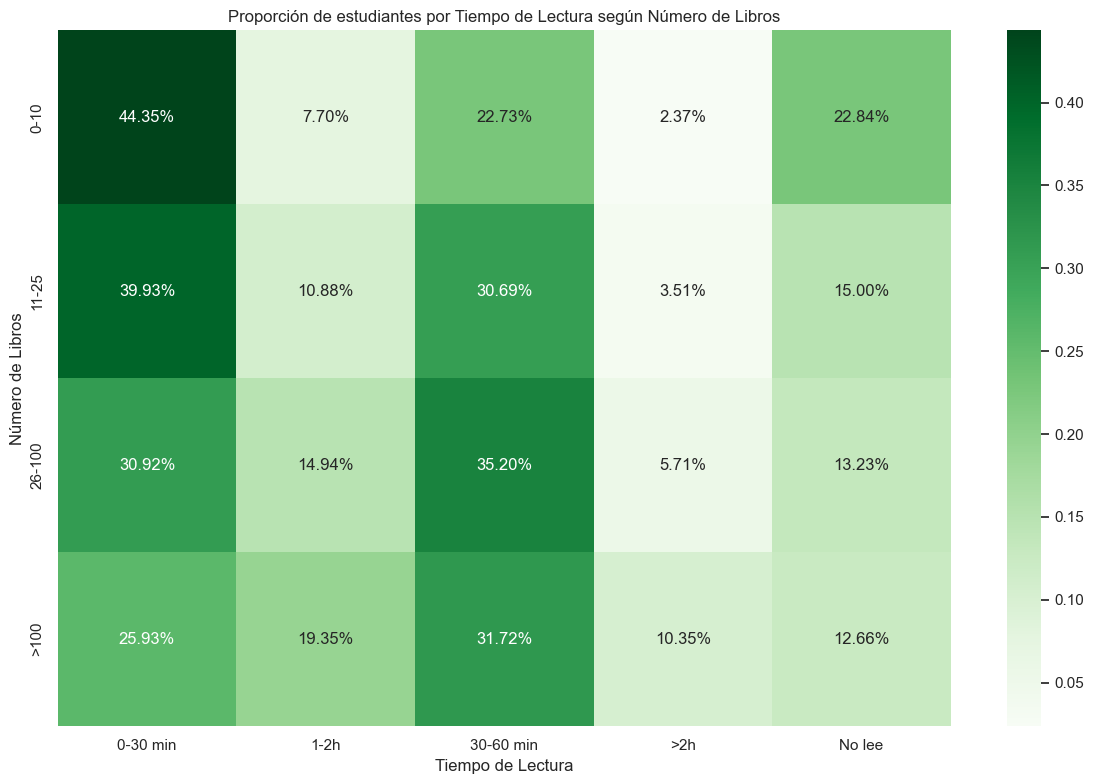

In [70]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

# Si ya tienes tu DataFrame cargado en tu sesión, puedes omitir la línea anterior

# 1. Crear tabla de contingencia entre num_libros y tiempo_lectura
tabla_contingencia = pd.crosstab(
    index=icfes['num_libros'], 
    columns=icfes['tiempo_lectura'],
    margins=True,  # Añade totales por fila/columna
    margins_name='Total'
)

# Mostrar la tabla de contingencia
print("Tabla de contingencia entre Num_Libros y Tiempo_Lectura:")
print(tabla_contingencia)

# 2. Realizar prueba Chi-cuadrado
# Eliminar la fila y columna de totales para el cálculo
tabla_sin_totales = tabla_contingencia.iloc[:-1, :-1]

chi2, p_valor, gl, valores_esperados = chi2_contingency(tabla_sin_totales)

# 3. Mostrar resultados
print("\nResultados de la prueba Chi-cuadrado:")
print(f"Estadístico Chi² = {chi2:.4f}")
print(f"Valor p = {p_valor:.4g}")
print(f"Grados de libertad = {gl}")

# Interpretación automática
alpha = 0.05
if p_valor < alpha:
    print(f"\nCon un nivel de significancia de {alpha}, rechazamos la hipótesis nula.")
    print("Existe una asociación estadísticamente significativa entre el número de libros y el tiempo de lectura.")
else:
    print(f"\nCon un nivel de significancia de {alpha}, no rechazamos la hipótesis nula.")
    print("No hay evidencia suficiente para afirmar una asociación entre el número de libros y el tiempo de lectura.")

# 4. Calcular medidas de asociación
n = tabla_sin_totales.sum().sum()
r, c = tabla_sin_totales.shape
v_cramer = np.sqrt(chi2 / (n * min(r-1, c-1)))

print("\nMedidas de asociación:")
print(f"V de Cramer = {v_cramer:.4f}")

# Interpretación de la fuerza de asociación
if v_cramer < 0.10:
    interpretacion = "muy débil"
elif v_cramer < 0.20:
    interpretacion = "débil"
elif v_cramer < 0.40:
    interpretacion = "moderada"
elif v_cramer < 0.60:
    interpretacion = "relativamente fuerte"
elif v_cramer < 0.80:
    interpretacion = "fuerte"
else:
    interpretacion = "muy fuerte"

print(f"La fuerza de la asociación es {interpretacion}.")

# 5. Calcular proporciones por fila para entender mejor la relación
proporciones = tabla_sin_totales.div(tabla_sin_totales.sum(axis=1), axis=0)

plt.figure(figsize=(12, 8))
sns.heatmap(proporciones, annot=True, fmt='.2%', cmap='Greens')
plt.title('Proporción de estudiantes por Tiempo de Lectura según Número de Libros')
plt.xlabel('Tiempo de Lectura')
plt.ylabel('Número de Libros')
plt.tight_layout()
plt.show()

In [71]:
# Primero clasificamos en niveles simples
def clasificar_libros(num_libros):
    if num_libros in ['0-10', '11-25']:
        return 'Bajo'
    else:
        return 'Alto'

def clasificar_lectura(tiempo_lectura):
    if tiempo_lectura in ['No lee', '0-30 min']:
        return 'Bajo'
    else:
        return 'Alto'

# Creamos las columnas auxiliares
icfes['nivel_libros'] = icfes['num_libros'].apply(clasificar_libros)
icfes['nivel_lectura'] = icfes['tiempo_lectura'].apply(clasificar_lectura)

# Definimos la matriz de perfiles
def asignar_perfil_lector(nivel_libros, nivel_lectura):
    if nivel_libros == 'Bajo' and nivel_lectura == 'Bajo':
        return 'Poco Apoyo, Poco Habito'
    elif nivel_libros == 'Bajo' and nivel_lectura == 'Alto':
        return 'Poco Apoyo, Buen Habito'
    elif nivel_libros == 'Alto' and nivel_lectura == 'Bajo':
        return 'Buen Apoyo, Poco Habito'
    elif nivel_libros == 'Alto' and nivel_lectura == 'Alto':
        return 'Buen Apoyo, Buen Habito'
    else:
        return 'Desconocido'

# Aplicamos la función
icfes['perfil_lector'] = icfes.apply(
    lambda x: asignar_perfil_lector(x['nivel_libros'], x['nivel_lectura']),
    axis=1
)
icfes['perfil_lector'].value_counts().sort_values(ascending=False)

perfil_lector
Poco Apoyo, Poco Habito    219436
Poco Apoyo, Buen Habito    135261
Buen Apoyo, Buen Habito     81405
Buen Apoyo, Poco Habito     69954
Name: count, dtype: int64

([0, 1, 2, 3],
 [Text(0, 0, 'Buen Apoyo, Buen Habito'),
  Text(1, 0, 'Poco Apoyo, Poco Habito'),
  Text(2, 0, 'Buen Apoyo, Poco Habito'),
  Text(3, 0, 'Poco Apoyo, Buen Habito')])

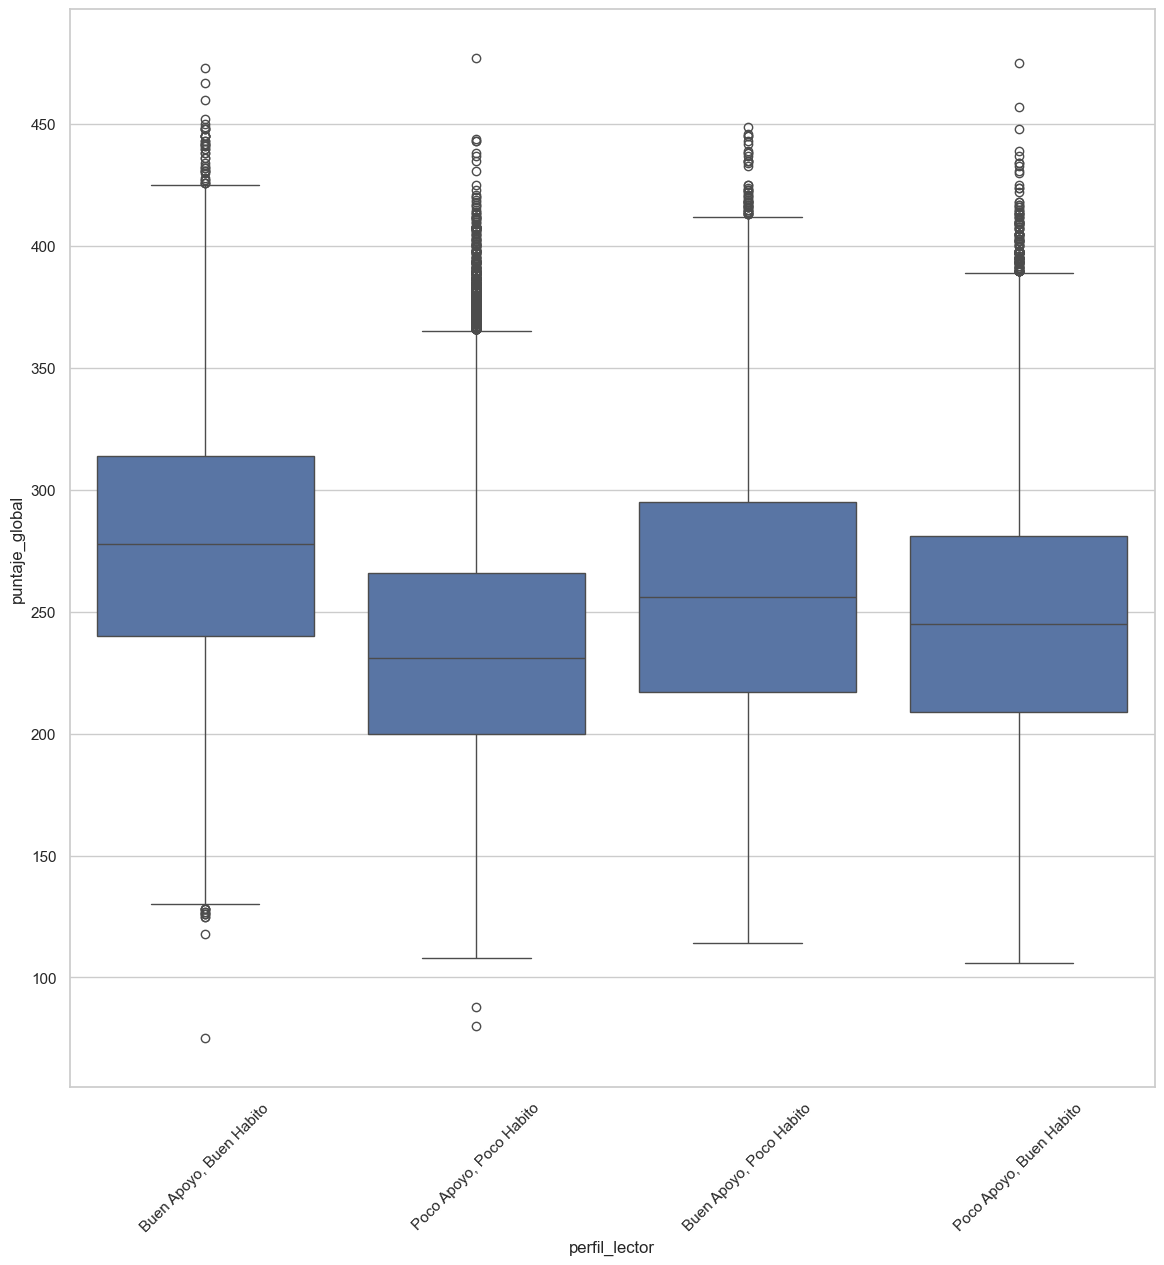

In [72]:
plt.figure(figsize = (14,14))
sns.boxplot(data=icfes, x='perfil_lector', y='puntaje_global')
plt.xticks(rotation=45)

In [73]:
icfes.head(4)

,nacionalidad,genero,region,etnia_estudiante,edad,grupo_edad,presento_fuera_edad,num_personas_casa,num_cuartos_casa,estrato_casa,tiempo_internet,internet,tv,computador,lavadora,microndas,carro,moto,consola,situacion_economica_casa,num_libros,tiempo_lectura,freq_leche_derivados,freq_carne_pescado_similares,freq_cereales_frutos_legumbres,nivel_edu_padre,actividad_padre,nivel_edu_madre,actividad_madre,horas_trabajo_semanal,tipo_remuneracion,colegio_genero,colegio_naturaleza,colegio_calendario,colegio_caracter,colegio_area,colegio_jornada,colegio_mpio,colegio_dpto,puntaje_lectura,percentil_lectura,puntaje_matematicas,percentil_matematicas,nivel_matematicas,puntaje_naturales,percentil_naturales,nivel_naturales,puntaje_sociales,percentil_sociales,nivel_sociales,puntaje_ingles,percentil_ingles,nivel_ingles,puntaje_global,percentil_global,inse_estudiante,nse_estudiante,nse_colegio,estrato_cat,rango_puntaje,educacion_padres,nivel_libros,nivel_lectura,perfil_lector
0,Colombia,Masculino,Caribe,No,17,15-19,0,Hogar grande,5.00,3.00,Moderado,1,1,0,1,1,0,0,0,Peor,>100,30-60 min,Insuficiente,Aceptable,Muy Insuficiente,Profesional,Sin Actividad Remunerada,Bachiller,No Aplica,Trabajo Ocasional,Remuneración Monetaria,Mixto,Oficial,A,S,Urbano,Mañana,Santa Ana,Magdalena,47,33,48,42,2,37,15,1,30,8,1,54.00,67,A1,208,25,50.94,2.00,2.00,Medio,201-300,Educación Superior,Alto,Alto,"Buen Apoyo, Buen Habito"
1,Colombia,Masculino,Andina,No,16,15-19,0,Más de 1 hogar,3.00,3.00,Moderado,1,1,1,1,1,1,0,0,Mejor,>100,30-60 min,Óptimo,Aceptable,Insuficiente,Tecnico/Tecnologo,Microempresario,Tecnico/Tecnologo,Trabajador Independiente,Trabajo Ocasional,Remuneración Monetaria,Mixto,No Oficial,A,S,Urbano,Completa,Bogotá D.C.,Bogotá,60,76,65,88,3,54,71,2,59,83,3,63.00,88,A2,299,83,59.76,3.00,4.00,Medio,201-300,Educación Técnica,Alto,Alto,"Buen Apoyo, Buen Habito"
2,Colombia,Masculino,Caribe,No,18,15-19,0,Hogar grande,2.00,1.00,Mucho,0,1,0,1,0,0,0,0,Igual,26-100,30-60 min,Óptimo,Óptimo,Aceptable,Bachiller,Trabajadores Operativos,Bachiller,Trabajadores Operativos,No Trabaja,No Aplica,Mixto,Oficial,A,S,Urbano,Mañana,Cartagena De Indias,Bolivar,66,91,57,70,3,41,29,2,74,99,4,64.00,89,A2,299,84,50.76,2.00,3.00,Bajo,201-300,Bachillerato Completo,Alto,Alto,"Buen Apoyo, Buen Habito"
3,Colombia,Masculino,Andina,No,17,15-19,0,Hogar tradicional,2.00,3.00,Moderado,0,0,1,0,0,0,0,0,Igual,11-25,0-30 min,Óptimo,Óptimo,Aceptable,Primaria Inc,Microempresario,Bachiller,No Aplica,Tiempo Completo,Remuneración Monetaria,Mixto,Oficial,A,S,Urbano,Mañana,Bogotá D.C.,Bogotá,62,81,54,60,3,61,87,3,73,99,4,53.00,67,A1,309,88,45.77,2.00,3.00,Medio,301-400,Al Menos Un Bachiller,Bajo,Bajo,"Poco Apoyo, Poco Habito"


##### CONCLUSIONES

🧩 Hallazgos sobre número de libros, tiempo de lectura y puntaje ICFES

- **Número de libros en el hogar**  
  - A mayor número de libros disponibles, **mayor** tiende a ser el puntaje global del ICFES.  
  - Las diferencias entre grupos son estadísticamente significativas y con un tamaño de efecto **moderado**.

- **Tiempo de lectura del estudiante**  
  - También se relaciona positivamente con el puntaje global.  
  - El efecto es más **pequeño** que el número de libros, pero sigue siendo significativo.

- **Interacción entre ambos**  
  - Combinando número de libros y tiempo de lectura en una variable de cuatro categorías (“perfil lector”), se observa el mismo patrón: **más apoyo y más hábito** → mejor puntaje.  
  - La interacción entre estas dos variables existe, pero es muy pequeña: en la práctica, **aportan más tratadas por separado** que combinadas.

---

💡 Implicaciones para el modelo

- Mantener **`num_libros`** y **`tiempo_lectura`** como variables **independientes**, usando **One-Hot Encoding** para sus categorías originales.  
- Se puede usar **`perfil_lector`** solo como **variable interpretativa**, útil para mostrar al usuario una categoría fácil de entender (ej. “Buen Apoyo, Buen Hábito”).  
- No es necesario hacer bucketing (Bajo/Medio/Alto) a menos que quieras simplificar para visualizaciones o interpretabilidad.

---

🛠️ Próximos pasos en Feature Engineering

- Confirmar que no haya categorías con muy pocos registros (podrían generar ruido).  
- Revisar si conviene combinar categorías con baja frecuencia (ej. >100 libros podría fusionarse con 26–100 si son pocos casos).  
- Validar correlación con otras variables socioeconómicas para detectar multicolinealidad antes de entrenar el modelo.


#### 2.2.4 CARACTERÍSTICAS DE LOS COLEGIOS

In [74]:
icfes.sample(5)

,nacionalidad,genero,region,etnia_estudiante,edad,grupo_edad,presento_fuera_edad,num_personas_casa,num_cuartos_casa,estrato_casa,tiempo_internet,internet,tv,computador,lavadora,microndas,carro,moto,consola,situacion_economica_casa,num_libros,tiempo_lectura,freq_leche_derivados,freq_carne_pescado_similares,freq_cereales_frutos_legumbres,nivel_edu_padre,actividad_padre,nivel_edu_madre,actividad_madre,horas_trabajo_semanal,tipo_remuneracion,colegio_genero,colegio_naturaleza,colegio_calendario,colegio_caracter,colegio_area,colegio_jornada,colegio_mpio,colegio_dpto,puntaje_lectura,percentil_lectura,puntaje_matematicas,percentil_matematicas,nivel_matematicas,puntaje_naturales,percentil_naturales,nivel_naturales,puntaje_sociales,percentil_sociales,nivel_sociales,puntaje_ingles,percentil_ingles,nivel_ingles,puntaje_global,percentil_global,inse_estudiante,nse_estudiante,nse_colegio,estrato_cat,rango_puntaje,educacion_padres,nivel_libros,nivel_lectura,perfil_lector
266005,Colombia,Femenino,Andina,No,16,15-19,0,Hogar grande,2.00,2.00,Moderado,0,1,0,1,0,0,0,0,Igual,0-10,0-30 min,Insuficiente,Insuficiente,Insuficiente,Bachiller,Trabajadores Operativos,Bachiller,Trabajadores Operativos,No Trabaja,No Aplica,Mixto,Oficial,A,S,Urbano,Mañana,Soacha,Cundinamarca,42,19,50,48,2,49,55,2,44,47,2,43.00,36,A-,230,40,42.28,2.00,2.00,Bajo,201-300,Bachillerato Completo,Bajo,Bajo,"Poco Apoyo, Poco Habito"
174209,Colombia,Femenino,Pacífica,No,17,15-19,0,Más de 1 hogar,3.00,1.00,Moderado,1,1,0,1,1,0,1,1,Igual,11-25,30-60 min,Aceptable,Aceptable,Aceptable,Primaria,Trabajador Independiente,Bachiller,Trabajador Independiente,No Trabaja,No Aplica,Mixto,Oficial,A,S,Urbano,Tarde,Cali,Valle,49,39,33,8,1,42,32,2,31,9,1,32.00,8,A-,191,15,52.56,3.00,2.00,Bajo,101-200,Al Menos Un Bachiller,Bajo,Alto,"Poco Apoyo, Buen Habito"
467618,Colombia,Femenino,Andina,No,16,15-19,0,Hogar grande,4.00,5.00,Promedio,1,1,1,1,1,1,0,1,Mejor,>100,0-30 min,Óptimo,Óptimo,Óptimo,Postgrado,Profesionales,Postgrado,Directivos,No Trabaja,No Aplica,Mixto,No Oficial,A,S,Urbano,Completa,Bogotá D.C.,Bogotá,76,100,78,100,4,79,100,4,76,100,4,100.00,100,B+,395,100,81.50,4.00,4.00,Alto,301-400,Educación Superior,Alto,Bajo,"Buen Apoyo, Poco Habito"
74936,Colombia,Femenino,Andina,No,18,15-19,0,Hogar tradicional,2.00,1.00,Promedio,1,1,0,1,0,0,1,0,Igual,11-25,0-30 min,Óptimo,Aceptable,Aceptable,Tecnico/Tecnologo,No Aplica,Bachiller Inc,Trabajadores Operativos,No Trabaja,No Aplica,Mixto,Oficial,A,S,Urbano,Noche,Bogotá D.C.,Bogotá,55,61,48,41,2,49,55,2,61,87,3,41.00,31,A-,262,62,51.97,3.00,2.00,Bajo,201-300,Educación Técnica,Bajo,Bajo,"Poco Apoyo, Poco Habito"
236965,Colombia,Masculino,Andina,No,17,15-19,0,Hogar tradicional,3.00,3.00,Poco,1,1,1,1,0,1,0,1,Igual,26-100,No lee,Aceptable,Óptimo,Insuficiente,Primaria,Microempresario,Tecnico/Tecnologo Inc,Microempresario,Trabajo Ocasional,Sin Remuneración,Mixto,No Oficial,A,S,Urbano,Completa,Bogotá D.C.,Bogotá,63,84,68,93,3,66,94,3,57,80,3,69.00,94,B1,320,91,58.97,3.00,3.00,Medio,301-400,Educación Primaria,Alto,Bajo,"Buen Apoyo, Poco Habito"


In [75]:
icfes['nse_colegio'].value_counts()

nse_colegio
2.00    264963
3.00    180827
1.00     35497
4.00     24769
Name: count, dtype: int64

In [76]:
def colegios_puntaje (df, hue):
    plt.figure(figsize = (14,16))
    sns.boxplot(data=df, x='nse_colegio', y='puntaje_global', hue=hue)
    plt.xlabel('Nivel Socioeconómico del Colegio')
    plt.ylabel('Puntaje Global')
    plt.title(f'Puntaje Global por NSE del Colegio y {hue.replace("_", " ").title()}')
    plt.legend(title=hue.replace("_", " ").title())
    plt.show()

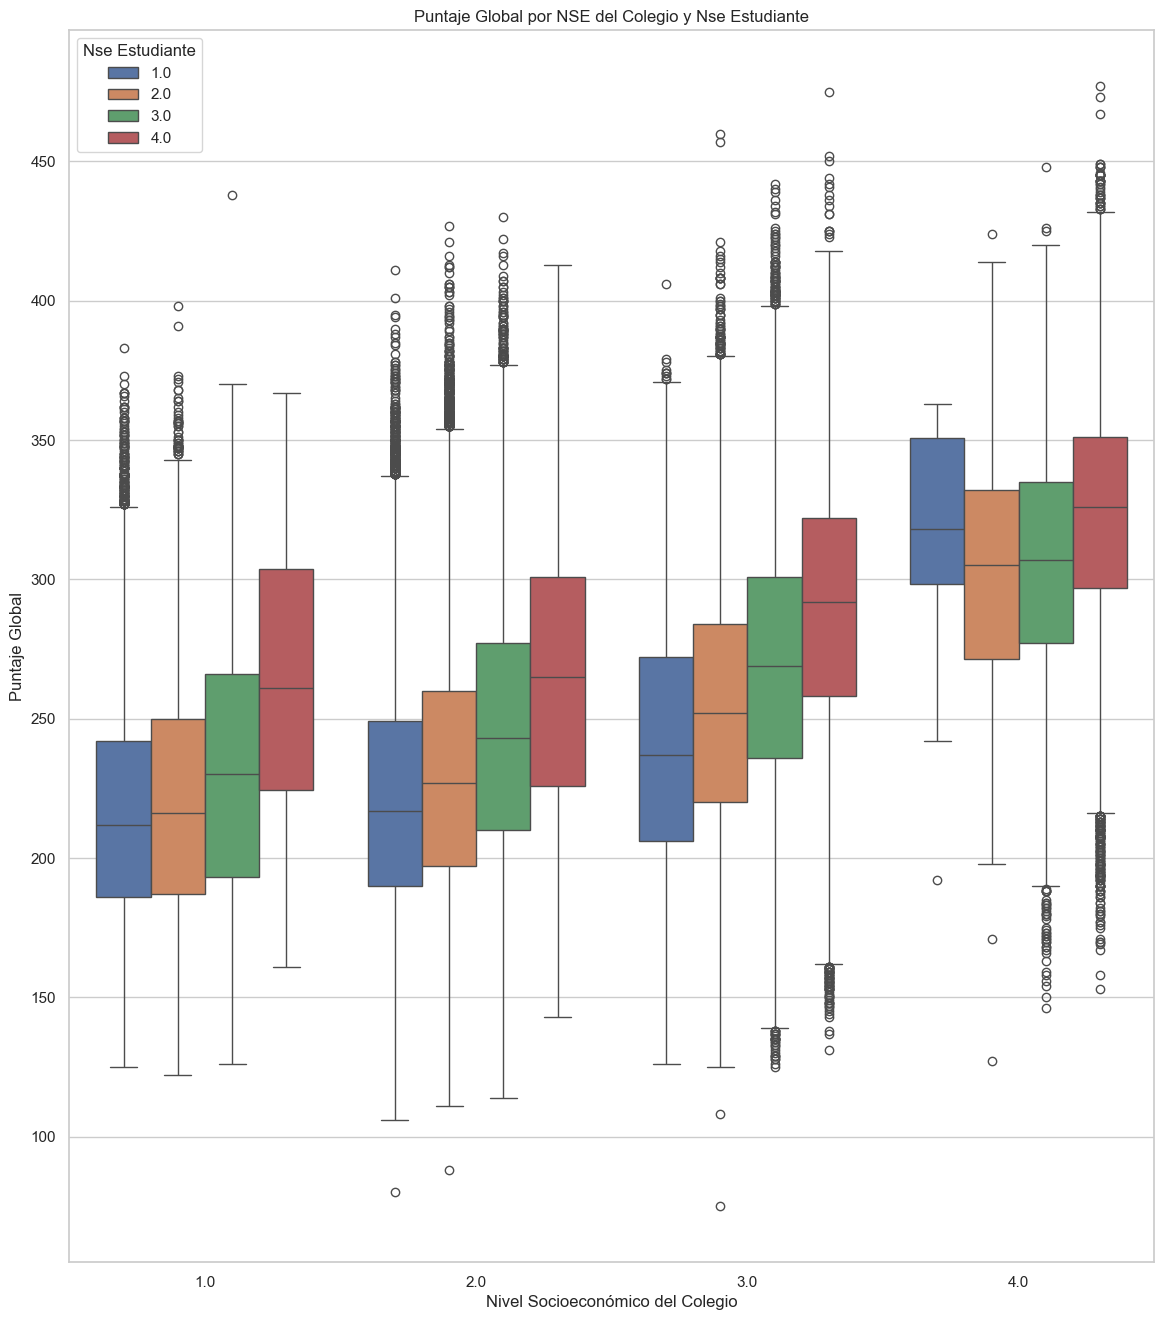

In [77]:
colegios_puntaje(icfes, hue='nse_estudiante')

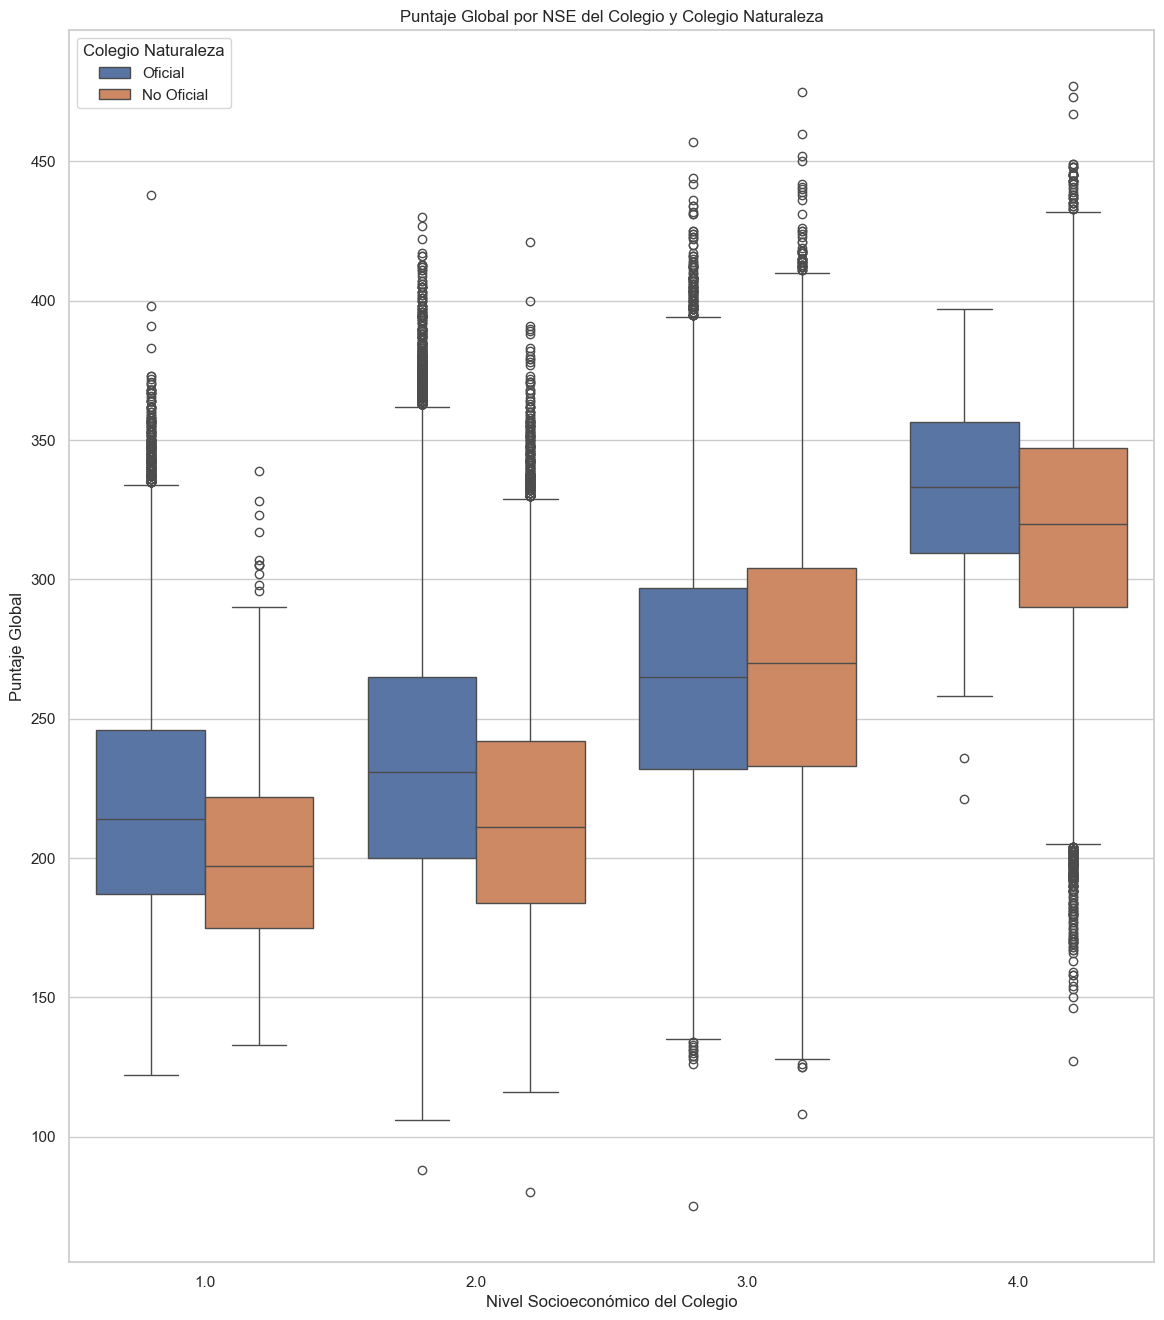

In [78]:
colegios_puntaje(icfes, 'colegio_naturaleza')

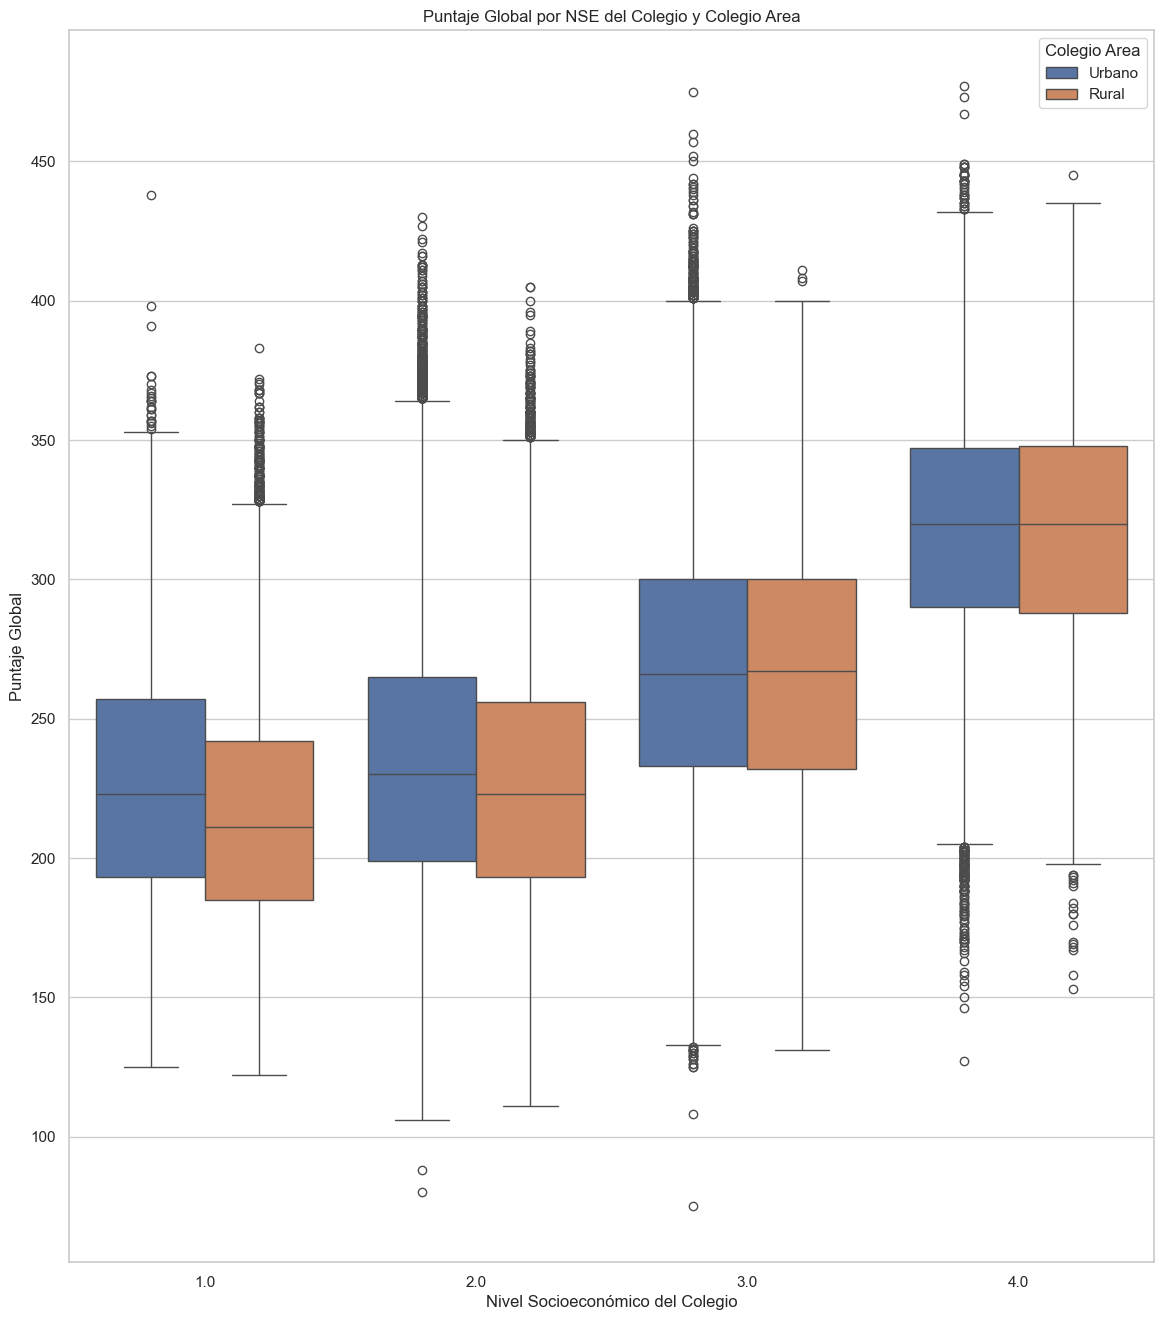

In [79]:
colegios_puntaje(icfes, 'colegio_area')

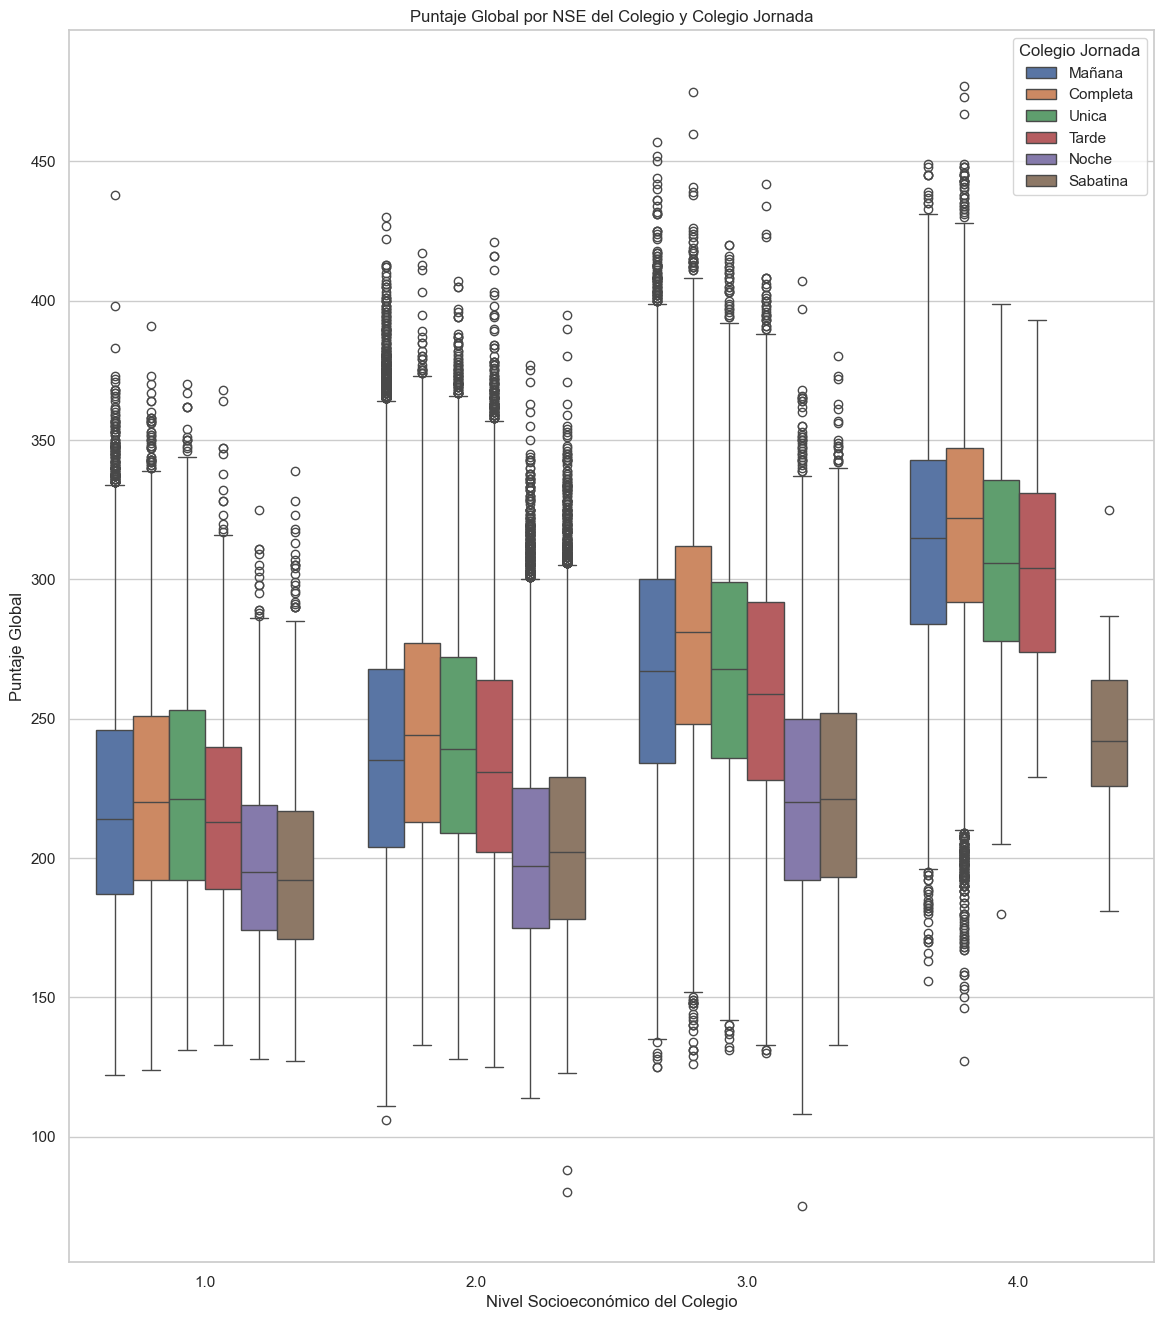

In [80]:
colegios_puntaje(icfes, 'colegio_jornada')

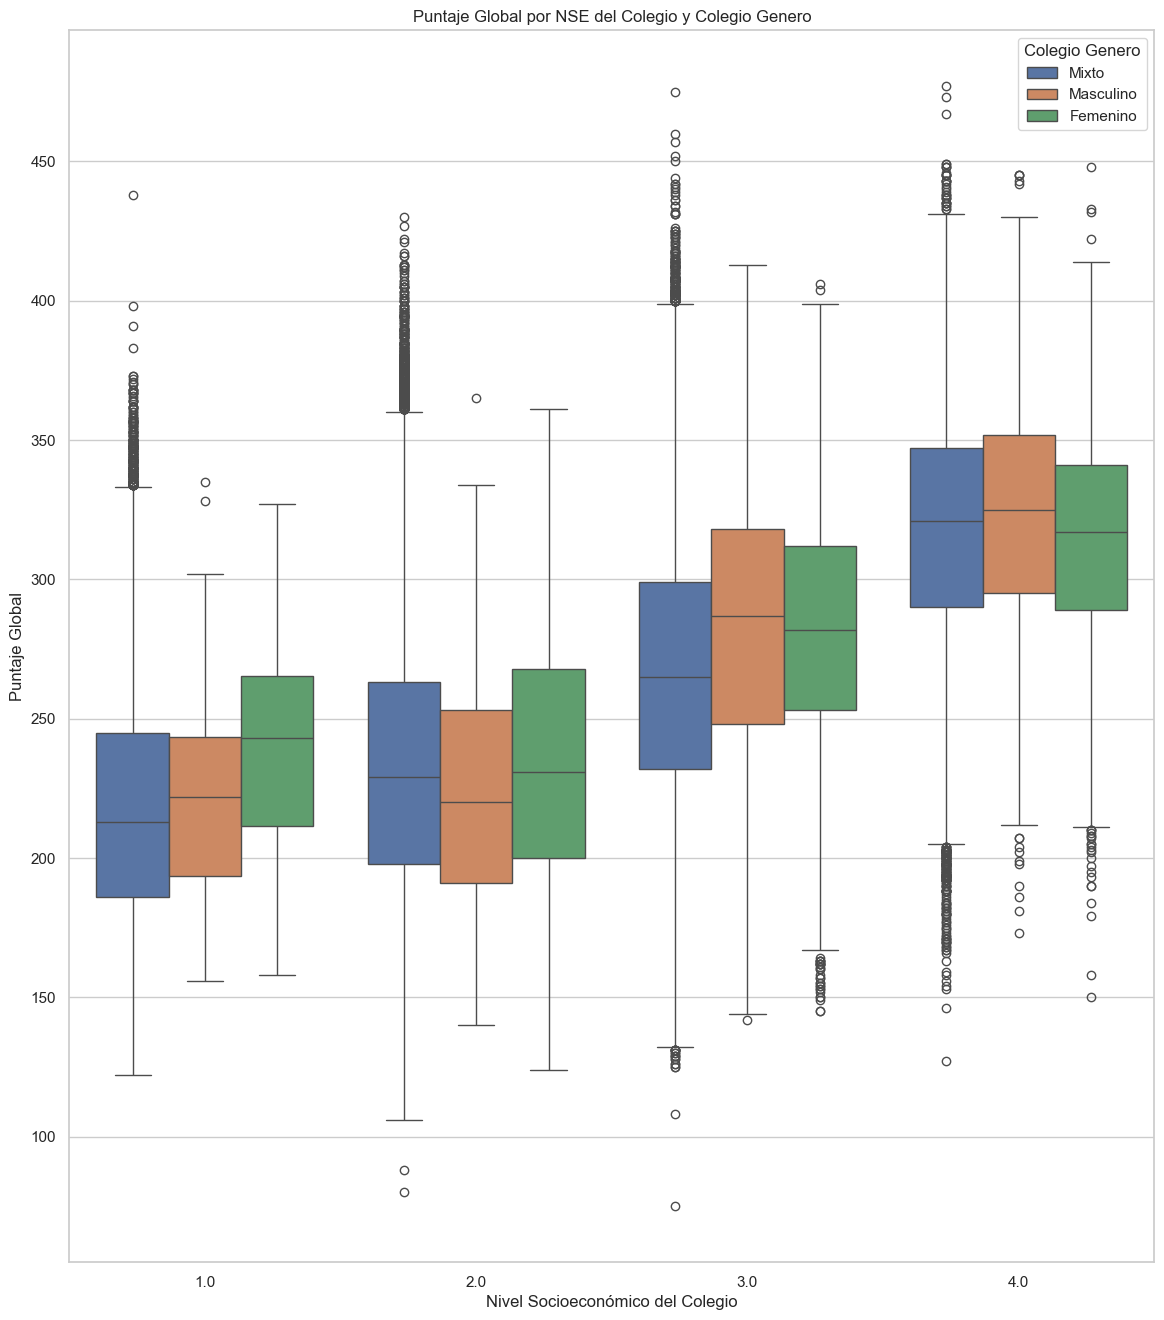

In [81]:
colegios_puntaje(icfes, hue='colegio_genero')

In [82]:
icfes['colegio_genero'].value_counts()

colegio_genero
Mixto        489519
Femenino      12800
Masculino      3737
Name: count, dtype: int64

In [83]:
import pandas as pd
import plotly.graph_objects as go

# Calcular la mediana por categoría
medianas = icfes.groupby("colegio_genero")["puntaje_global"].median()

# Obtener etiquetas y valores
categorias = medianas.index.tolist()
valores = medianas.values.tolist()

# Para cerrar el triángulo, repetimos el primer valor al final
categorias.append(categorias[0])
valores.append(valores[0])

# Crear el gráfico radar
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=valores,  # Valores de la mediana
    theta=categorias,  # Categorías en el radar
    fill='toself',
    name="Mediana Puntaje Global",
    line=dict(color="blue")
))

# Estilizar el gráfico
fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=True)
    ),
    showlegend=True,
    title="Mediana del Puntaje Global por Género del Colegio"
)

fig.show()

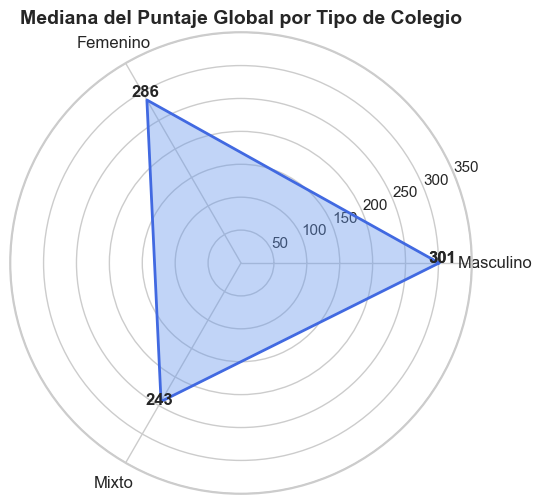

In [84]:
import numpy as np
import matplotlib.pyplot as plt

# Calcular la mediana del Puntaje_Global por tipo de colegio
median_scores = icfes.groupby("colegio_genero")["puntaje_global"].median()

# Ordenar según las categorías de Colegio_Genero
categories = ["Masculino", "Femenino", "Mixto"]
values = [median_scores[cat] for cat in categories]

# Cerrar el gráfico (hacer el triángulo completo)
values += values[:1]

# Ángulos para cada categoría
angles = np.linspace(0, 2 * np.pi, len(categories) + 1, endpoint=True)

# Crear figura y ejes en coordenadas polares
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Dibujar el área del radar
ax.fill(angles, values, color='cornflowerblue', alpha=0.4)
ax.plot(angles, values, color='royalblue', linewidth=2)

# Colocar etiquetas de categorías en los vértices
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12)

# Agregar valores numéricos en los vértices
for angle, value, label in zip(angles, values, categories + [categories[0]]):
    ax.text(angle, value + 5, f"{int(value)}", ha='center', fontsize=12, fontweight='bold')

# Ajustar límites y título
ax.set_ylim(0, max(values) + 50)
ax.set_title("Mediana del Puntaje Global por Tipo de Colegio", fontsize=14, fontweight="bold")

# Mostrar
plt.show()

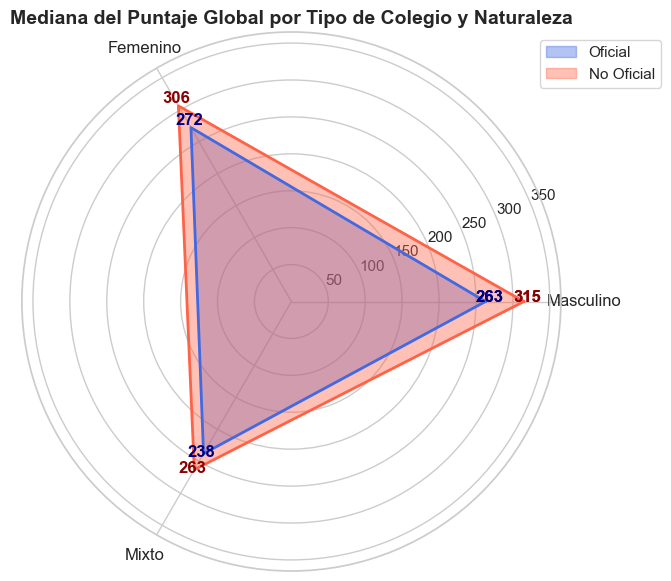

In [85]:
import numpy as np
import matplotlib.pyplot as plt

# Filtrar datos por colegio_naturaleza
median_scores_oficial = icfes[icfes["colegio_naturaleza"] == "Oficial"].groupby("colegio_genero")["puntaje_global"].median()
median_scores_no_oficial = icfes[icfes["colegio_naturaleza"] == "No Oficial"].groupby("colegio_genero")["puntaje_global"].median()

# Ordenar según las categorías de Colegio_Genero
categories = ["Masculino", "Femenino", "Mixto"]
values_oficial = [median_scores_oficial.get(cat, np.nan) for cat in categories]
values_no_oficial = [median_scores_no_oficial.get(cat, np.nan) for cat in categories]

# Cerrar el gráfico (hacer el triángulo completo)
values_oficial += values_oficial[:1]
values_no_oficial += values_no_oficial[:1]

# Ángulos para cada categoría
angles = np.linspace(0, 2 * np.pi, len(categories) + 1, endpoint=True)

# Crear figura y ejes en coordenadas polares
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))

# Dibujar triángulo para colegios oficiales
ax.fill(angles, values_oficial, color='royalblue', alpha=0.4, label="Oficial")
ax.plot(angles, values_oficial, color='royalblue', linewidth=2)

# Dibujar triángulo para colegios no oficiales
ax.fill(angles, values_no_oficial, color='tomato', alpha=0.4, label="No Oficial")
ax.plot(angles, values_no_oficial, color='tomato', linewidth=2)

# Colocar etiquetas de categorías en los vértices
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12)

# Agregar valores numéricos en los vértices
for angle, val_of, val_no, label in zip(angles, values_oficial, values_no_oficial, categories + [categories[0]]):
    ax.text(angle, val_of + 5, f"{int(val_of)}", ha='center', fontsize=12, fontweight='bold', color="navy")
    ax.text(angle, val_no + 5, f"{int(val_no)}", ha='center', fontsize=12, fontweight='bold', color="darkred")

# Ajustar límites y título
ax.set_ylim(0, max(max(values_oficial), max(values_no_oficial)) + 50)
ax.set_title("Mediana del Puntaje Global por Tipo de Colegio y Naturaleza", fontsize=14, fontweight="bold")

# Agregar leyenda
ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1))

# Mostrar gráfico
plt.show()


In [86]:
icfes[['colegio_genero', 'colegio_naturaleza']].value_counts()

colegio_genero  colegio_naturaleza
Mixto           Oficial               376461
                No Oficial            113058
Femenino        Oficial                 7855
                No Oficial              4945
Masculino       No Oficial              2373
                Oficial                 1364
Name: count, dtype: int64

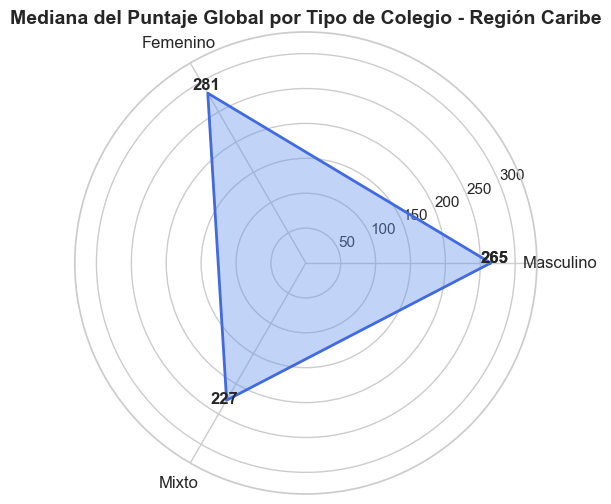

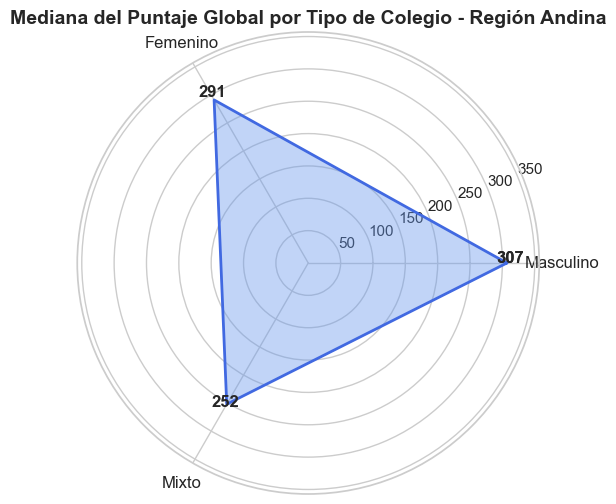

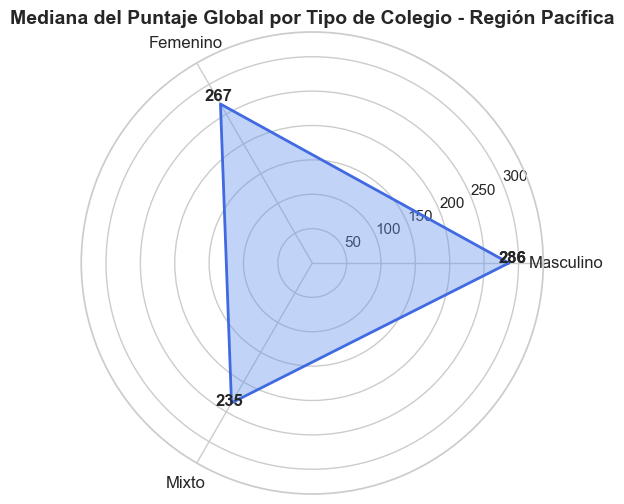

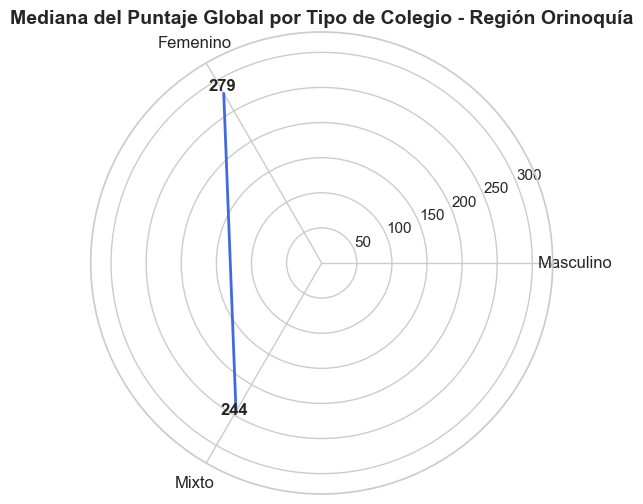

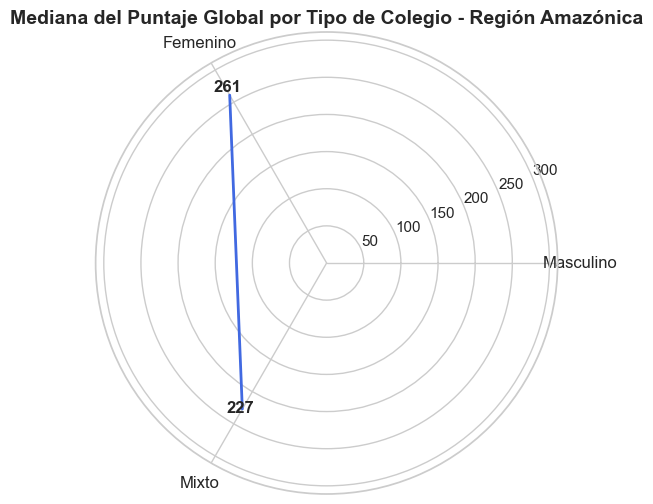

In [87]:
# Suponiendo que tienes la columna "region" en tu DataFrame icfes

import matplotlib.pyplot as plt
import numpy as np

# Lista de categorías de género en el orden deseado
categories = ["Masculino", "Femenino", "Mixto"]

# Obtener todas las regiones únicas
regiones = icfes["region"].unique()

# Iterar sobre cada región
for reg in regiones:
    # Filtrar datos de la región actual
    data_region = icfes[icfes["region"] == reg]
    
    # Calcular la mediana por tipo de colegio
    median_scores = data_region.groupby("colegio_genero")["puntaje_global"].median()
    
    # Asegurar que todas las categorías están en el mismo orden
    values = [median_scores.get(cat, np.nan) for cat in categories]  # si falta algún tipo, pone NaN
    values += values[:1]  # cerrar el radar
    
    # Calcular ángulos
    angles = np.linspace(0, 2 * np.pi, len(categories) + 1, endpoint=True)
    
    # Crear el radar chart
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    
    # Dibujar el área del radar
    ax.fill(angles, values, color='cornflowerblue', alpha=0.4)
    ax.plot(angles, values, color='royalblue', linewidth=2)
    
    # Colocar etiquetas de categorías
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=12)
    
    # Agregar valores numéricos
    for angle, value, label in zip(angles, values, categories + [categories[0]]):
        if not np.isnan(value):  # solo poner número si existe valor
            ax.text(angle, value + 5, f"{int(value)}", ha='center', fontsize=12, fontweight='bold')
    
    # Ajustar límites y título
    ax.set_ylim(0, np.nanmax(values) + 50)
    ax.set_title(f"Mediana del Puntaje Global por Tipo de Colegio - Región {reg}",
                 fontsize=14, fontweight="bold")
    
    plt.show()


In [88]:
# Agrupar por región y género, calculando la mediana del puntaje
median_table = (
    icfes
    .groupby(["region", "colegio_genero"])["puntaje_global"]
    .median()
    .reset_index()
)

# Pivotar para ver cada región como fila y cada género como columna
median_table_pivot = median_table.pivot(
    index="region",
    columns="colegio_genero",
    values="puntaje_global"
)

# (Opcional) Ordenar columnas en el orden que prefieras
median_table_pivot = median_table_pivot[["Masculino", "Femenino", "Mixto"]]

# Mostrar la tabla
print(median_table_pivot)


colegio_genero  Masculino  Femenino  Mixto
region                                    
Amazónica             NaN    261.00 227.00
Andina             307.00    291.00 252.00
Caribe             265.00    281.00 227.00
Orinoquía             NaN    279.00 244.00
Pacífica           286.00    267.00 235.00


In [89]:
icfes.head(4)

,nacionalidad,genero,region,etnia_estudiante,edad,grupo_edad,presento_fuera_edad,num_personas_casa,num_cuartos_casa,estrato_casa,tiempo_internet,internet,tv,computador,lavadora,microndas,carro,moto,consola,situacion_economica_casa,num_libros,tiempo_lectura,freq_leche_derivados,freq_carne_pescado_similares,freq_cereales_frutos_legumbres,nivel_edu_padre,actividad_padre,nivel_edu_madre,actividad_madre,horas_trabajo_semanal,tipo_remuneracion,colegio_genero,colegio_naturaleza,colegio_calendario,colegio_caracter,colegio_area,colegio_jornada,colegio_mpio,colegio_dpto,puntaje_lectura,percentil_lectura,puntaje_matematicas,percentil_matematicas,nivel_matematicas,puntaje_naturales,percentil_naturales,nivel_naturales,puntaje_sociales,percentil_sociales,nivel_sociales,puntaje_ingles,percentil_ingles,nivel_ingles,puntaje_global,percentil_global,inse_estudiante,nse_estudiante,nse_colegio,estrato_cat,rango_puntaje,educacion_padres,nivel_libros,nivel_lectura,perfil_lector
0,Colombia,Masculino,Caribe,No,17,15-19,0,Hogar grande,5.00,3.00,Moderado,1,1,0,1,1,0,0,0,Peor,>100,30-60 min,Insuficiente,Aceptable,Muy Insuficiente,Profesional,Sin Actividad Remunerada,Bachiller,No Aplica,Trabajo Ocasional,Remuneración Monetaria,Mixto,Oficial,A,S,Urbano,Mañana,Santa Ana,Magdalena,47,33,48,42,2,37,15,1,30,8,1,54.00,67,A1,208,25,50.94,2.00,2.00,Medio,201-300,Educación Superior,Alto,Alto,"Buen Apoyo, Buen Habito"
1,Colombia,Masculino,Andina,No,16,15-19,0,Más de 1 hogar,3.00,3.00,Moderado,1,1,1,1,1,1,0,0,Mejor,>100,30-60 min,Óptimo,Aceptable,Insuficiente,Tecnico/Tecnologo,Microempresario,Tecnico/Tecnologo,Trabajador Independiente,Trabajo Ocasional,Remuneración Monetaria,Mixto,No Oficial,A,S,Urbano,Completa,Bogotá D.C.,Bogotá,60,76,65,88,3,54,71,2,59,83,3,63.00,88,A2,299,83,59.76,3.00,4.00,Medio,201-300,Educación Técnica,Alto,Alto,"Buen Apoyo, Buen Habito"
2,Colombia,Masculino,Caribe,No,18,15-19,0,Hogar grande,2.00,1.00,Mucho,0,1,0,1,0,0,0,0,Igual,26-100,30-60 min,Óptimo,Óptimo,Aceptable,Bachiller,Trabajadores Operativos,Bachiller,Trabajadores Operativos,No Trabaja,No Aplica,Mixto,Oficial,A,S,Urbano,Mañana,Cartagena De Indias,Bolivar,66,91,57,70,3,41,29,2,74,99,4,64.00,89,A2,299,84,50.76,2.00,3.00,Bajo,201-300,Bachillerato Completo,Alto,Alto,"Buen Apoyo, Buen Habito"
3,Colombia,Masculino,Andina,No,17,15-19,0,Hogar tradicional,2.00,3.00,Moderado,0,0,1,0,0,0,0,0,Igual,11-25,0-30 min,Óptimo,Óptimo,Aceptable,Primaria Inc,Microempresario,Bachiller,No Aplica,Tiempo Completo,Remuneración Monetaria,Mixto,Oficial,A,S,Urbano,Mañana,Bogotá D.C.,Bogotá,62,81,54,60,3,61,87,3,73,99,4,53.00,67,A1,309,88,45.77,2.00,3.00,Medio,301-400,Al Menos Un Bachiller,Bajo,Bajo,"Poco Apoyo, Poco Habito"


In [90]:
icfes.groupby(['colegio_jornada', 'colegio_naturaleza'])['puntaje_global'].agg(['mean', 'std']).round(0).sort_values(by = 'mean', ascending=False)

,,mean,std
colegio_jornada,colegio_naturaleza,,
Completa,No Oficial,294.00,48.00
Unica,No Oficial,278.00,46.00
Mañana,No Oficial,261.00,53.00
Unica,Oficial,252.00,46.00
Tarde,Oficial,246.00,46.00
Mañana,Oficial,245.00,47.00
Completa,Oficial,244.00,47.00
Tarde,No Oficial,240.00,51.00
Noche,No Oficial,215.00,42.00


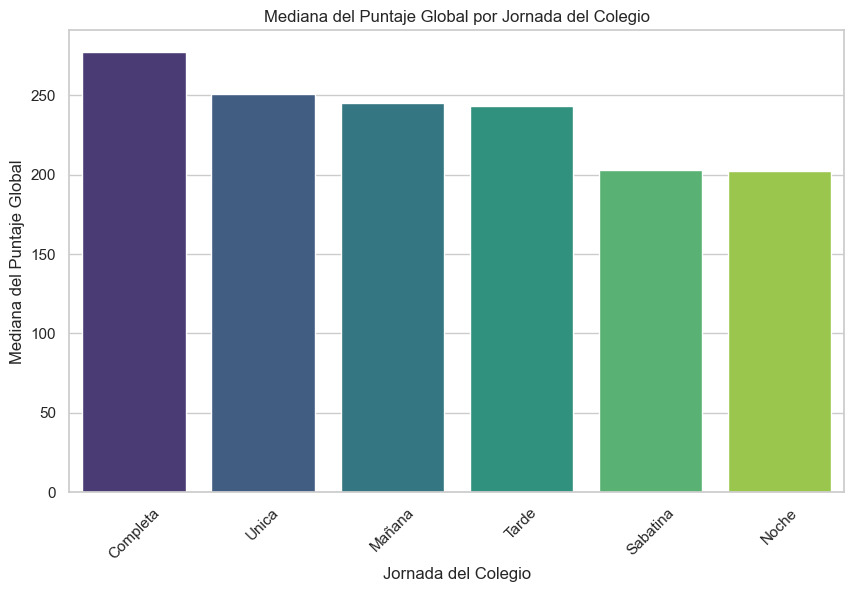

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calcular la mediana del Puntaje_Global para cada Colegio_Jornada
df_median = icfes.groupby('colegio_jornada')['puntaje_global'].median().reset_index()
df_median = df_median.sort_values(by='puntaje_global', ascending=False)

# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.barplot(data=df_median, x='colegio_jornada', y='puntaje_global', palette='viridis')

# Agregar etiquetas
plt.xlabel('Jornada del Colegio')
plt.ylabel('Mediana del Puntaje Global')
plt.title('Mediana del Puntaje Global por Jornada del Colegio')

# Rotar etiquetas del eje X si hay muchas categorías
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

In [92]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Modelo ANOVA
modelo = ols('puntaje_global ~ C(colegio_jornada)', data=icfes).fit()
anova_tabla = sm.stats.anova_lm(modelo, typ=2)
print(anova_tabla)


                          sum_sq        df        F  PR(>F)
C(colegio_jornada)  169911188.21      5.00 14926.95    0.00
Residual           1152058191.93 506050.00      NaN     NaN


In [93]:
import pingouin as pg

welch = pg.welch_anova(dv='puntaje_global', between='colegio_jornada', data=icfes)
print(welch)

# Post-hoc (Games-Howell)
posthoc = pg.pairwise_gameshowell(dv='puntaje_global', between='colegio_jornada', data=icfes)
print(posthoc)

            Source  ddof1     ddof2        F  p-unc  np2
0  colegio_jornada      5 130757.46 18293.83   0.00 0.13
           A         B  mean(A)  mean(B)   diff   se       T        df  pval  \
0   Completa    Mañana   275.26   247.57  27.69 0.21  133.63 138744.14  0.00   
1   Completa     Noche   275.26   206.88  68.39 0.29  234.97  69059.88  0.00   
2   Completa  Sabatina   275.26   207.25  68.02 0.27  247.42  85686.76  0.00   
3   Completa     Tarde   275.26   245.45  29.81 0.27  110.82 128008.37  0.00   
4   Completa     Unica   275.26   252.39  22.87 0.26   88.36 144648.65  0.00   
5     Mañana     Noche   247.57   206.88  40.69 0.25  164.19  41286.07  0.00   
6     Mañana  Sabatina   247.57   207.25  40.32 0.23  176.33  50496.88  0.00   
7     Mañana     Tarde   247.57   245.45   2.12 0.22    9.55  84791.80  0.00   
8     Mañana     Unica   247.57   252.39  -4.82 0.21  -23.06 103091.57  0.00   
9      Noche  Sabatina   206.88   207.25  -0.37 0.31   -1.21  61110.05  0.83   
10    

In [94]:
# Propuesta de renombramiento interpretativo
mapa_jornadas = {
    'Completa': 'Completa',
    'Única': 'Única',
    'Mañana': 'Tradicional',
    'Tarde': 'Tradicional',
    'Sabatina': 'Validación',
    'Noche': 'Validación'
}

icfes['colegio_jornada'] = icfes['colegio_jornada'].replace(mapa_jornadas)

icfes['colegio_jornada'].value_counts(dropna=False)


colegio_jornada
Tradicional    294914
Completa        85047
Unica           63304
Validación      62791
Name: count, dtype: int64

##### CONCLUSIONES

🧩 Hallazgos sobre características del colegio y su interacción con el contexto del estudiante

- **Nivel Socioeconómico (NSE) del Colegio**  
  - A mayor NSE institucional, el puntaje global tiende a ser **mayor** para todos los estudiantes.  
  - El efecto es **fuerte** y consistente entre regiones y tipos de colegio.

- **NSE del Estudiante**  
  - De forma independiente, también está asociado con **mayores** puntajes globales.  
  - El gradiente es claro: a mayor NSE personal, mejor desempeño, incluso en colegios con menor NSE.

- **Interacción NSE Colegio × NSE Estudiante**  
  - Estudiantes con **NSE bajo** tienen **ganancias relativas mayores** cuando estudian en colegios con NSE alto.  
  - Los estudiantes con **NSE alto** mejoran en colegios con NSE alto, pero con un **incremento menor** (ya parten de un mejor puntaje).  
  - Este patrón indica un **efecto sinérgico**: el impacto de la calidad del colegio **depende** del contexto socioeconómico del estudiante.

- **Tipo de Colegio (Masculino, Femenino, Mixto)**  
  - Los colegios **masculinos** y **femeninos** tienden a superar en mediana a los mixtos, aunque las diferencias no son uniformes en todas las regiones.  
  - Cuando se analiza por región, en algunas zonas (p. ej. Andina, Caribe) las diferencias son más marcadas que en otras, sugiriendo que el **efecto depende del contexto regional**.

---

💡 Implicaciones para el modelo

- Mantener **`nse_estudiante`** y **`nse_colegio`** como variables categóricas independientes.  
- Probar incluir un término de **interacción** entre ambas (`nse_estudiante * nse_colegio`) para capturar el efecto sinérgico observado.  
- Mantener **`colegio_genero`** solo si el análisis regional indica efectos consistentes; de lo contrario, puede ser prescindible como predictor global.

---

🛠️ Próximos pasos en Feature Engineering

- Evaluar el rendimiento predictivo con y sin la interacción (`nse_estudiante * nse_colegio`) para validar si mejora métricas del modelo.  
- Confirmar que no haya categorías (o combinaciones) con **pocos registros** para evitar inestabilidad en el modelo.  
- Revisar posibles interacciones adicionales (p. ej. región × tipo de colegio) si en el análisis exploratorio muestran diferencias consistentes.



#### 2.2.5 ALIMENTACIÓN DEL ESTUDIANTE

In [95]:
print(icfes['freq_leche_derivados'].value_counts(dropna=False))
print(icfes['freq_carne_pescado_similares'].value_counts(dropna=False))
print(icfes['freq_cereales_frutos_legumbres'].value_counts(dropna=False))

freq_leche_derivados
Insuficiente        167602
Óptimo              158022
Aceptable           131501
Muy Insuficiente     43466
None                  5465
Name: count, dtype: int64
freq_carne_pescado_similares
Óptimo              205642
Aceptable           151664
Insuficiente        122162
Muy Insuficiente     25087
None                  1501
Name: count, dtype: int64
freq_cereales_frutos_legumbres
Insuficiente        194926
Aceptable           151562
Óptimo               86844
Muy Insuficiente     70211
None                  2513
Name: count, dtype: int64


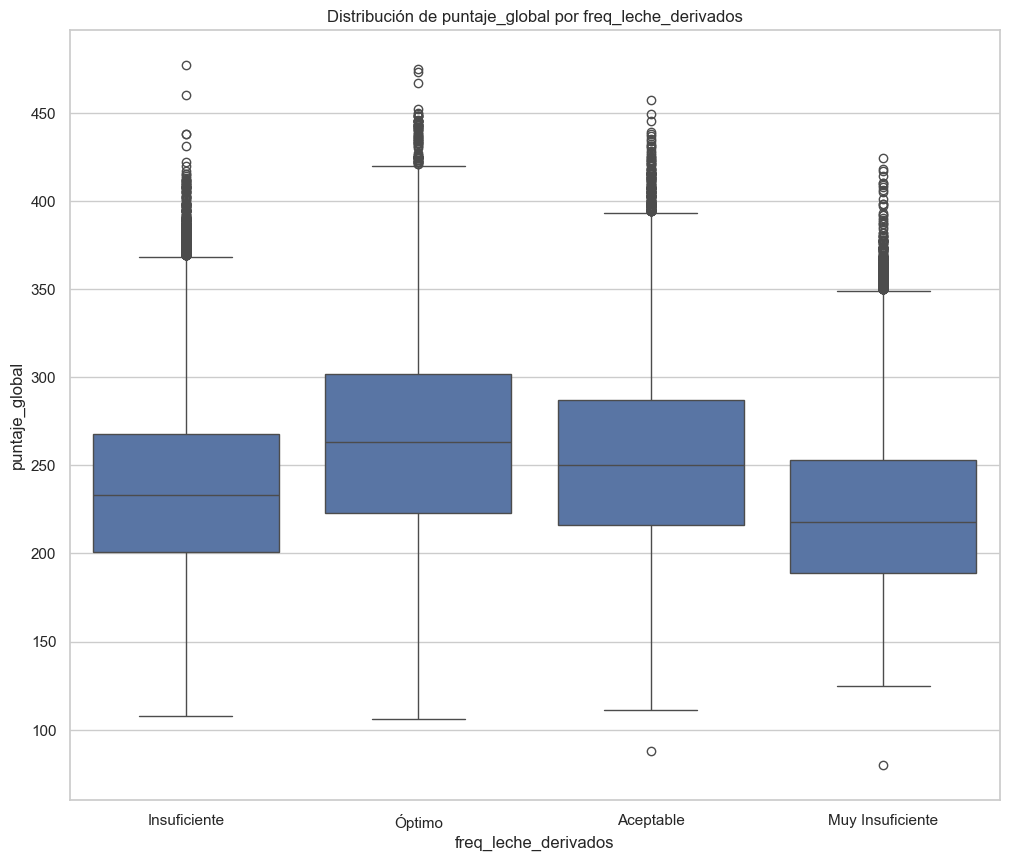

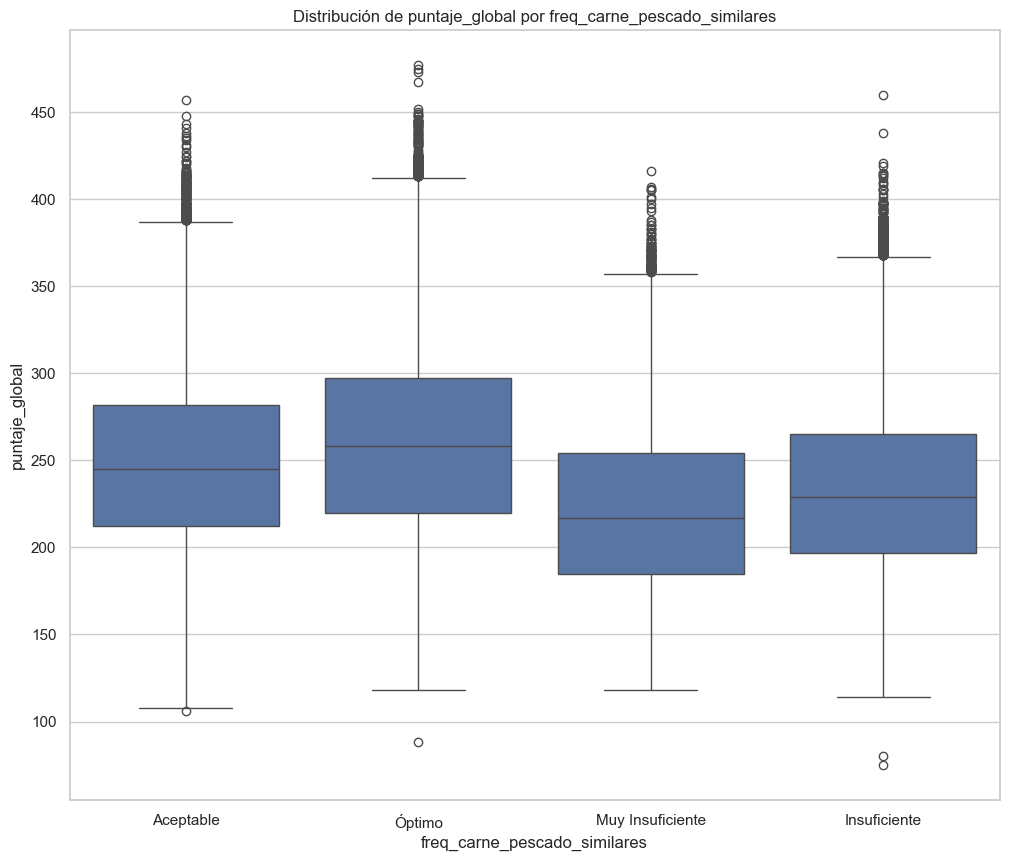

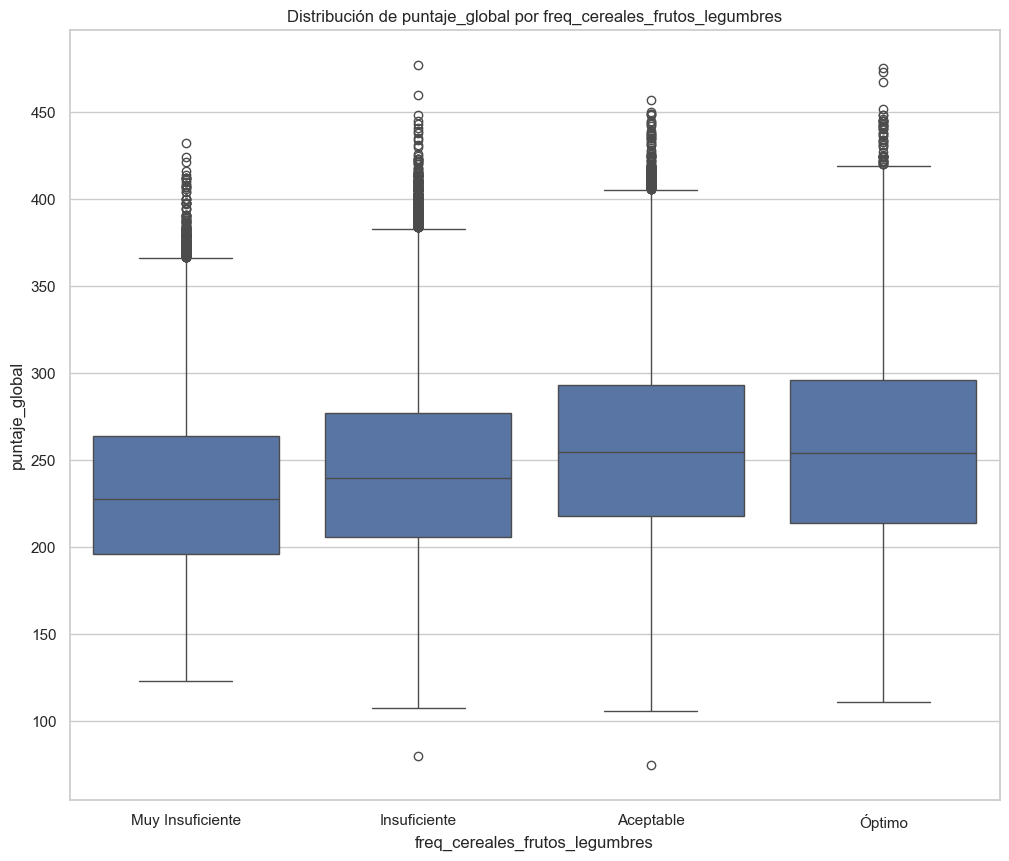

In [96]:
plt.figure(figsize=(12, 10))
sns.boxplot(data=icfes, x='freq_leche_derivados', y='puntaje_global')
plt.title("Distribución de puntaje_global por freq_leche_derivados")
plt.show()

plt.figure(figsize=(12, 10))
sns.boxplot(data=icfes, x='freq_carne_pescado_similares', y='puntaje_global')
plt.title("Distribución de puntaje_global por freq_carne_pescado_similares")
plt.show()

plt.figure(figsize=(12, 10))
sns.boxplot(data=icfes, x='freq_cereales_frutos_legumbres', y='puntaje_global')
plt.title("Distribución de puntaje_global por freq_cereales_frutos_legumbres")
plt.show()

### 2.3 MATRICES DE CORRELACIÓN ENTRE PREDICTORAS

In [97]:
icfes.sample(5)

,nacionalidad,genero,region,etnia_estudiante,edad,grupo_edad,presento_fuera_edad,num_personas_casa,num_cuartos_casa,estrato_casa,tiempo_internet,internet,tv,computador,lavadora,microndas,carro,moto,consola,situacion_economica_casa,num_libros,tiempo_lectura,freq_leche_derivados,freq_carne_pescado_similares,freq_cereales_frutos_legumbres,nivel_edu_padre,actividad_padre,nivel_edu_madre,actividad_madre,horas_trabajo_semanal,tipo_remuneracion,colegio_genero,colegio_naturaleza,colegio_calendario,colegio_caracter,colegio_area,colegio_jornada,colegio_mpio,colegio_dpto,puntaje_lectura,percentil_lectura,puntaje_matematicas,percentil_matematicas,nivel_matematicas,puntaje_naturales,percentil_naturales,nivel_naturales,puntaje_sociales,percentil_sociales,nivel_sociales,puntaje_ingles,percentil_ingles,nivel_ingles,puntaje_global,percentil_global,inse_estudiante,nse_estudiante,nse_colegio,estrato_cat,rango_puntaje,educacion_padres,nivel_libros,nivel_lectura,perfil_lector
96413,Colombia,Femenino,Caribe,Wayúu,17,15-19,0,Hogar tradicional,2.00,2.00,Poco,0,1,0,1,0,0,0,0,Igual,0-10,1-2h,Insuficiente,Aceptable,Muy Insuficiente,None,Trabajadores Operativos,Ninguna,No Aplica,No Trabaja,No Aplica,Mixto,Oficial,A,S,Rural,Tradicional,Barrancas,La Guajira,57,67,62,83,3,53,67,2,49,59,2,44.00,38,A-,272,69,36.52,1.00,2.00,Bajo,201-300,Sin Educación Formal,Bajo,Alto,"Poco Apoyo, Buen Habito"
411867,Colombia,Femenino,Andina,No,16,15-19,0,Hogar tradicional,3.00,3.00,Moderado,1,1,1,1,0,0,0,1,Igual,0-10,30-60 min,Insuficiente,Aceptable,Aceptable,Tecnico/Tecnologo,Profesionales,Profesional,None,No Trabaja,No Aplica,Mixto,No Oficial,A,S,Urbano,Completa,Bogotá D.C.,Bogotá,43,21,42,26,2,39,22,1,27,4,1,31.00,7,A-,186,13,59.18,3.00,3.00,Medio,101-200,Educación Superior,Bajo,Alto,"Poco Apoyo, Buen Habito"
482135,Colombia,Femenino,Andina,No,17,15-19,0,Hogar grande,5.00,2.00,Mucho,1,1,0,1,0,0,0,0,Igual,26-100,0-30 min,Insuficiente,Aceptable,Aceptable,Bachiller,Sin Actividad Remunerada,Primaria,Microempresario,No Trabaja,No Aplica,Mixto,Oficial,A,N,Urbano,Tradicional,Bogotá D.C.,Bogotá,50,41,47,39,2,39,22,1,43,43,2,32.00,9,A-,219,33,49.46,2.00,3.00,Bajo,201-300,Al Menos Un Bachiller,Alto,Bajo,"Buen Apoyo, Poco Habito"
200174,Colombia,Masculino,Caribe,No,18,15-19,0,Más de 1 hogar,2.00,2.00,Ninguno,0,0,0,0,0,0,0,0,Igual,11-25,30-60 min,Insuficiente,Insuficiente,Muy Insuficiente,Bachiller,Sin Actividad Remunerada,Bachiller,Sector Primario,Tiempo Parcial Reducido,Remuneración Monetaria,Mixto,Oficial,A,S,Rural,Tradicional,Mompós,Bolivar,44,23,50,49,2,39,22,1,43,44,2,53.00,65,A1,223,36,35.51,1.00,2.00,Bajo,201-300,Bachillerato Completo,Bajo,Alto,"Poco Apoyo, Buen Habito"
455509,Colombia,Masculino,Andina,No,16,15-19,0,Hogar grande,4.00,3.00,Mucho,1,1,1,1,1,1,1,1,Mejor,>100,30-60 min,Óptimo,Óptimo,Óptimo,Tecnico/Tecnologo,Profesionales,Profesional,Profesionales,No Trabaja,No Aplica,Mixto,No Oficial,A,S,Urbano,Tradicional,Girardota,Antioquia,61,80,65,89,3,61,87,3,56,76,3,49.00,54,A1,299,84,74.25,4.00,3.00,Medio,201-300,Educación Superior,Alto,Alto,"Buen Apoyo, Buen Habito"


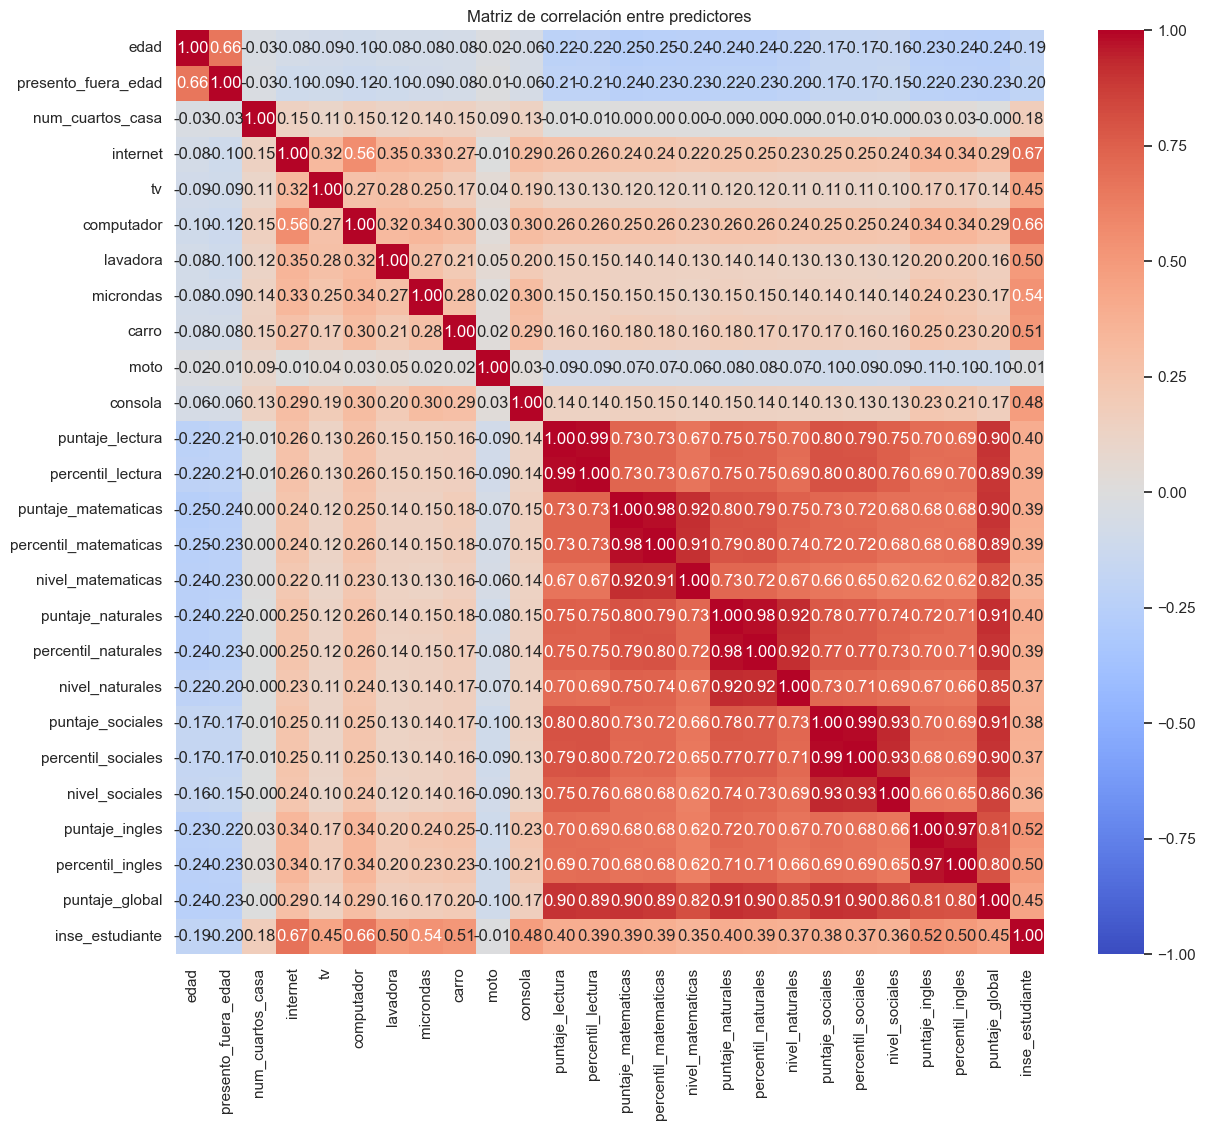

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Seleccionar solo las variables numéricas ---
# Si tus datos están en un DataFrame llamado icfes:
numeric_features = icfes.select_dtypes(include=['int64', 'float64'])

# --- 2. Calcular la matriz de correlación ---
corr_matrix = numeric_features.corr(method='pearson')  # o spearman si hay ordinales no lineales

# --- 3. Visualizar como mapa de calor ---
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matriz de correlación entre predictores")
plt.show()


## 3. EXPORTAR ARCHIVO

In [99]:
eliminar = ['nivel_libros', 'nivel_lectura', 'rango_puntaje', 'estrato_cat', 'percentil_global', 'percentil_lectura', 'percentil_matematicas', 
            'nivel_matematicas',  'percentil_naturales', 'nivel_naturales', 'percentil_sociales', 'nivel_sociales', 'percentil_ingles', 'nivel_ingles',
            'puntaje_lectura', 'puntaje_matematicas', 'puntaje_naturales', 'puntaje_sociales', 'puntaje_ingles', 'grupo_edad', 'colegio_dpto', 'colegio_mpio',
            'colegio_caracter', 'colegio_calendario', 'situacion_economica_casa', 'inse_estudiante', 'tipo_remuneracion', 'genero']

icfes = icfes.drop(columns=eliminar)

In [100]:
# Ahora crear la variable combinada
condiciones_trabajo = [
    # Sin información
    (icfes['actividad_madre'].isna()) & (icfes['actividad_padre'].isna()),
    
    # No aplica
    (icfes['actividad_madre'] == 'No Aplica') | (icfes['actividad_padre'] == 'No Aplica'),
    
    # Sin información disponible
    (icfes['actividad_madre'] == 'Sin Información') & (icfes['actividad_padre'] == 'Sin Información'),
    
    # Profesionales y Directivos (nivel más alto)
    (icfes['actividad_madre'].isin(['Directivos', 'Profesionales'])) | 
    (icfes['actividad_padre'].isin(['Directivos', 'Profesionales'])),
    
    # Microempresarios y Trabajadores Independientes
    (icfes['actividad_madre'].isin(['Microempresario', 'Trabajador Independiente'])) | 
    (icfes['actividad_padre'].isin(['Microempresario', 'Trabajador Independiente'])),
    
    # Trabajadores Operativos
    (icfes['actividad_madre'] == 'Trabajadores Operativos') | 
    (icfes['actividad_padre'] == 'Trabajadores Operativos'),
    
    # Sector Primario
    (icfes['actividad_madre'] == 'Sector Primario') | 
    (icfes['actividad_padre'] == 'Sector Primario'),
    
    # Pensionados
    (icfes['actividad_madre'] == 'Pensionado') | 
    (icfes['actividad_padre'] == 'Pensionado'),
    
    # Sin actividad remunerada (ambos)
    (icfes['actividad_madre'] == 'Sin Actividad Remunerada') & 
    (icfes['actividad_padre'] == 'Sin Actividad Remunerada'),
    
    # Al menos uno sin actividad remunerada
    (icfes['actividad_madre'] == 'Sin Actividad Remunerada') | 
    (icfes['actividad_padre'] == 'Sin Actividad Remunerada')
]

# Valores correspondientes
valores_trabajo = [
    'Sin Información',
    'No Aplica',
    'Sin Información',
    'Profesionales/Directivos',
    'Empresarios/Independientes',
    'Trabajadores Operativos',
    'Sector Primario',
    'Pensionados',
    'Hogar Sin Ingresos',
    'Hogar Con Actividad Limitada'
]

# Crear la nueva variable
icfes['actividad_padres'] = np.select(condiciones_trabajo, valores_trabajo, default='Otros Casos')

# Ver distribución
print("Distribución de actividad laboral de padres:")
print(icfes['actividad_padres'].value_counts())

Distribución de actividad laboral de padres:
actividad_padres
Trabajadores Operativos         144901
Empresarios/Independientes      116589
Profesionales/Directivos         76905
No Aplica                        63762
Sector Primario                  57819
Hogar Sin Ingresos               19540
Hogar Con Actividad Limitada     13986
Pensionados                       6738
Sin Información                   5637
Otros Casos                        179
Name: count, dtype: int64


In [101]:
icfes = icfes.rename(columns={'colegio_naturaleza': 'colegio_publico'})


In [102]:
icfes.to_parquet("icfes_analizado.parquet", index=False, engine="pyarrow")